In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
import os
from astropy.modeling import models
from astropy import units as u
from scipy.optimize import curve_fit
from astropy.timeseries import LombScargle
from scipy.special import voigt_profile
import Analysis_functions as AF
from importlib import reload

## Some preliminary info.

In [2]:
location = '/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/Solar-data/2023-01-16'
os.chdir(location)

In [3]:
blaze_dir = 'Blaze-data'

In [4]:
dir_name = 'Corr-data'
test = pf.open(dir_name+'/'+os.listdir(dir_name)[10])

test.info()

Filename: Corr-data/r.NIRPS.2023-01-16T17:11:00.023_S2D_BLAZE_A_CORR.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1046   ()      
  1  SCIDATA       1 ImageHDU        10   (4084, 71)   float32   
  2  ERRDATA       1 ImageHDU        10   (4084, 71)   float32   
  3  QUALDATA      1 ImageHDU        12   (4084, 71)   int16 (rescales to uint16)   
  4  WAVEDATA_VAC_BARY    1 ImageHDU        10   (4084, 71)   float64   
  5  WAVEDATA_AIR_BARY    1 ImageHDU        10   (4084, 71)   float64   
  6  DLLDATA_VAC_BARY    1 ImageHDU        10   (4084, 71)   float64   
  7  DLLDATA_AIR_BARY    1 ImageHDU        10   (4084, 71)   float64   
  8  SCIDATA_CORR    1 ImageHDU         8   (4084, 71)   float64   
  9  SCIDATA_CORR    1 ImageHDU         8   (4084, 71)   float64   
 10  ERRDATA_CORR    1 ImageHDU         8   (4084, 71)   float64   
 11  TELLURIC      1 ImageHDU         8   (4084, 71)   float64   


In [5]:
test[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2023-02-16T12:08:02' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
ORIGIN  = 'ESO-LASILLA'        / European Southern Observatory                  
TELESCOP= 'ESO-3P6 '           / ESO <TEL>                                      
INSTRUME= 'NIRPS   '           / Instrument used.                               
OBJECT  = 'SUN,FP,G2V'         / Original target.                               
EXPTIME =              50.1597 / [s] Exposure time                              
MJD-OBS =     59960.71597249

In [6]:
CCF_dir_name = 'CCF_RV-data'
test_RV = pf.open(CCF_dir_name+'/'+os.listdir(CCF_dir_name)[10])


test_RV.info()
test_RV[0].header

Filename: CCF_RV-data/r.NIRPS.2023-01-16T18:55:30.070_CCF_A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1071   ()      
  1  SCIDATA       1 ImageHDU        10   (41, 72)   float32   
  2  ERRDATA       1 ImageHDU        10   (41, 72)   float32   
  3  QUALDATA      1 ImageHDU        10   (41, 72)   int32   


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2023-03-11T08:51:28' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
ORIGIN  = 'ESO-LASILLA'        / European Southern Observatory                  
TELESCOP= 'ESO-3P6 '           / ESO <TEL>                                      
INSTRUME= 'NIRPS   '           / Instrument used.                               
OBJECT  = 'SUN,FP,G2V'         / Original target.                               
EXPTIME =              50.1597 / [s] Exposure time                              
MJD-OBS =     59960.78854248

# Studying solar spectrum of one day (looking at all times)

In [7]:
reload(AF)

#Extracting the data
tot_lamda, tot_spctr, tot_norm_spctr, tot_err, tot_norm_err, tot_SNR, tot_mode, tot_date, tot_RV, tot_RV_err, tot_FWHM, tot_BIS_SPAN, tot_H2O, tot_O2, tot_CO2, tot_AIRM = AF.extraction(dir_name, blaze_dir, CCF_dir_name, 14)




[]
[3, 6, 11, 14, 15, 22, 24, 26, 32, 37, 44, 45, 52, 53, 54, 63, 65, 71, 72, 74, 78, 82, 85, 88, 90, 95, 96, 97, 103, 106, 110, 111, 113, 114, 115, 116]
[]
[3, 6, 11, 14, 15, 22, 24, 26, 32, 37, 44, 45, 52, 53, 54, 63, 65, 71, 72, 74, 78, 82, 85, 88, 90, 95, 96, 97, 103, 106, 110, 111, 113, 114, 115, 116]
[]
[3, 6, 11, 14, 15, 22, 24, 26, 32, 37, 44, 45, 52, 53, 54, 63, 65, 71, 72, 74, 78, 82, 85, 88, 90, 95, 96, 97, 103, 106, 110, 111, 113, 114, 115, 116]
[]
[3, 6, 11, 14, 15, 22, 24, 26, 32, 37, 44, 45, 52, 53, 54, 63, 65, 71, 72, 74, 78, 82, 85, 88, 90, 95, 96, 97, 103, 106, 110, 111, 113, 114, 115, 116]
[]
[3, 6, 11, 14, 15, 22, 24, 26, 32, 37, 44, 45, 52, 53, 54, 63, 65, 71, 72, 74, 78, 82, 85, 88, 90, 95, 96, 97, 103, 106, 110, 111, 113, 114, 115, 116]
[]
[3, 6, 11, 14, 15, 22, 24, 26, 32, 37, 44, 45, 52, 53, 54, 63, 65, 71, 72, 74, 78, 82, 85, 88, 90, 95, 96, 97, 103, 106, 110, 111, 113, 114, 115, 116]
[]
[3, 6, 11, 14, 15, 22, 24, 26, 32, 37, 44, 45, 52, 53, 54, 63, 65, 71, 72

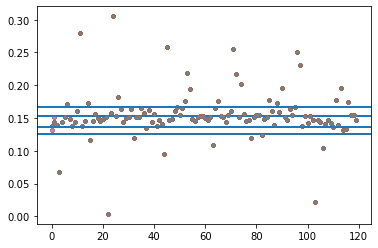

In [8]:
reload(AF)
cut = 75
threshold = 0.1
#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(tot_mode=='A') != len(tot_mode) and np.sum(tot_mode=='E')!= len(tot_mode):
    total_spctr_HA, total_spctr_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_spctr, tot_RV, cut, threshold)

    total_norm_spctr_HA, total_norm_spctr_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_norm_spctr, tot_RV, cut, threshold)

    total_lamda_HA, total_lamda_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_lamda, tot_RV, cut, threshold)
    
    total_err_HA, total_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_err, tot_RV, cut, threshold)

    total_norm_err_HA, total_norm_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_norm_err, tot_RV, cut, threshold)
    
    date_HA, date_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_date, tot_RV, cut, threshold)

    total_RV_HA, total_RV_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_RV, tot_RV, cut, threshold)

    total_RV_err_HA, total_RV_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_RV_err, tot_RV, cut, threshold)

    total_FWHM_HA, total_FWHM_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_FWHM, tot_RV, cut, threshold)

    total_BIS_SPAN_HA, total_BIS_SPAN_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_BIS_SPAN, tot_RV, cut, threshold)

    total_H2O_HA, total_H2O_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_H2O, tot_RV, cut, threshold)

    total_O2_HA, total_O2_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_O2, tot_RV, cut, threshold)
    
    total_CO2_HA, total_CO2_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_CO2, tot_RV, cut, threshold)

    total_AIRM_HA, total_AIRM_HE = AF.segment_and_reduce(tot_mode, tot_SNR, tot_AIRM, tot_RV, cut, threshold)

#If there is one mode of observation
else:
    total_spctr = AF.segment_and_reduce(tot_mode, tot_SNR, tot_spctr, tot_RV, cut, threshold)

    total_norm_spctr = AF.segment_and_reduce(tot_mode, tot_SNR, tot_norm_spctr, tot_RV, cut, threshold)

    total_lamda = AF.segment_and_reduce(tot_mode, tot_SNR, tot_lamda, tot_RV, cut, threshold)
    
    total_err = AF.segment_and_reduce(tot_mode, tot_SNR, tot_err, tot_RV, cut, threshold)

    total_norm_err = AF.segment_and_reduce(tot_mode, tot_SNR, tot_norm_err, tot_RV, cut, threshold)
    
    date = AF.segment_and_reduce(tot_mode, tot_SNR, tot_date, tot_RV, cut, threshold)

    total_RV = AF.segment_and_reduce(tot_mode, tot_SNR, tot_RV, tot_RV, cut, threshold)

    total_RV_err = AF.segment_and_reduce(tot_mode, tot_SNR, tot_RV_err, tot_RV, cut, threshold)

    total_FWHM = AF.segment_and_reduce(tot_mode, tot_SNR, tot_FWHM, tot_RV, cut, threshold)

    total_BIS_SPAN = AF.segment_and_reduce(tot_mode, tot_SNR, tot_BIS_SPAN, tot_RV, cut, threshold)

    total_H2O = AF.segment_and_reduce(tot_mode, tot_SNR, tot_H2O, tot_RV, cut, threshold)

    total_O2 = AF.segment_and_reduce(tot_mode, tot_SNR, tot_O2, tot_RV, cut, threshold)
    
    total_CO2 = AF.segment_and_reduce(tot_mode, tot_SNR, tot_CO2, tot_RV, cut, threshold)

    total_AIRM = AF.segment_and_reduce(tot_mode, tot_SNR, tot_AIRM, tot_RV, cut, threshold)

    
mode = tot_mode

## Plotting the He triplet for all the spectra of the day

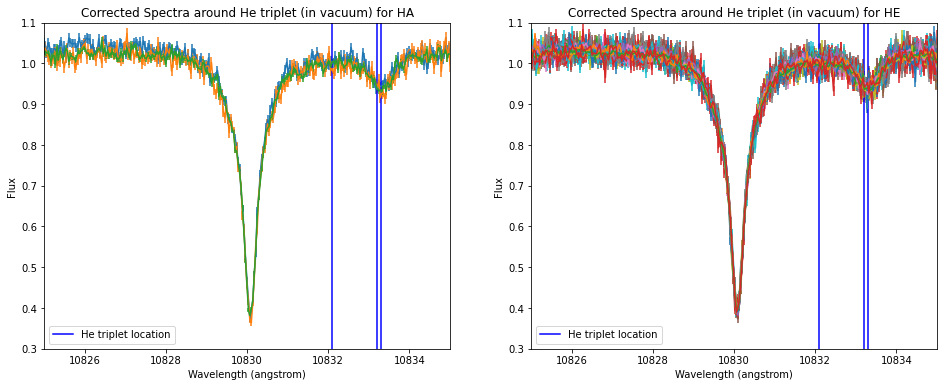

In [9]:
#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 6])

    for i in range(len(total_lamda_HA)):
        ax1.errorbar(total_lamda_HA[i], total_norm_spctr_HA[i], yerr=total_norm_err_HA[i])
        ax1.set_xlabel('Wavelength (angstrom)')
        ax1.set_ylabel('Flux')
        ax1.set_title('Corrected Spectra around He triplet (in vacuum) for HA')
        ax1.set_xlim([10825, 10835])
        ax1.set_ylim([0.3, 1.1])
    
    for i in range(len(total_lamda_HE)):
        ax2.errorbar(total_lamda_HE[i], total_norm_spctr_HE[i], yerr=total_norm_err_HE[i])
        ax2.set_xlabel('Wavelength (angstrom)')
        ax2.set_ylabel('Flux')
        ax2.set_title('Corrected Spectra around He triplet (in vacuum) for HE')
        ax2.set_xlim([10825, 10835])
        ax2.set_ylim([0.3, 1.1])

    ax1.axvline(10833.2, color='b', label='He triplet location')
    ax1.axvline(10833.3, color='b')
    ax1.axvline(10832.1, color='b')

    ax2.axvline(10833.2, color='b', label='He triplet location')
    ax2.axvline(10833.3, color='b')
    ax2.axvline(10832.1, color='b')

    ax1.legend()
    ax2.legend()
    plt.show()
    
#If there is one mode of observation
else:
    plt.figure(figsize=[15, 8])
    for i in range(len(total_lamda)):
        plt.errorbar(total_lamda[i], total_norm_spctr[i], yerr=total_norm_err[i])
    plt.xlabel('Wavelength (angstrom)')
    plt.ylabel('Flux')
    plt.title('Corrected Spectra around He triplet (in vacuum)')
    plt.xlim([10825, 10835])
    plt.ylim([0.3, 1.1])
    
    plt.axvline(10833.2, color='b', label='He triplet location')
    plt.axvline(10833.3, color='b')
    plt.axvline(10832.1, color='b')

    plt.legend()
    plt.show()

## Perform air-to-vacuum correction

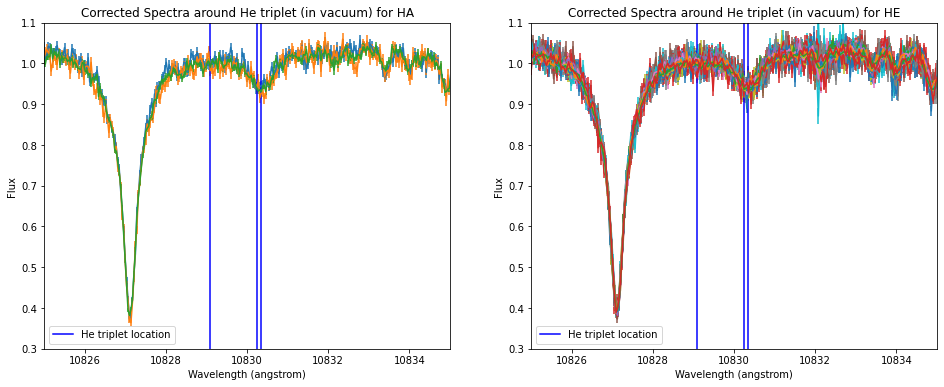

In [10]:
#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 6])

    for i in range(len(total_lamda_HA)):
        ax1.errorbar(AF.vac2air(total_lamda_HA[i]), total_norm_spctr_HA[i], yerr=total_norm_err_HA[i])
        ax1.set_xlabel('Wavelength (angstrom)')
        ax1.set_ylabel('Flux')
        ax1.set_title('Corrected Spectra around He triplet (in vacuum) for HA')
        ax1.set_xlim([10825, 10835])
        ax1.set_ylim([0.3, 1.1])
    
    for i in range(len(total_lamda_HE)):
        ax2.errorbar(AF.vac2air(total_lamda_HE[i]), total_norm_spctr_HE[i], yerr=total_norm_err_HE[i])
        ax2.set_xlabel('Wavelength (angstrom)')
        ax2.set_ylabel('Flux')
        ax2.set_title('Corrected Spectra around He triplet (in vacuum) for HE')
        ax2.set_xlim([10825, 10835])
        ax2.set_ylim([0.3, 1.1])

    ax1.axvline(10829.09, color='b', label='He triplet location')
    ax1.axvline(10830.34, color='b')
    ax1.axvline(10830.25, color='b')

    ax2.axvline(10829.09, color='b', label='He triplet location')
    ax2.axvline(10830.34, color='b')
    ax2.axvline(10830.25, color='b')

    ax1.legend()
    ax2.legend()
    
#If there is one mode of observation 
else:
    plt.figure(figsize=[15, 8])
    for i in range(len(total_lamda)):
        plt.errorbar(AF.vac2air(total_lamda[i]), total_norm_spctr[i], yerr=total_norm_err[i])
    plt.xlabel('Wavelength (angstrom)')
    plt.ylabel('Flux')
    plt.title('Corrected Spectra around He triplet (in vacuum)')
    plt.xlim([10825, 10835])
    plt.ylim([0.3, 1.1])
    
    plt.axvline(10833.2, color='b', label='He triplet location')
    plt.axvline(10833.3, color='b')
    plt.axvline(10832.1, color='b')

    plt.legend()
    plt.show()

## Plotting the continuum

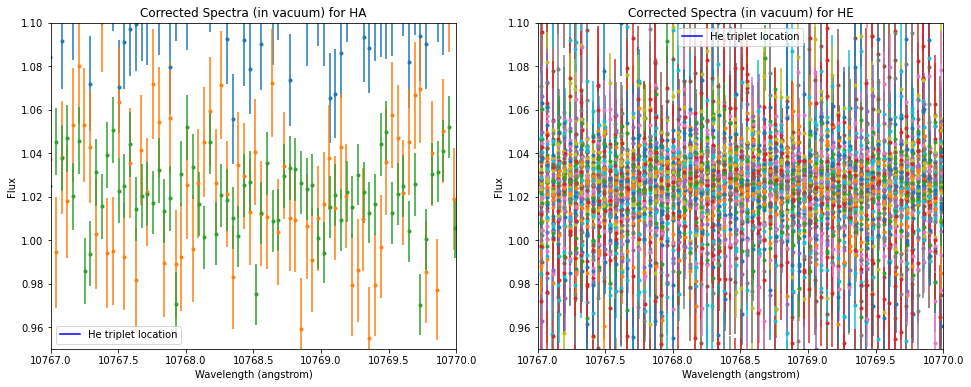

In [15]:
#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 6])

    for i in range(len(total_lamda_HA)):
        ax1.errorbar(total_lamda_HA[i], total_norm_spctr_HA[i], yerr=total_norm_err_HA[i], fmt='.')
        ax1.set_xlabel('Wavelength (angstrom)')
        ax1.set_ylabel('Flux')
        ax1.set_title('Corrected Spectra (in vacuum) for HA')
        ax1.set_xlim([10767, 10770])
        ax1.set_ylim([0.95, 1.1])
    
    for i in range(len(total_lamda_HE)):
        ax2.errorbar(total_lamda_HE[i], total_norm_spctr_HE[i], yerr=total_norm_err_HE[i], fmt='.')
        ax2.set_xlabel('Wavelength (angstrom)')
        ax2.set_ylabel('Flux')
        ax2.set_title('Corrected Spectra (in vacuum) for HE')
        ax2.set_xlim([10767, 10770])
        ax2.set_ylim([0.95, 1.1])

    ax1.axvline(10829.09, color='b', label='He triplet location')
    ax1.axvline(10830.34, color='b')
    ax1.axvline(10830.25, color='b')

    ax2.axvline(10829.09, color='b', label='He triplet location')
    ax2.axvline(10830.34, color='b')
    ax2.axvline(10830.25, color='b')

    ax1.legend()
    ax2.legend()

#If there is one mode of observation
else:
    plt.figure(figsize=[15, 8])
    for i in range(len(total_lamda)):
        plt.errorbar(total_lamda[i], total_norm_spctr[i], yerr=total_norm_err[i], fmt='.')
    plt.xlabel('Wavelength (angstrom)')
    plt.ylabel('Flux')
    plt.title('Corrected Spectra (in vacuum)')
    plt.xlim([10767, 10770])
    plt.ylim([0.95, 1.1])
    
    plt.axvline(10833.2, color='b', label='He triplet location')
    plt.axvline(10833.3, color='b')
    plt.axvline(10832.1, color='b')

    plt.legend()
    plt.show()

## Calculating the systematics

In [16]:
low = 10767
up = 10770

#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    
    index_A = 1
    index_E = 1

    std_A = np.zeros(index_A)
    std_E = np.zeros(index_E)

    photon_A = np.zeros(index_A)
    photon_E = np.zeros(index_E)

    for i in range(index_A):
    
        low_lamda_A = total_lamda_HA[i][low<total_lamda_HA[i]]
        low_spctr_A = total_spctr_HA[i][low<total_lamda_HA[i]]
        low_err_A = total_err_HA[i][low<total_lamda_HA[i]]
    
        bound_spctr_A = low_spctr_A[low_lamda_A < up]
        bound_err_A = low_err_A[low_lamda_A < up]
    
        std_A[i] = np.std(bound_spctr_A)

        photon_A[i] = np.sqrt(np.mean(bound_spctr_A))

    for i in range(index_E):

        low_lamda_E = total_lamda_HE[i][low<total_lamda_HE[i]]
        low_spctr_E = total_spctr_HE[i][low<total_lamda_HE[i]]
        low_err_E = total_err_HE[i][low<total_lamda_HE[i]]
    
        bound_spctr_E = low_spctr_E[low_lamda_E < up]
        bound_err_E = low_err_E[low_lamda_E < up]
    
        std_E[i] = np.std(bound_spctr_E)

        photon_E[i] = np.sqrt(np.mean(bound_spctr_E))

#If there is one mode of observation
else:
    index = 1

    std = np.zeros(index)

    photon = np.zeros(index)

    for i in range(index):
    
        low_lamda = total_lamda[i][low<total_lamda[i]]
        low_spctr = total_spctr[i][low<total_lamda[i]]
        low_err = total_err[i][low<total_lamda[i]]
    
        bound_spctr = low_spctr[low_lamda < up]
        bound_err = low_err[low_lamda < up]
    
        std[i] = np.std(bound_spctr)

        photon[i] = np.sqrt(np.mean(bound_spctr))

In [17]:
#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    
    print('Standard deviations:', np.mean(std_A), np.mean(std_E))
    print('Photon noise:', np.mean(photon_A), np.mean(photon_E))
    print('SNR:', np.mean(tot_SNR[0]), np.mean(tot_SNR[0]))
    ##Noise is 
    print(np.sqrt(np.mean(std_A)**2 - np.mean(photon_A)**2), np.sqrt(np.mean(std_E)**2 - np.mean(photon_E)**2))
    
#If there is one mode of observation
else:
    print('Standard deviations:', np.mean(std))
    print('Photon noise:', np.mean(photon))
    print('SNR:', np.mean(tot_SNR[0]))
    ##Noise is 
    print(np.sqrt(np.mean(std)**2 - np.mean(photon)**2))


Standard deviations: 166913176.53090066 561402428.1356462
Photon noise: 84311.4828969513 234998.58652333615
SNR: 67.7423766205864 67.7423766205864
166913155.23711562 561402378.9513755


## Building a master spectrum

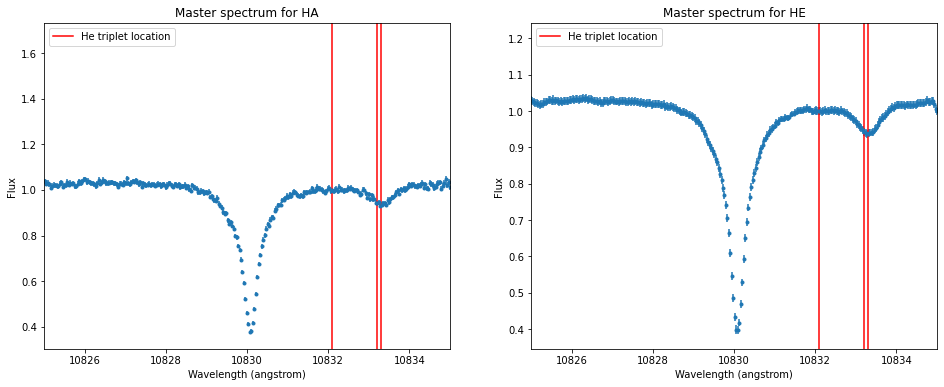

In [18]:
#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    
    master_lamda_HA = np.mean(total_lamda_HA, axis=0)
    master_norm_spctr_HA = np.mean(total_norm_spctr_HA, axis=0)
    master_norm_err_HA = np.mean(total_norm_err_HA, axis=0)

    master_lamda_HE = np.mean(total_lamda_HE, axis=0)
    master_norm_spctr_HE = np.mean(total_norm_spctr_HE, axis=0)
    master_norm_err_HE = np.mean(total_norm_err_HA, axis=0)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 6])

    ax1.errorbar(master_lamda_HA, master_norm_spctr_HA, yerr=master_norm_err_HA, fmt='.')
    ax2.errorbar(master_lamda_HE, master_norm_spctr_HE, yerr=master_norm_err_HE, fmt='.')
    ax1.set_xlabel('Wavelength (angstrom)')
    ax2.set_xlabel('Wavelength (angstrom)')
    ax1.set_ylabel('Flux')
    ax2.set_ylabel('Flux')
    ax1.set_title('Master spectrum for HA')
    ax2.set_title('Master spectrum for HE')
    ax1.set_xlim([10825, 10835])
    ax2.set_xlim([10825, 10835])
    ax1.axvline(10833.2, color='red', label='He triplet location')
    ax1.axvline(10833.3, color='red')
    ax1.axvline(10832.1, color='red')
    ax2.axvline(10833.2, color='red', label='He triplet location')
    ax2.axvline(10833.3, color='red')
    ax2.axvline(10832.1, color='red')
    ax1.legend()
    ax2.legend()
    plt.show()

#If there is one mode of observation
else:
    plt.figure(figsize=[15, 8])
    
    master_lamda = np.mean(total_lamda, axis=0)
    master_norm_spctr = np.mean(total_norm_spctr, axis=0)
    master_norm_err = np.mean(total_norm_err, axis=0)

    plt.errorbar(master_lamda, master_norm_spctr, yerr=master_norm_err, fmt='.')
    plt.xlabel('Wavelength (angstrom)')
    plt.ylabel('Flux')
    plt.title('Master spectrum')
    plt.xlim([10825, 10835])
    plt.axvline(10833.2, color='red', label='He triplet location')
    plt.axvline(10833.3, color='red')
    plt.axvline(10832.1, color='red')
    plt.legend()
    plt.show()

## Making residuals 

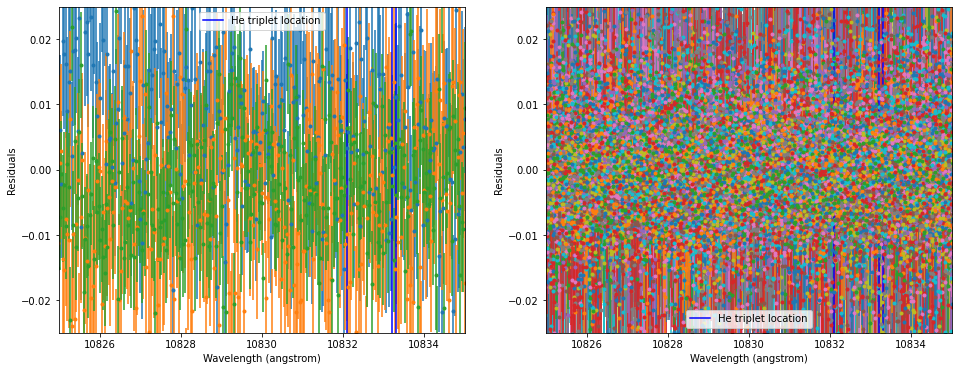

In [19]:
#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 6])
    
    for i in range(len(total_norm_spctr_HA)):
        ax1.errorbar(master_lamda_HA, total_norm_spctr_HA[i] - master_norm_spctr_HA, yerr=total_norm_err_HA[i], fmt='.')
        ax1.set_xlabel('Wavelength (angstrom)')
        ax1.set_ylabel('Residuals')
        ax1.set_xlim([10825, 10835])
        ax1.set_ylim(-0.025, 0.025)

    for i in range(len(total_norm_spctr_HE)):
        ax2.errorbar(master_lamda_HE, total_norm_spctr_HE[i] - master_norm_spctr_HE, yerr=total_norm_err_HE[i], fmt='.')
        ax2.set_xlabel('Wavelength (angstrom)')
        ax2.set_ylabel('Residuals')
        ax2.set_xlim([10825, 10835])
        ax2.set_ylim(-0.025, 0.025)
    ax1.set_title('Residuals for HA')
    ax1.axvline(10833.2, color='b', label='He triplet location')
    ax1.axvline(10833.3, color='b')
    ax1.axvline(10832.1, color='b')

    ax2.set_title('Residuals for HE')
    ax2.axvline(10833.2, color='b', label='He triplet location')
    ax2.axvline(10833.3, color='b')
    ax2.axvline(10832.1, color='b')

    ax1.legend()
    ax2.legend()

#If there is one mode of observation
else:
    plt.figure(figsize=[15, 8])  
    for i in range(len(total_norm_spctr)):
        plt.errorbar(master_lamda, total_norm_spctr[i] - master_norm_spctr, yerr=total_norm_err[i], fmt='.')
    plt.xlabel('Wavelength (angstrom)')
    plt.ylabel('Residuals')
    plt.xlim([10825, 10835])
    plt.title('Residuals')
    plt.axvline(10833.2, color='b', label='He triplet location')
    plt.axvline(10833.3, color='b')
    plt.axvline(10832.1, color='b')

    plt.legend()
    plt.show()
    

## Fitting a gaussian to the He triplet line

[-7.18912413e-02 -7.08757269e+01  1.08333146e+04  2.68607782e-01
  6.63612622e-03]


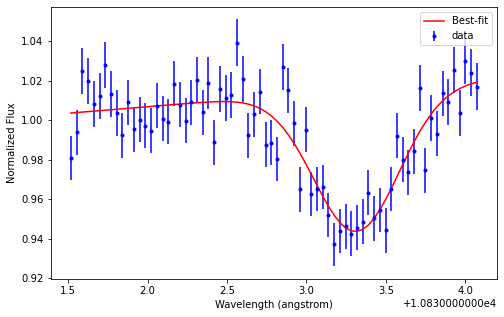

[-7.36116970e-02 -1.04924548e+02  1.08333487e+04  2.66359346e-01
  9.77829685e-03]


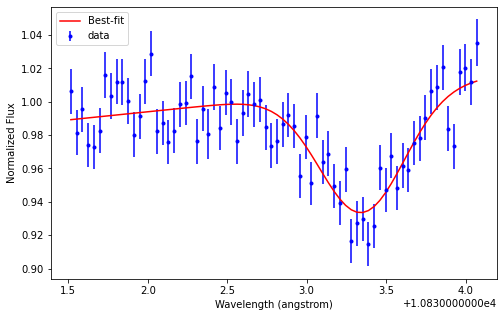

[-7.32110648e-02 -1.02526902e+02  1.08333128e+04  2.70717682e-01
  9.55725958e-03]


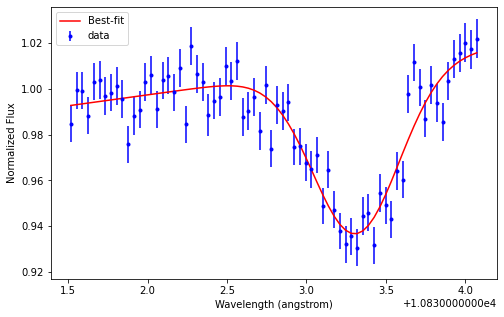

[-6.98534089e-02 -6.43216170e+01  1.08333212e+04  2.67785988e-01
  6.03038561e-03]


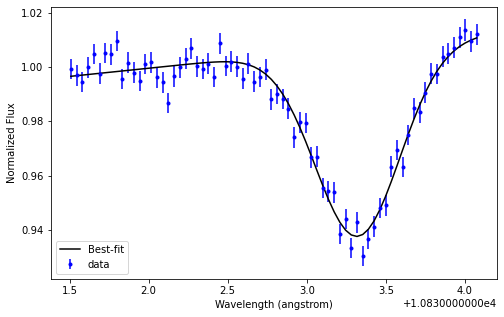

[-6.67466483e-02 -5.25261016e+01  1.08333094e+04  2.93948489e-01
  4.94163327e-03]


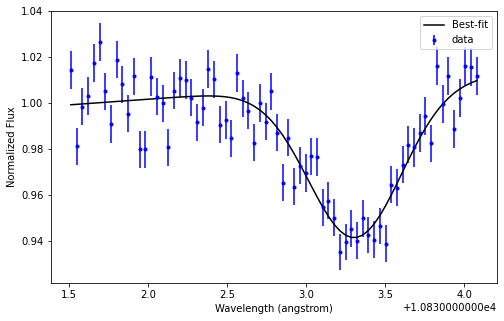

[-7.29714784e-02 -1.07041306e+02  1.08333218e+04  2.94474804e-01
  9.97464180e-03]


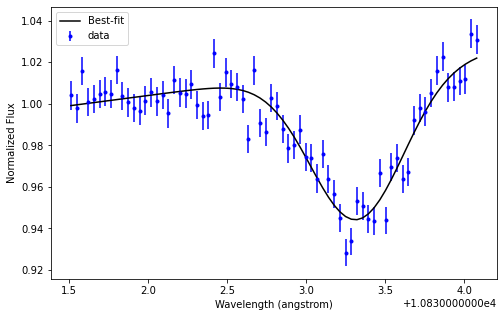

[-6.80686541e-02 -3.33442163e+01  1.08333054e+04  2.46350376e-01
  3.17072331e-03]


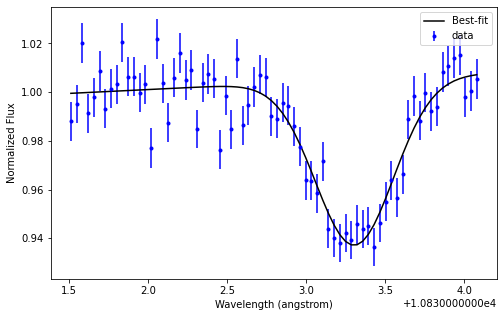

[-7.34672154e-02 -1.00798993e+02  1.08333351e+04  2.93254797e-01
  9.39792521e-03]


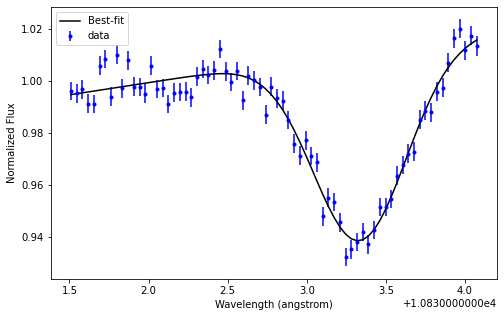

[-6.90817716e-02 -6.61577326e+01  1.08332862e+04  2.90349503e-01
  6.20056104e-03]


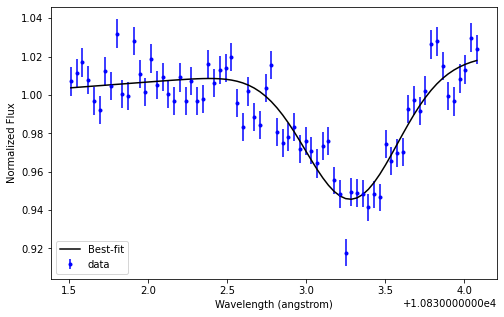

[-6.79438841e-02 -8.95094214e+01  1.08333183e+04  2.65924656e-01
  8.35584240e-03]


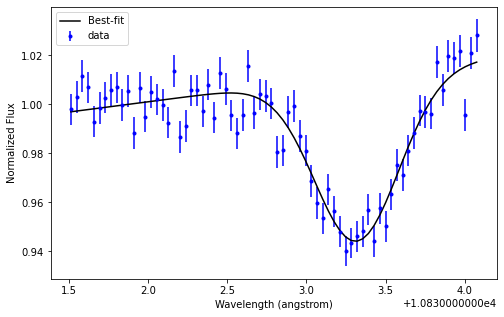

[-6.79882354e-02 -7.48739359e+01  1.08332890e+04  2.86001873e-01
  7.00448103e-03]


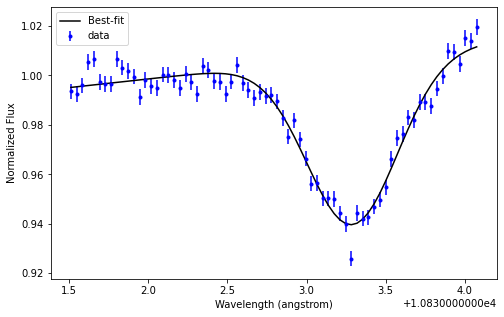

[-7.30386979e-02 -8.14295649e+01  1.08332752e+04  2.58608136e-01
  7.60968791e-03]


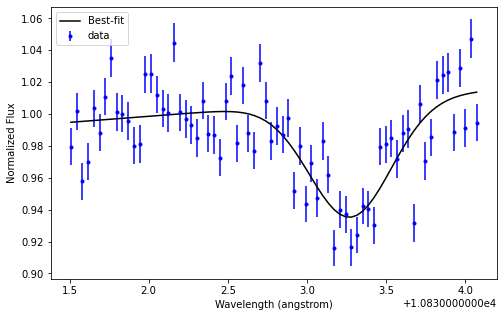

[-7.61169058e-02 -1.33906136e+02  1.08333260e+04  3.01231849e-01
  1.24543449e-02]


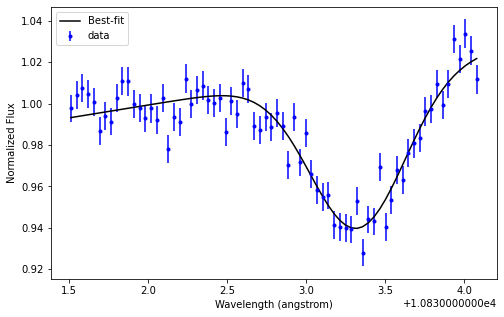

[-7.16711785e-02 -1.05846117e+02  1.08332984e+04  2.82544415e-01
  9.86414005e-03]


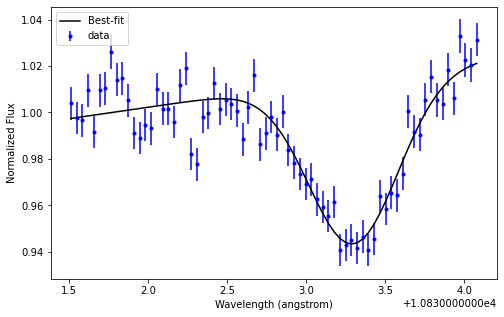

[-7.37923197e-02 -7.91879872e+01  1.08333078e+04  2.87678184e-01
  7.40309128e-03]


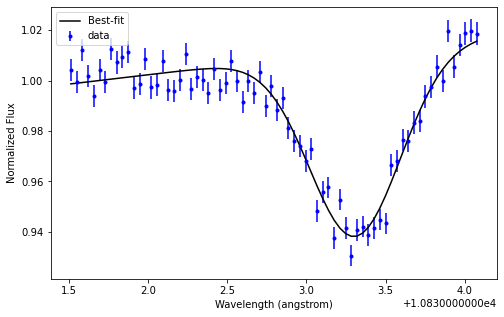

[-7.04438229e-02 -6.61394020e+01  1.08333131e+04  2.70269630e-01
  6.19816396e-03]


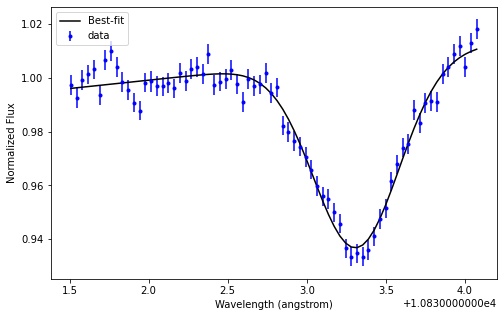

[-7.19316014e-02 -7.26683404e+01  1.08333129e+04  2.66629218e-01
  6.80093834e-03]


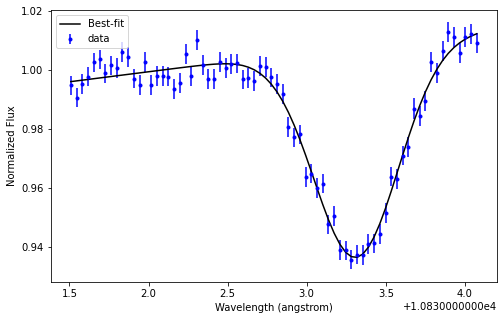

[-7.00455120e-02 -7.04620839e+01  1.08333035e+04  2.76425189e-01
  6.59701472e-03]


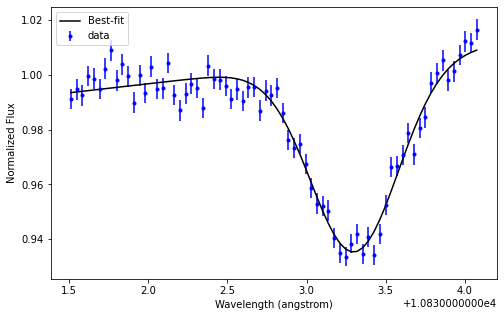

[-7.46686888e-02 -1.73178135e+02  1.08334000e+04  4.24229901e-01
  1.60805739e-02]


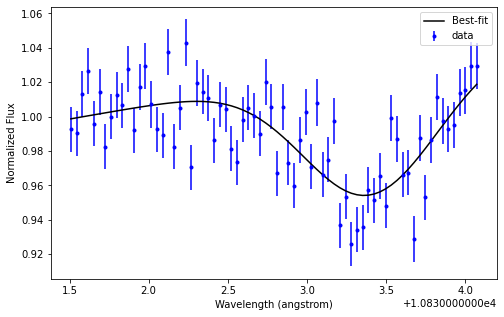

[-7.10742419e-02 -8.47483733e+01  1.08332914e+04  3.35800787e-01
  7.91691188e-03]


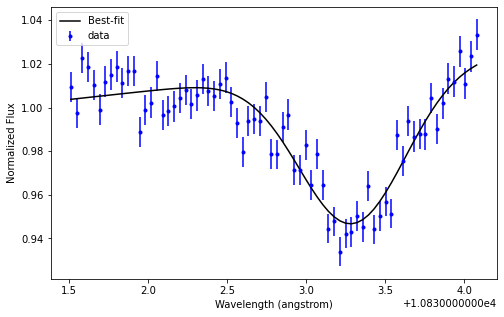

[-6.51125371e-02 -4.80885988e+01  1.08332962e+04  2.72313138e-01
  4.53219016e-03]


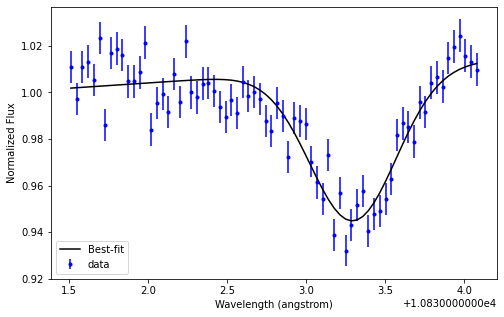

[-7.33259852e-02 -7.87022868e+01  1.08332995e+04  2.94202322e-01
  7.35799458e-03]


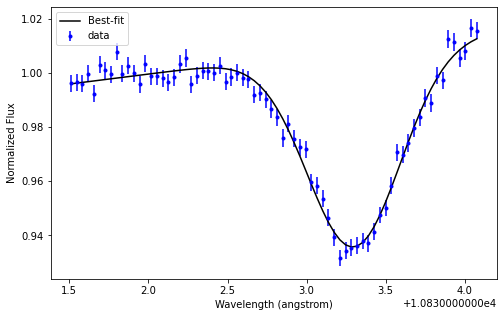

[-6.77309521e-02 -9.51675623e+01  1.08333384e+04  3.00695193e-01
  8.87889728e-03]


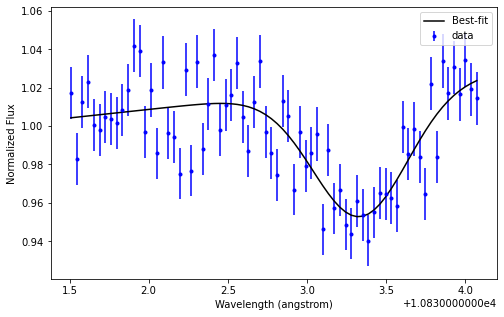

[-7.09664491e-02 -8.52750634e+01  1.08333158e+04  2.83203813e-01
  7.96479797e-03]


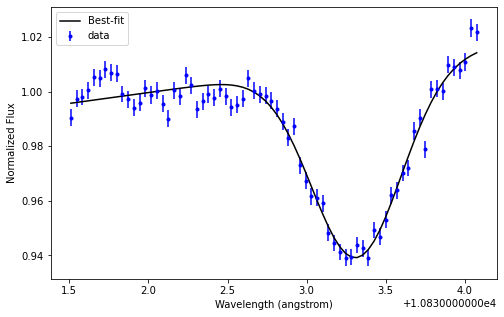

[-6.87203495e-02 -5.29733893e+01  1.08332813e+04  2.72210703e-01
  4.98326591e-03]


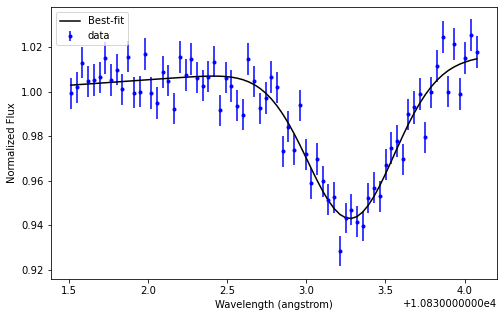

[-7.35381346e-02 -6.57469342e+01  1.08333074e+04  2.65890535e-01
  6.16223428e-03]


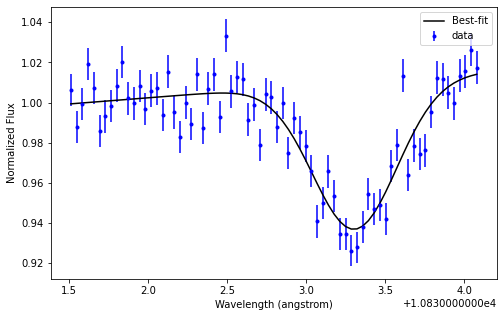

[-6.99564185e-02 -6.63375396e+01  1.08333057e+04  2.73942433e-01
  6.21661728e-03]


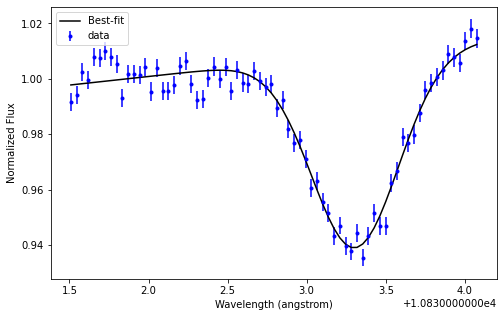

[-7.05451252e-02 -8.23299031e+01  1.08333068e+04  2.90071538e-01
  7.69316677e-03]


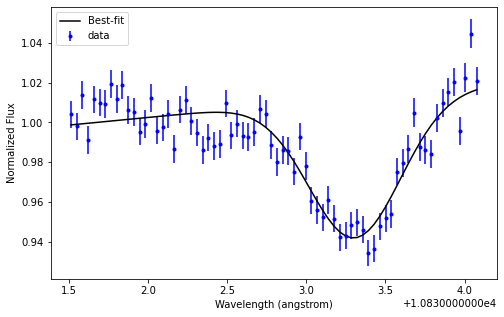

[-6.39811582e-02 -3.33783710e+01  1.08333216e+04  2.96313945e-01
  3.17452082e-03]


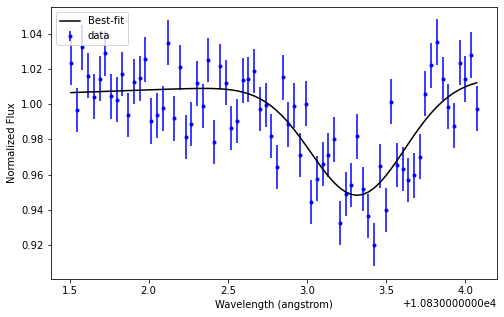

[-7.66460230e-02 -8.98519544e+01  1.08333151e+04  2.54375169e-01
  8.38739908e-03]


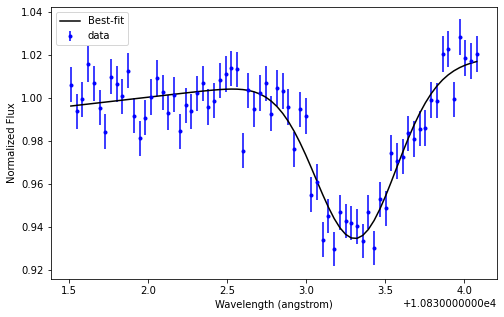

[-7.04035763e-02 -5.31083775e+01  1.08333065e+04  2.77847356e-01
  4.99519102e-03]


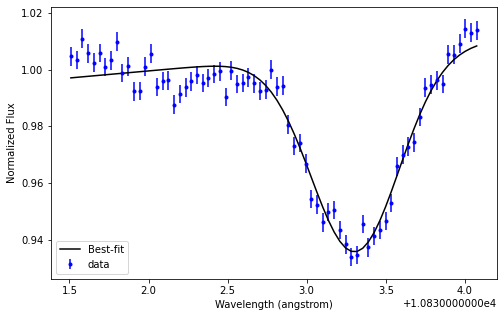

[-7.23591388e-02 -7.09200413e+01  1.08333156e+04  2.88212178e-01
  6.64028792e-03]


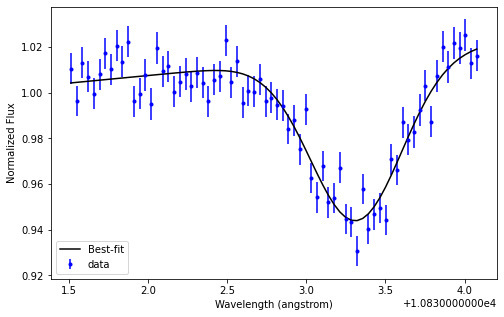

[-8.54346957e-02 -1.34640617e+02  1.08333001e+04  2.88715931e-01
  1.25223033e-02]


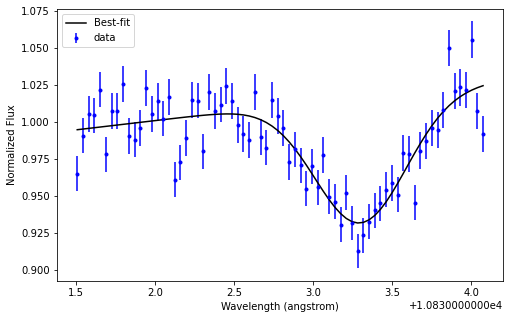

[-7.02032151e-02 -5.63331574e+01  1.08332924e+04  2.62113765e-01
  5.29293750e-03]


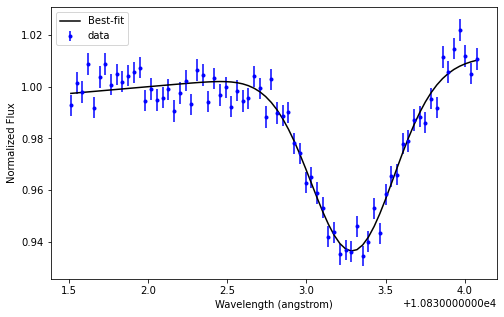

[-7.00135378e-02 -8.34789267e+01  1.08333028e+04  2.85657245e-01
  7.79895304e-03]


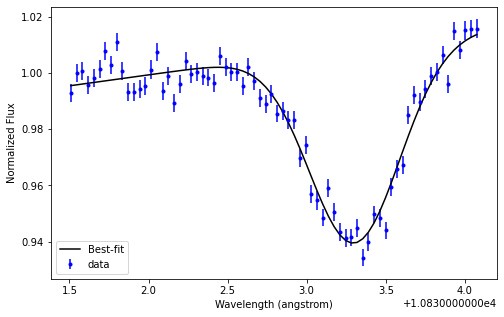

[-7.20329524e-02 -5.89192377e+01  1.08333112e+04  2.58177265e-01
  5.53167487e-03]


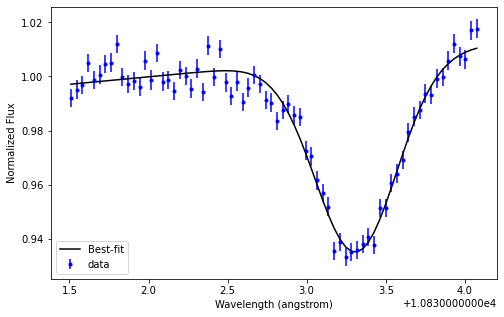

[-7.75704587e-02 -6.40457711e+01  1.08333078e+04  3.03458911e-01
  6.00553996e-03]


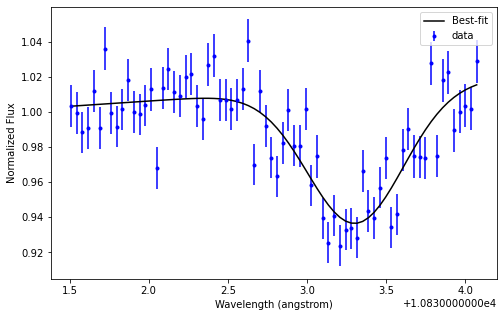

[-7.24346901e-02 -7.68816549e+01  1.08332968e+04  2.67451805e-01
  7.18990916e-03]


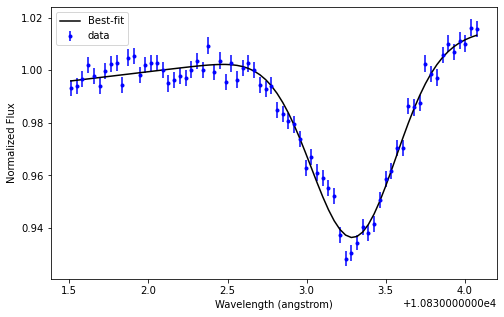

[-6.76922686e-02 -5.89627275e+01  1.08333102e+04  2.59217799e-01
  5.53552718e-03]


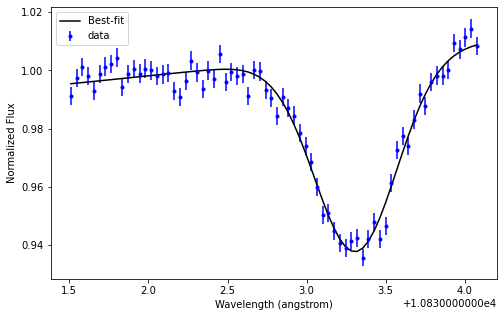

[-7.55161413e-02 -6.63336619e+01  1.08333107e+04  2.57026537e-01
  6.21560644e-03]


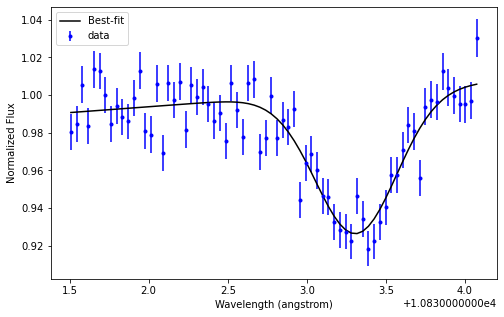

[-7.87417975e-02 -1.14400009e+02  1.08333261e+04  2.83012208e-01
  1.06537589e-02]


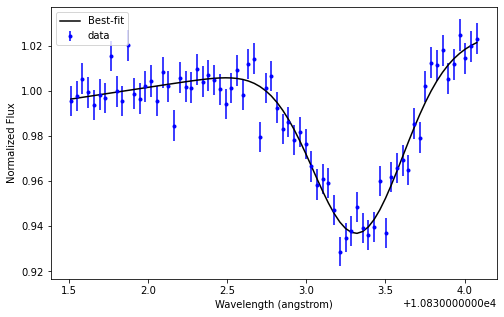

[-6.67724008e-02 -6.28462568e+01  1.08333070e+04  2.95928753e-01
  5.89409225e-03]


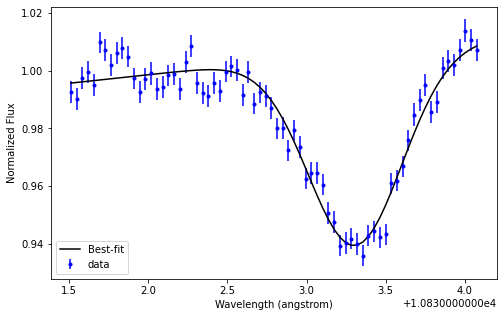

[-8.40699476e-02 -1.52185134e+02  1.08333184e+04  3.05089196e-01
  1.41422446e-02]


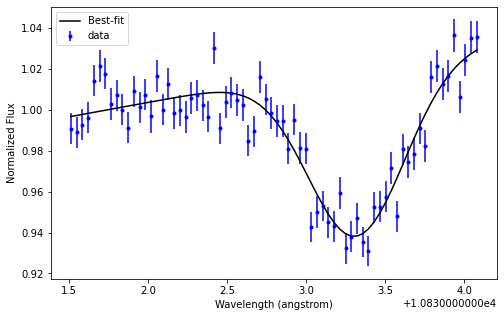

[-7.25947977e-02 -9.16318819e+01  1.08332903e+04  2.88504765e-01
  8.55211916e-03]


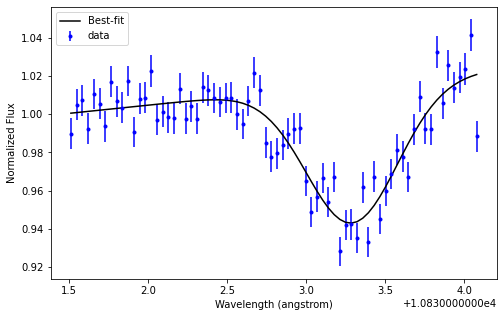

[-7.17902036e-02 -6.52678154e+01  1.08332925e+04  2.88829378e-01
  6.11796174e-03]


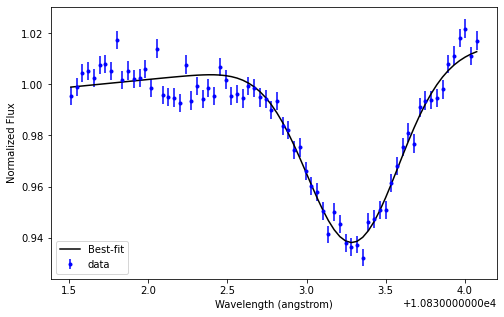

[-7.79396179e-02 -8.98633960e+01  1.08333032e+04  2.83925637e-01
  8.38851176e-03]


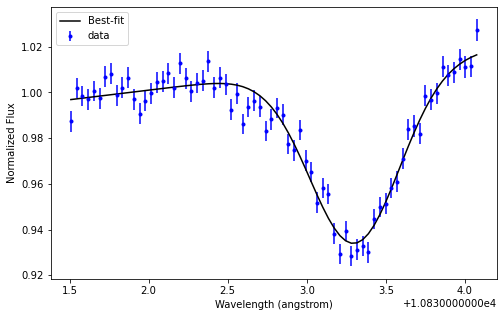

[-7.41157208e-02 -6.91354977e+01  1.08333046e+04  2.76778937e-01
  6.47472212e-03]


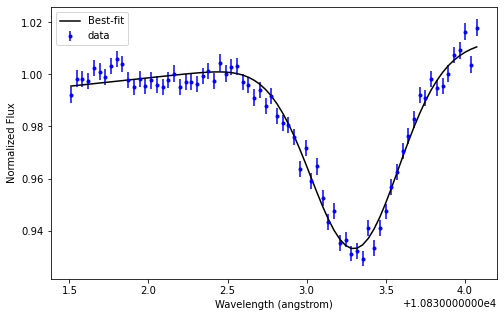

[-6.87201223e-02 -6.52982707e+01  1.08333034e+04  2.93733492e-01
  6.12054513e-03]


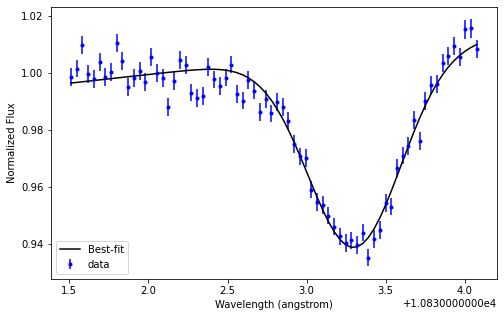

[-6.81697359e-02 -5.85960943e+01  1.08332935e+04  2.69235307e-01
  5.50177146e-03]


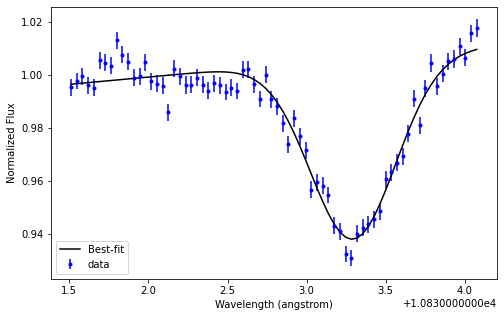

[-7.18467838e-02 -6.44310926e+01  1.08333124e+04  2.63691969e-01
  6.04066162e-03]


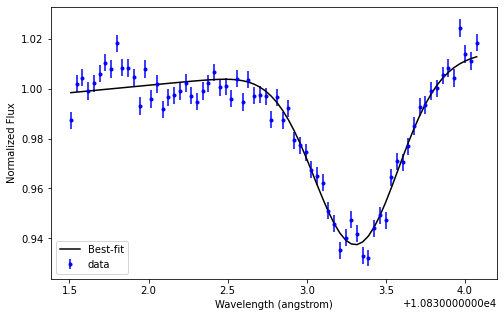

[-8.22261712e-02 -8.34884632e+01  1.08332930e+04  2.77767265e-01
  7.79971961e-03]


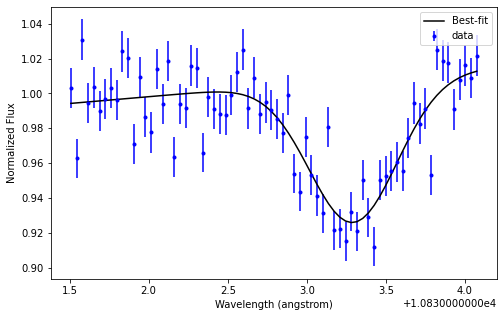

[-6.76082116e-02 -7.27818646e+01  1.08333013e+04  2.80337967e-01
  6.81116794e-03]


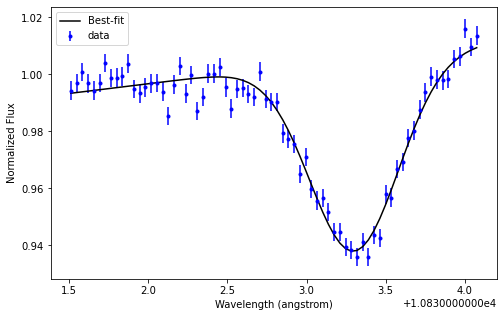

[-7.50020663e-02 -1.15293429e+02  1.08333020e+04  2.80916882e-01
  1.07364212e-02]


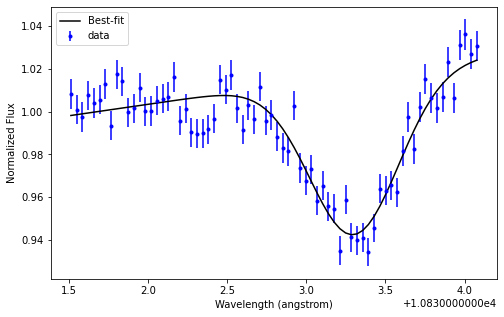

[-7.23313778e-02 -1.15164016e+02  1.08333082e+04  3.18295087e-01
  1.07242525e-02]


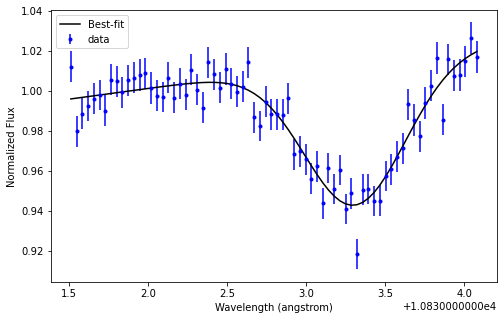

[-7.04635754e-02 -7.19888922e+01  1.08333039e+04  2.79281852e-01
  6.73831466e-03]


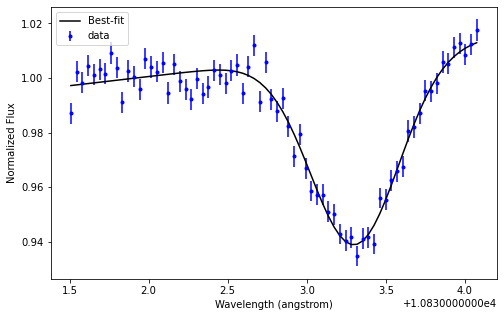

[-7.15219877e-02 -7.45671889e+01  1.08333017e+04  2.75223628e-01
  6.97628851e-03]


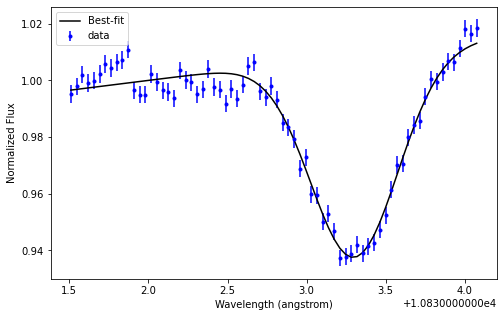

[-7.30974974e-02 -1.05103265e+02  1.08333042e+04  2.77054178e-01
  9.79512343e-03]


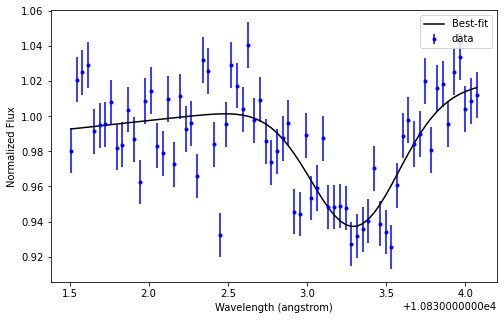

[-6.99564150e-02 -8.90919421e+01  1.08332932e+04  2.97194908e-01
  8.31710532e-03]


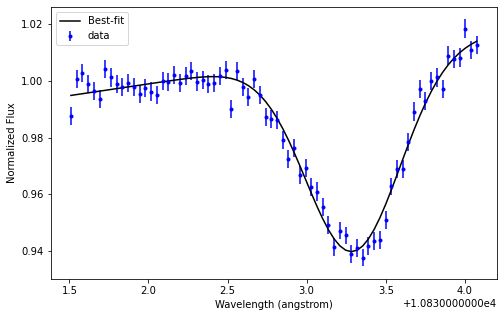

[-7.09193765e-02 -5.56640946e+01  1.08332904e+04  2.70430409e-01
  5.23115294e-03]


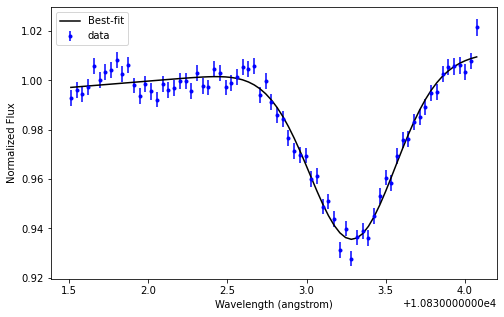

[-7.00502086e-02 -4.94498265e+01  1.08333002e+04  2.79315554e-01
  4.65790764e-03]


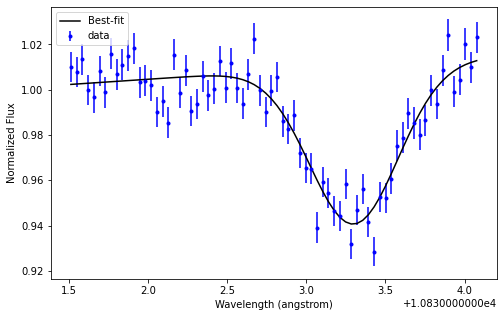

[-7.30314501e-02 -1.00473523e+02  1.08333097e+04  2.69419110e-01
  9.36804730e-03]


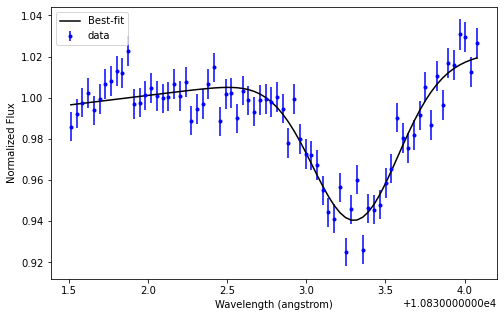

[-7.76865641e-02 -7.64904001e+01  1.08332920e+04  3.02185754e-01
  7.15342068e-03]


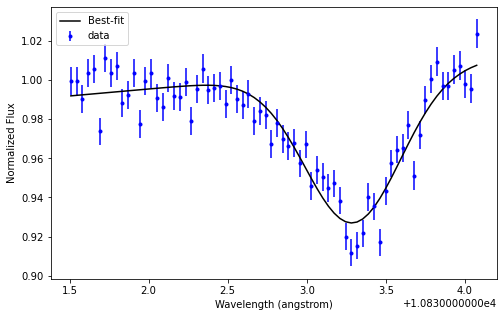

[-7.04707263e-02 -4.53447868e+01  1.08333010e+04  2.21248842e-01
  4.27865271e-03]


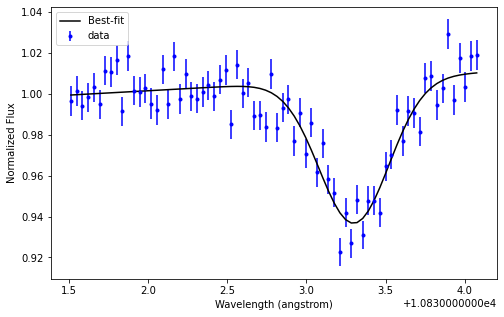

[-7.07576787e-02 -9.47019851e+01  1.08333158e+04  2.98602594e-01
  8.83479824e-03]


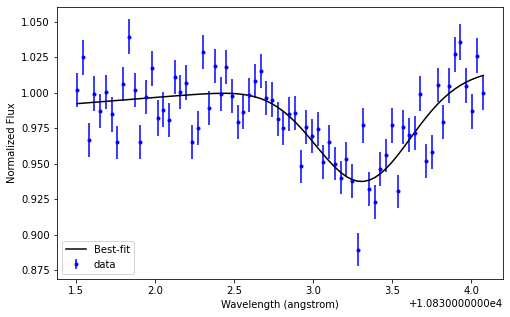

[-7.37220157e-02 -9.16925403e+01  1.08333174e+04  2.86067785e-01
  8.55719788e-03]


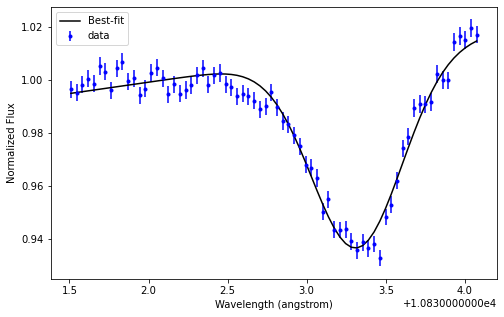

[-7.04947363e-02 -6.44526169e+01  1.08332886e+04  2.84420629e-01
  6.04280390e-03]


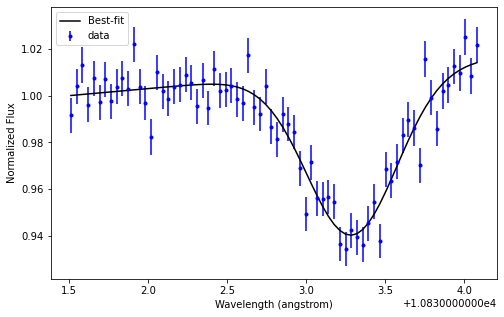

[-6.80044739e-02  1.66945676e+00  1.08332682e+04  2.45625866e-01
 -6.14867210e-05]


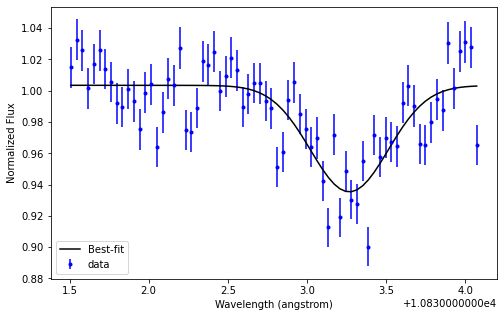

[-6.98975316e-02 -9.91841913e+01  1.08333153e+04  2.96982100e-01
  9.24910557e-03]


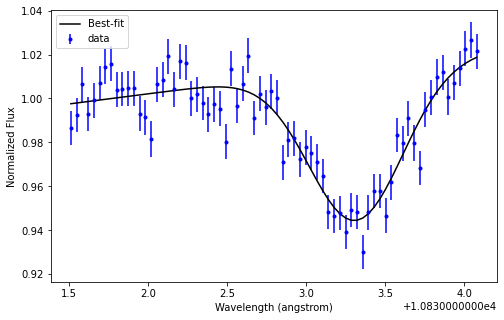

[-7.22996959e-02 -6.00915276e+01  1.08333018e+04  2.83660628e-01
  5.63986472e-03]


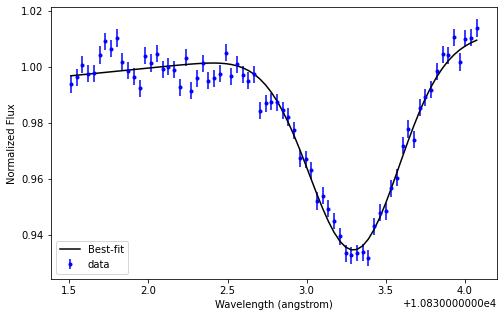

[-7.32240343e-02 -8.25215717e+01  1.08333097e+04  2.69648071e-01
  7.71055112e-03]


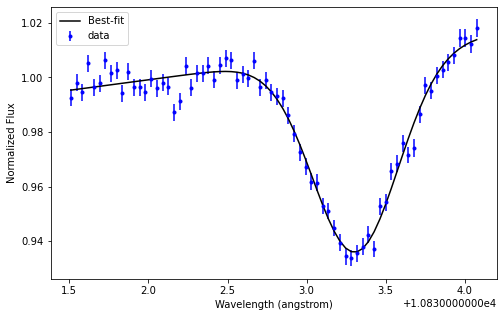

[-8.51824577e-02 -1.28831214e+02  1.08333498e+04  3.23625981e-01
  1.19870840e-02]


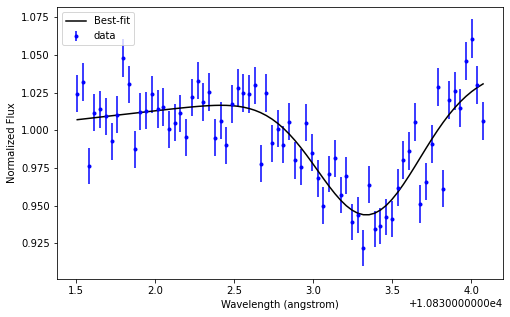

[-6.98667143e-02 -5.34250175e+01  1.08333176e+04  2.65509208e-01
  5.02455049e-03]


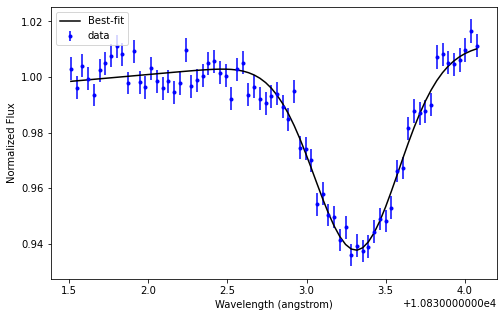

[-6.86122411e-02 -6.73596890e+01  1.08332952e+04  2.80973409e-01
  6.31097534e-03]


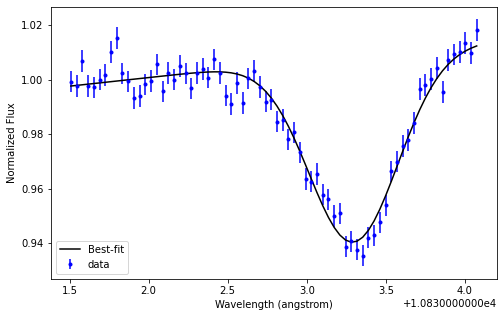

[-7.38868743e-02 -9.11891705e+01  1.08333134e+04  3.06238065e-01
  8.51156729e-03]


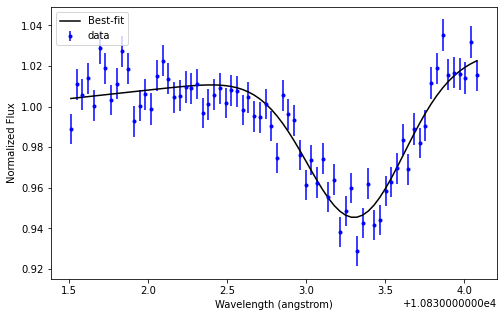

[-7.23144696e-02 -8.44986572e+01  1.08333117e+04  2.85166167e-01
  7.89316537e-03]


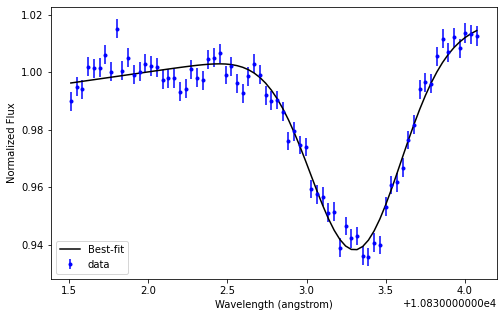

[-7.43458790e-02 -1.14802125e+02  1.08333038e+04  2.87724684e-01
  1.06909214e-02]


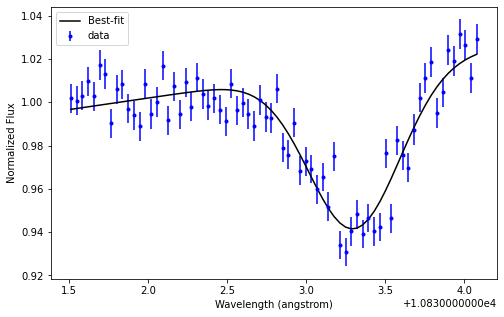

[-7.23622202e-02 -9.74236467e+01  1.08333046e+04  3.05776146e-01
  9.08629880e-03]


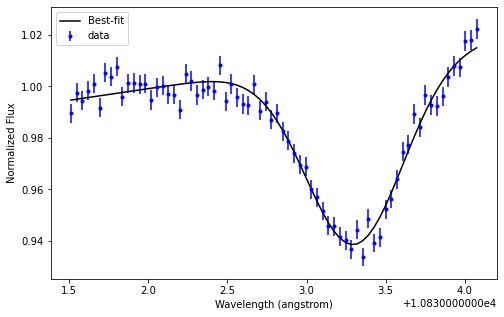

[-7.52185449e-02 -1.09946414e+02  1.08332842e+04  3.05815450e-01
  1.02431978e-02]


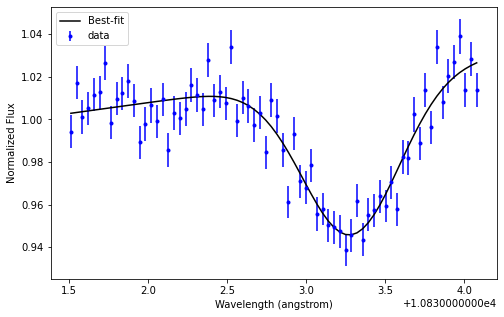

[-7.11779185e-02 -6.85744508e+01  1.08333006e+04  2.61382898e-01
  6.42283984e-03]


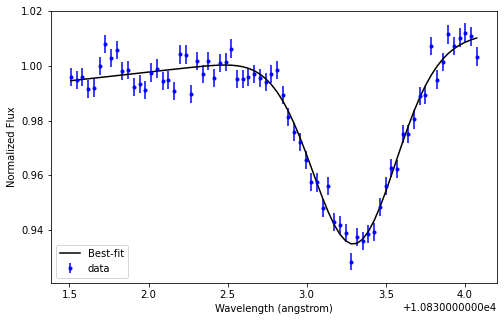

[-7.41589841e-02 -7.52962080e+01  1.08333051e+04  2.85989285e-01
  7.04410777e-03]


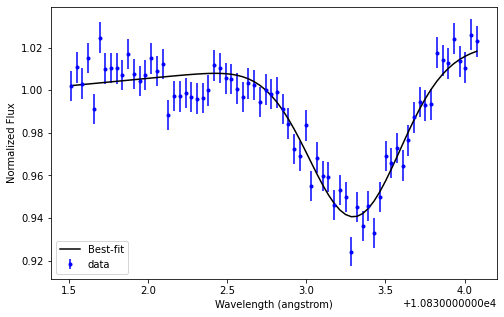

[-7.55298027e-02 -9.64598695e+01  1.08333241e+04  2.85804977e-01
  8.99742546e-03]


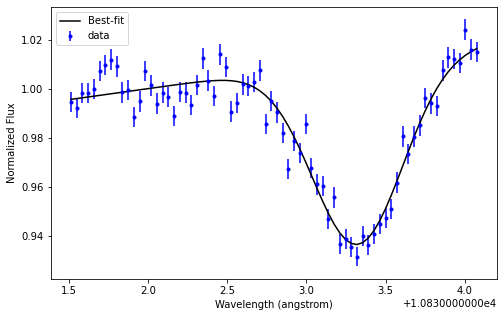

[-7.11675721e-02 -7.43152979e+01  1.08333087e+04  2.57243183e-01
  6.95287588e-03]


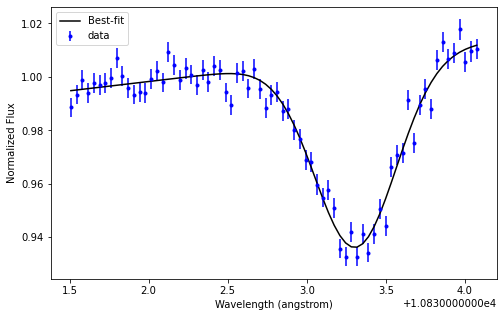

[-6.97359029e-02 -6.95942104e+01  1.08333203e+04  2.68579194e-01
  6.51739542e-03]


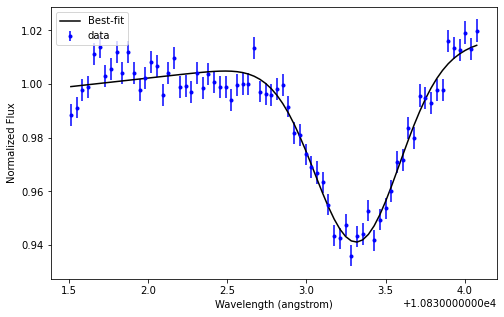

[-7.15504722e-02 -8.21783616e+01  1.08333026e+04  2.71346847e-01
  7.67880031e-03]


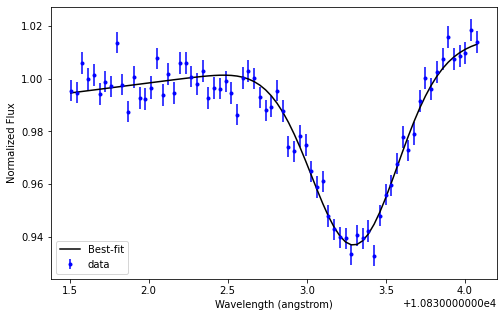

[-7.04849343e-02 -9.97589718e+01  1.08333212e+04  2.77911608e-01
  9.30207787e-03]


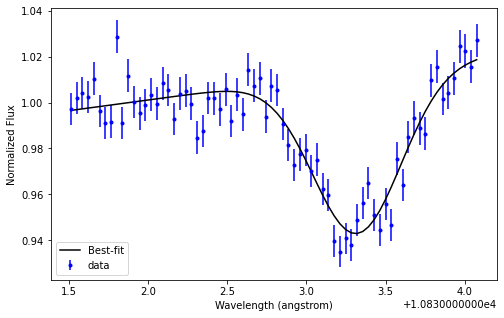

[-7.18389803e-02 -1.06365160e+02  1.08333195e+04  2.73736330e-01
  9.91155527e-03]


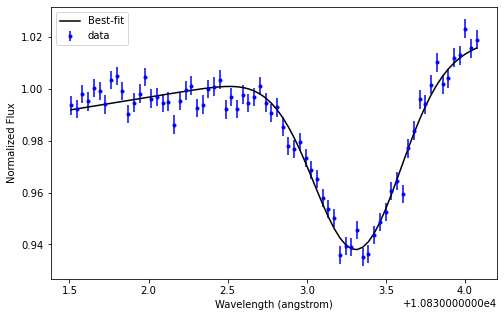

[-7.40219974e-02 -1.42917583e+02  1.08333365e+04  3.11333728e-01
  1.32862949e-02]


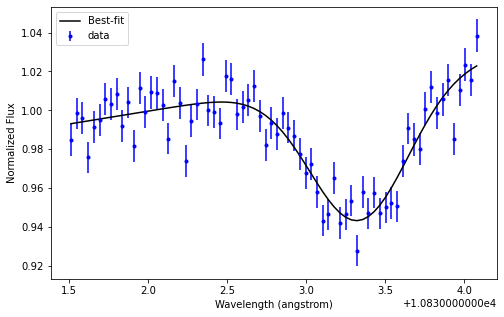

In [20]:
reload(AF)
lower_lim = 10831.5
upper_lim = 10834.1
guess_params = [-0.7, 0.05, 10833.3, 0.1, 0.008]
bounds_param = ((-np.inf, -np.inf, 10833.2, -np.inf, -np.inf),(0, np.inf, 10833.4, np.inf, np.inf)) 

#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    theta_HA, err_theta_HA = AF.fit_spctr_line(AF.gaussian_L, AF.eval_gaussian_L, lower_lim, upper_lim, guess_params, 
                                               bounds_param, total_lamda_HA, total_norm_spctr_HA, total_norm_err_HA, 'r')

    theta_HE, err_theta_HE = AF.fit_spctr_line(AF.gaussian_L, AF.eval_gaussian_L, lower_lim, upper_lim, guess_params, 
                                               bounds_param, total_lamda_HE, total_norm_spctr_HE, total_norm_err_HE, 'k')
#If there is one mode of observation
else:
    theta, err_theta = AF.fit_spctr_line(AF.gaussian_L, AF.eval_gaussian_L, lower_lim, upper_lim, guess_params, 
                                               bounds_param, total_lamda, total_norm_spctr, total_norm_err, 'r')

    

## Plotting the positions, depths and widths of the fitted Gaussian lines

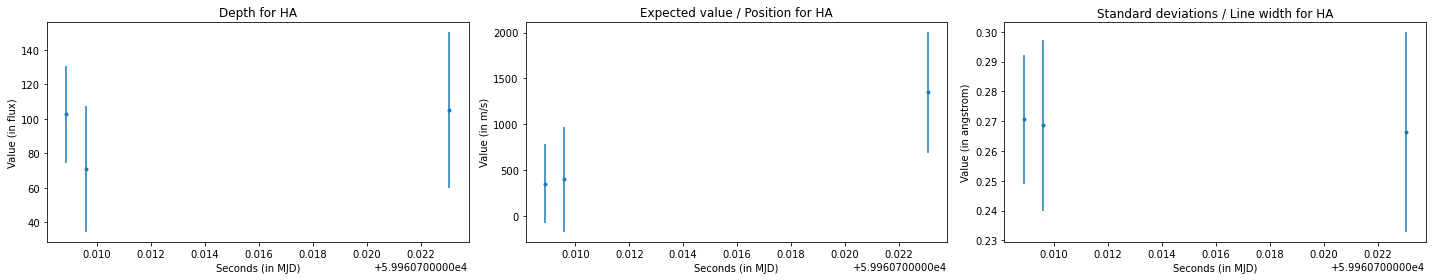

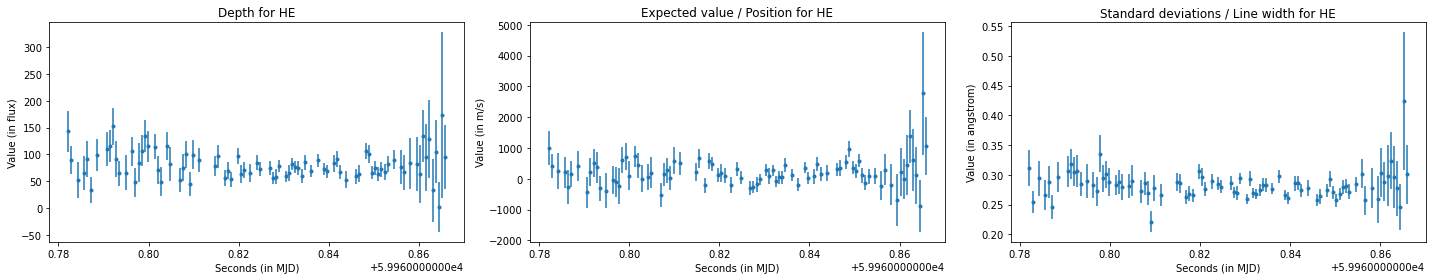

In [21]:
#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[20, 4])

    ref_He = 10833.3

    ax1.errorbar(date_HA, np.abs(theta_HA[:, 1]), yerr=err_theta_HA[:, 1], fmt='.')
    ax2.errorbar(date_HA, (theta_HA[:, 2]-ref_He)*3e8/ref_He, yerr=err_theta_HA[:, 2]*3e8/ref_He, fmt='.')
    ax3.errorbar(date_HA, np.abs(theta_HA[:, 3]), yerr=err_theta_HA[:, 3], fmt='.')
    ax1.set_xlabel('Seconds (in MJD)')
    ax2.set_xlabel('Seconds (in MJD)')
    ax3.set_xlabel('Seconds (in MJD)')
    ax1.set_ylabel('Value (in flux)')
    ax2.set_ylabel('Value (in m/s)')
    ax3.set_ylabel('Value (in angstrom)')
    ax1.set_title('Depth for HA')
    ax2.set_title('Expected value / Position for HA')
    ax3.set_title('Standard deviations / Line width for HA')

    fig.tight_layout()
    plt.show()

    fig, (ax4, ax5, ax6) = plt.subplots (1, 3, figsize=[20, 4])

    ax4.errorbar(date_HE, np.abs(theta_HE[:, 1]), yerr=err_theta_HE[:, 1], fmt='.')
    ax5.errorbar(date_HE, (theta_HE[:, 2]-ref_He)*3e8/ref_He, yerr=err_theta_HE[:, 2]*3e8/ref_He, fmt='.')
    ax6.errorbar(date_HE, np.abs(theta_HE[:, 3]), yerr=err_theta_HE[:, 3], fmt='.')
    ax4.set_xlabel('Seconds (in MJD)')
    ax5.set_xlabel('Seconds (in MJD)')
    ax6.set_xlabel('Seconds (in MJD)')
    ax4.set_ylabel('Value (in flux)')
    ax5.set_ylabel('Value (in m/s)')
    ax6.set_ylabel('Value (in angstrom)')
    ax4.set_title('Depth for HE')
    ax5.set_title('Expected value / Position for HE')
    ax6.set_title('Standard deviations / Line width for HE')

    fig.tight_layout()
    plt.show()
    
#If there one mode of observation.   
else:
    
    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[20, 4])

    ref_He = 10833.3

    ax1.errorbar(date, np.abs(theta[:, 1]), yerr=err_theta[:, 1], fmt='.')
    ax2.errorbar(date, (theta[:, 2]-ref_He)*3e8/ref_He, yerr=err_theta[:, 2]*3e8/ref_He, fmt='.')
    ax3.errorbar(date, np.abs(theta[:, 3]), yerr=err_theta[:, 3], fmt='.')
    ax1.set_xlabel('Seconds (in MJD)')
    ax2.set_xlabel('Seconds (in MJD)')
    ax3.set_xlabel('Seconds (in MJD)')
    ax1.set_ylabel('Value (in flux)')
    ax2.set_ylabel('Value (in m/s)')
    ax3.set_ylabel('Value (in angstrom)')
    ax1.set_title('Depth for HA')
    ax2.set_title('Expected value / Position for HA')
    ax3.set_title('Standard deviations / Line width for HA')

    fig.tight_layout()
    plt.show()

## Periodogram for the position, depth and width of the He line

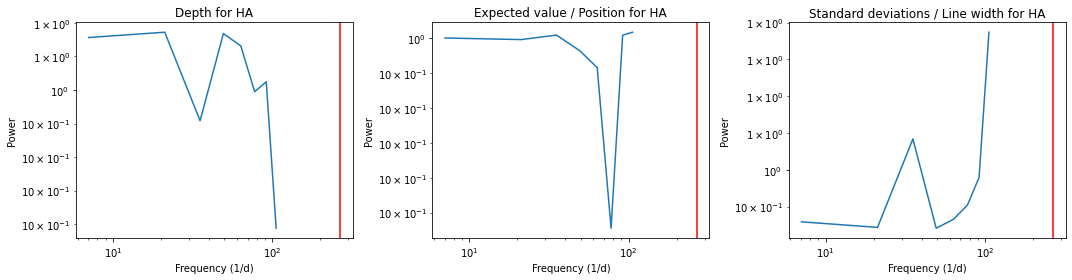

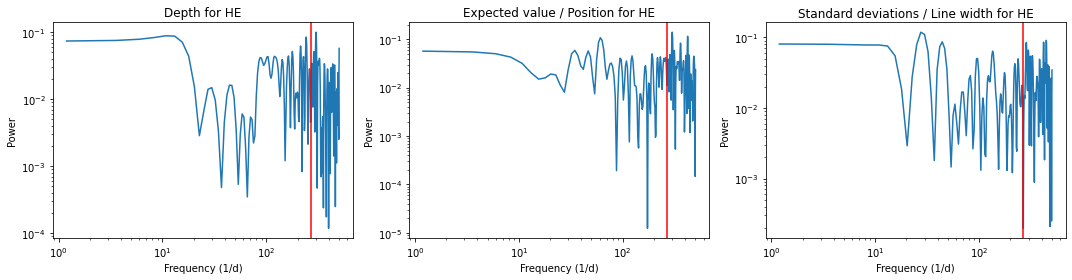

In [22]:
oscillation_freq = 24*60/5.4 #in 1/days!!

#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[15, 4])

    LS_depth_HA = LombScargle(date_HA, theta_HA[:, 1]).autopower(nyquist_factor=1)
    LS_position_HA = LombScargle(date_HA, theta_HA[:, 2]).autopower(nyquist_factor=1)
    LS_width_HA = LombScargle(date_HA, theta_HA[:, 3]).autopower(nyquist_factor=1)

    ax1.loglog(LS_depth_HA[0], LS_depth_HA[1])
    ax2.loglog(LS_position_HA[0], LS_position_HA[1])
    ax3.loglog(LS_width_HA[0], LS_width_HA[1])
    ax1.set_xlabel('Frequency (1/d)')
    ax2.set_xlabel('Frequency (1/d)')
    ax3.set_xlabel('Frequency (1/d)')
    ax1.set_ylabel('Power')
    ax2.set_ylabel('Power')
    ax3.set_ylabel('Power')
    ax1.set_title('Depth for HA')
    ax2.set_title('Expected value / Position for HA')
    ax3.set_title('Standard deviations / Line width for HA')
    ax1.axvline(oscillation_freq, color='r')
    ax2.axvline(oscillation_freq, color='r')
    ax3.axvline(oscillation_freq, color='r')
    fig.tight_layout()
    plt.show()

    fig, (ax4, ax5, ax6) = plt.subplots (1, 3, figsize=[15, 4])

    LS_depth_HE = LombScargle(date_HE, theta_HE[:, 1]).autopower(nyquist_factor=1)
    LS_position_HE = LombScargle(date_HE, theta_HE[:, 2]).autopower(nyquist_factor=1)
    LS_width_HE = LombScargle(date_HE, theta_HE[:, 3]).autopower(nyquist_factor=1)

    ax4.loglog(LS_depth_HE[0], LS_depth_HE[1])
    ax5.loglog(LS_position_HE[0], LS_position_HE[1])
    ax6.loglog(LS_width_HE[0], LS_width_HE[1])
    ax4.set_xlabel('Frequency (1/d)')
    ax5.set_xlabel('Frequency (1/d)')
    ax6.set_xlabel('Frequency (1/d)')
    ax5.set_ylabel('Power')
    ax6.set_ylabel('Power')
    ax4.set_ylabel('Power')
    ax4.set_title('Depth for HE')
    ax5.set_title('Expected value / Position for HE')
    ax6.set_title('Standard deviations / Line width for HE')
    ax4.axvline(oscillation_freq, color='r')
    ax5.axvline(oscillation_freq, color='r')
    ax6.axvline(oscillation_freq, color='r')
    fig.tight_layout()
    plt.show()
    
#If there is one mode of observation.    
else:
    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[15, 4])

    LS_depth = LombScargle(date, theta[:, 1]).autopower(nyquist_factor=1)
    LS_position = LombScargle(date, theta[:, 2]).autopower(nyquist_factor=1)
    LS_width = LombScargle(date, theta[:, 3]).autopower(nyquist_factor=1)

    ax1.loglog(LS_depth[0], LS_depth[1])
    ax2.loglog(LS_position[0], LS_position[1])
    ax3.loglog(LS_width[0], LS_width[1])
    ax1.set_xlabel('Frequency (1/d)')
    ax2.set_xlabel('Frequency (1/d)')
    ax3.set_xlabel('Frequency (1/d)')
    ax1.set_ylabel('Power')
    ax2.set_ylabel('Power')
    ax3.set_ylabel('Power')
    ax1.set_title('Depth for HA')
    ax2.set_title('Expected value / Position for HA')
    ax3.set_title('Standard deviations / Line width for HA')
    ax1.axvline(oscillation_freq, color='r')
    ax2.axvline(oscillation_freq, color='r')
    ax3.axvline(oscillation_freq, color='r')
    fig.tight_layout()
    plt.show()
 

## Plotting the timeseries and periodogram of the Radial Velocity

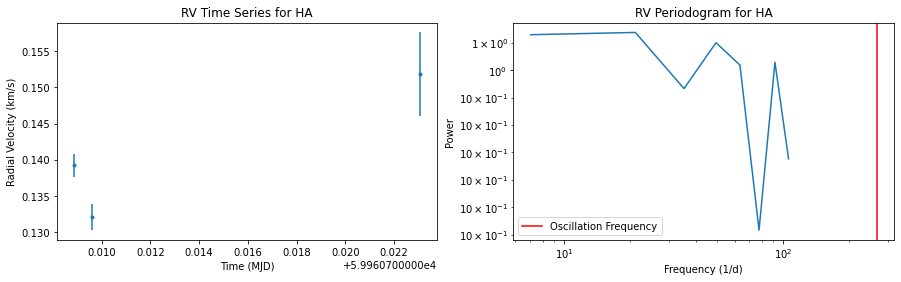

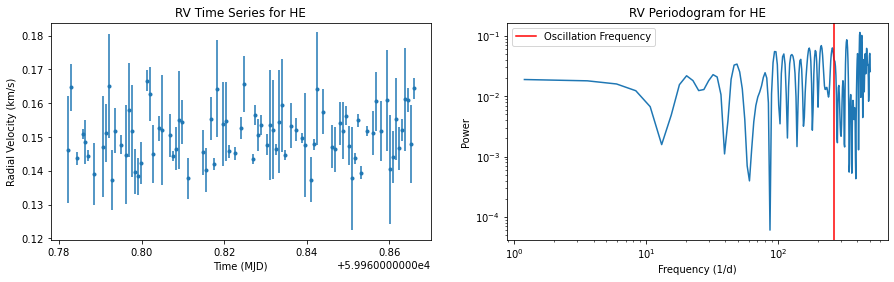

In [23]:
reload(AF)
#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    AF.plot_TS_Periodo(date_HA, total_RV_HA, total_RV_err_HA, 'Radial Velocity (km/s)', 'RV ', ' for HA', error=True)
    
    AF.plot_TS_Periodo(date_HE, total_RV_HE, total_RV_err_HE, 'Radial Velocity (km/s)', 'RV ', ' for HE', error=True)
#If there is one mode of observation.
else:
    AF.plot_TS_Periodo(date, total_RV, total_RV_err, 'Radial Velocity (km/s)', 'RV ', '', error=True)

## Plotting the timeseries and periodogram of the FWHM

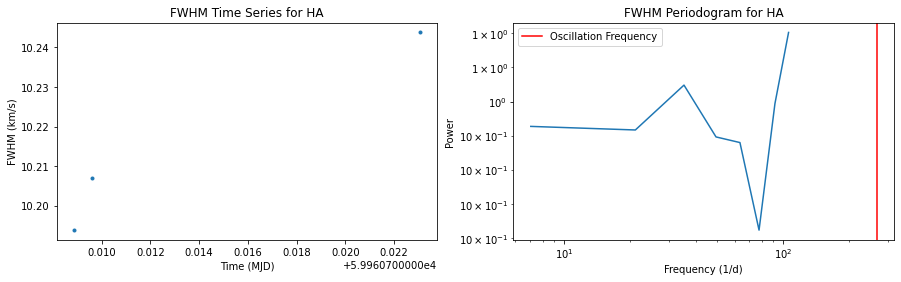

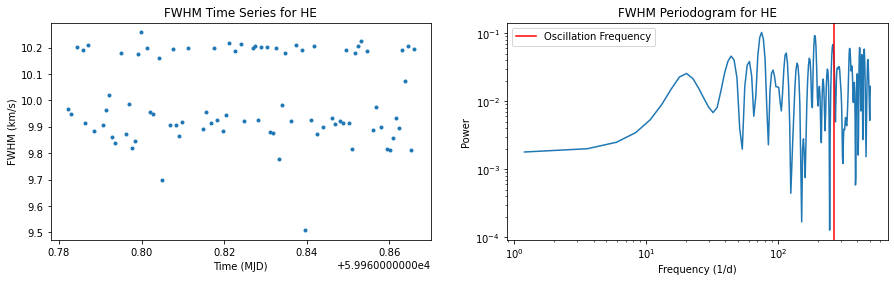

In [24]:
reload(AF)
#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    AF.plot_TS_Periodo(date_HA, total_FWHM_HA, [],'FWHM (km/s)', 'FWHM ', ' for HA')
    
    AF.plot_TS_Periodo(date_HE, total_FWHM_HE, [],'FWHM (km/s)', 'FWHM ', ' for HE')
#If there is one mode of observation.
else:
    AF.plot_TS_Periodo(date, total_FWHM, [], 'FWHM (km/s)', 'FWHM ', '')

## Plotting the timeseries and periodogram of the Bisector Span

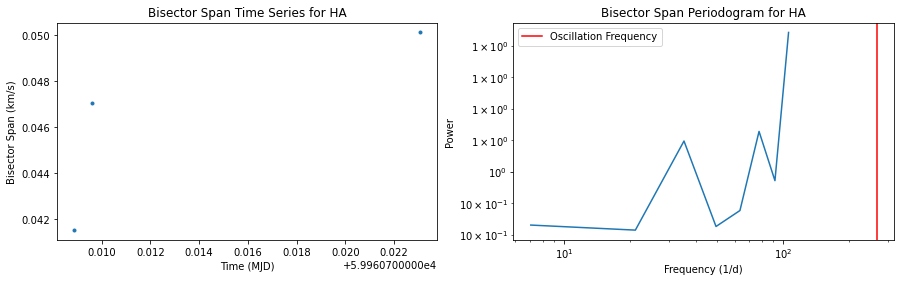

/var/folders/zb/dzv8y8kn1dl5qhcybvz_4nv00000gn/T/ipykernel_63479/2942607254.py:7: RankWarning: Polyfit may be poorly conditioned
  AF.plot_TS_Periodo(date_HE, total_BIS_SPAN_HE, [], 'Bisector Span (km/s)', 'Bisector Span ', ' for HE', fit=True, order=3)


            3         2
-2.677e-05 x + 1.605 x + 9.625e+04 x - 5.771e+09


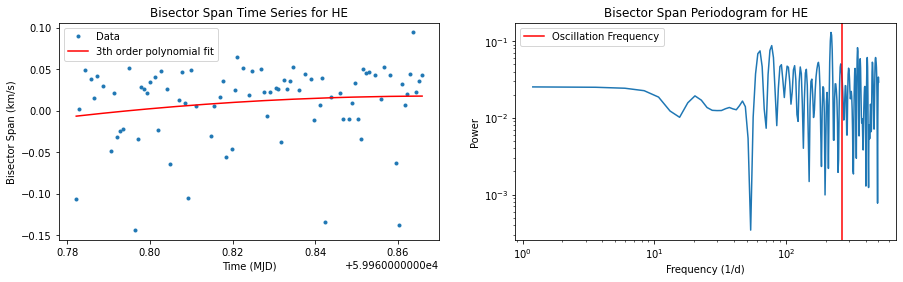

In [25]:
reload(AF)
#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    AF.plot_TS_Periodo(date_HA, total_BIS_SPAN_HA, [], 'Bisector Span (km/s)', 'Bisector Span ', ' for HA')
    
    AF.plot_TS_Periodo(date_HE, total_BIS_SPAN_HE, [], 'Bisector Span (km/s)', 'Bisector Span ', ' for HE', fit=True, order=3)
#If there is one mode of observation.
else:
    AF.plot_TS_Periodo(date, total_BIS_SPAN, [], 'Bisector Span (km/s)', 'Bisector Span ', '')

## Plotting the timeseries and periodogram of H2O IWV

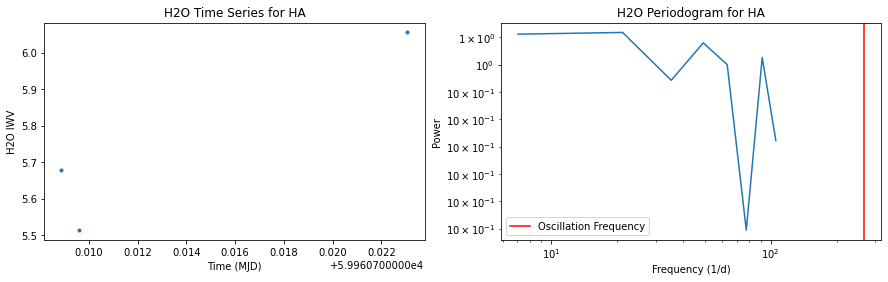

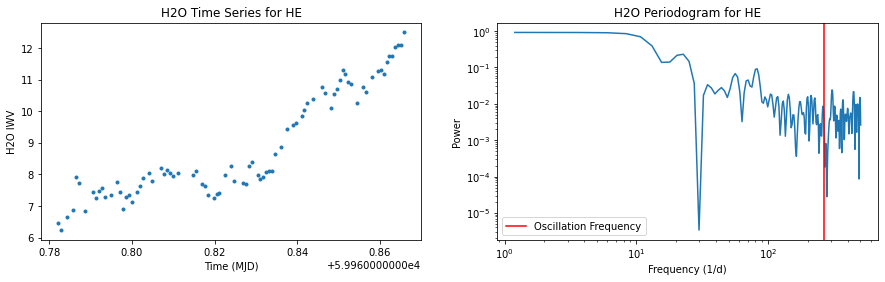

In [26]:
#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    AF.plot_TS_Periodo(date_HA, total_H2O_HA, [], 'H2O IWV', 'H2O ', ' for HA')
    
    AF.plot_TS_Periodo(date_HE, total_H2O_HE, [], 'H2O IWV', 'H2O ', ' for HE')
#If there is one mode of observation.
else:
    AF.plot_TS_Periodo(date, total_H2O, [], 'Bisector Span (km/s)', 'H2O ', '')

## Plotting the timeseries and periodogram of O2 IWV

/var/folders/zb/dzv8y8kn1dl5qhcybvz_4nv00000gn/T/ipykernel_63479/1495668932.py:4: RankWarning: Polyfit may be poorly conditioned
  AF.plot_TS_Periodo(date_HA, total_O2_HA, [], 'O2 IWV', 'O2 ', ' for HA', fit=True, order=4)


         4        3             2
0.07719 x - 2455 x - 2.626e+08 x - 8.6e+12 x + 9.911e+17


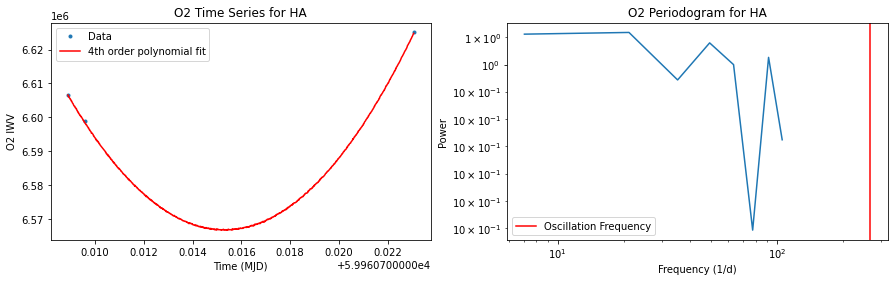

/var/folders/zb/dzv8y8kn1dl5qhcybvz_4nv00000gn/T/ipykernel_63479/1495668932.py:6: RankWarning: Polyfit may be poorly conditioned
  AF.plot_TS_Periodo(date_HE, total_O2_HE, [], 'O2 IWV', 'O2 ', ' for HE', fit=True, order=4)


         4         3             2
0.02603 x - 780.3 x - 9.357e+07 x - 2.805e+12 x + 3.364e+17


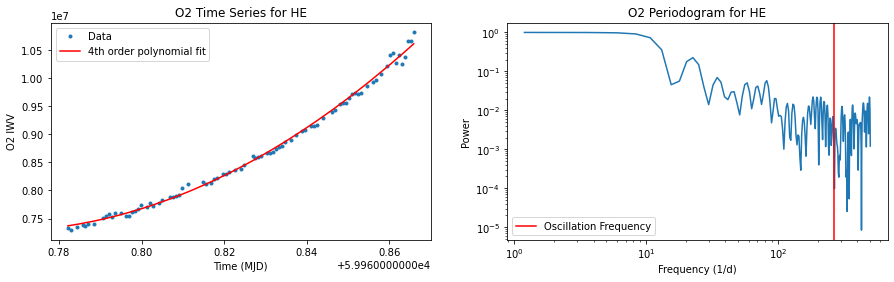

In [28]:
#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    AF.plot_TS_Periodo(date_HA, total_O2_HA, [], 'O2 IWV', 'O2 ', ' for HA', fit=True, order=4)
    
    AF.plot_TS_Periodo(date_HE, total_O2_HE, [], 'O2 IWV', 'O2 ', ' for HE', fit=True, order=4)
#If there is one mode of observation.
else:
    AF.plot_TS_Periodo(date, total_O2, [], 'O2 IWV', 'O2 ', '')

## Plotting the timeseries and periodogram of CO2 IWV

/var/folders/zb/dzv8y8kn1dl5qhcybvz_4nv00000gn/T/ipykernel_63479/1313682891.py:5: RankWarning: Polyfit may be poorly conditioned
  AF.plot_TS_Periodo(date_HA, total_CO2_HA, [], 'CO2 IWV', 'CO2 ', ' for HA', fit=True, order=4)


        4            3             2
0.7675 x - 2.44e+04 x - 2.611e+09 x - 8.55e+13 x + 9.853e+18


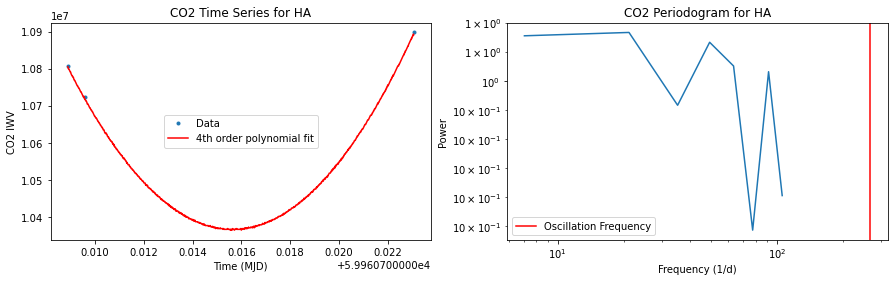

/var/folders/zb/dzv8y8kn1dl5qhcybvz_4nv00000gn/T/ipykernel_63479/1313682891.py:7: RankWarning: Polyfit may be poorly conditioned
  AF.plot_TS_Periodo(date_HE, total_CO2_HE, [], 'CO2 IWV', 'CO2 ', ' for HE', fit=True, order=4)


         4        3             2
0.05914 x - 1773 x - 2.126e+08 x - 6.375e+12 x + 7.645e+17


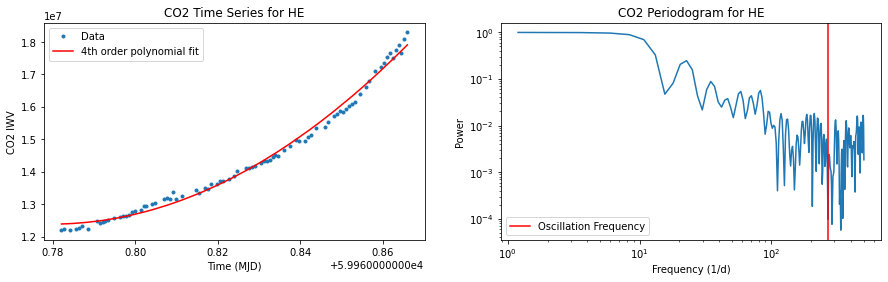

In [29]:
reload(AF)
#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    AF.plot_TS_Periodo(date_HA, total_CO2_HA, [], 'CO2 IWV', 'CO2 ', ' for HA', fit=True, order=4)
    
    AF.plot_TS_Periodo(date_HE, total_CO2_HE, [], 'CO2 IWV', 'CO2 ', ' for HE', fit=True, order=4)
#If there is one mode of observation.
else:
    AF.plot_TS_Periodo(date, total_CO2, [], 'Bisector Span (km/s)', 'CO2 ', '')

## Fitting a Voigt profile to the Si line

[1.01998601e+00 4.89469018e-01 1.08300772e+04 1.23713852e-04
 2.50138636e-01]


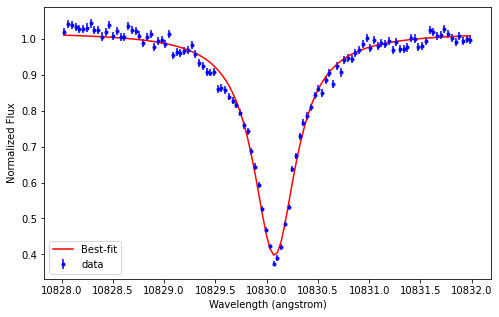

[1.00707063e+00 4.86906506e-01 1.08300788e+04 3.83106013e-06
 2.51077800e-01]


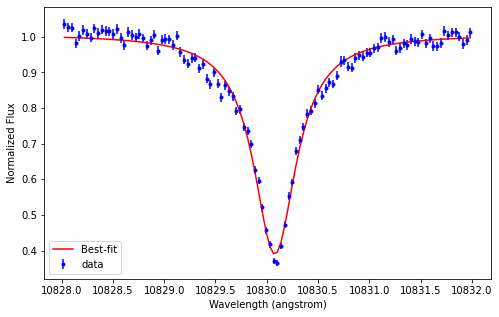

[1.01007095e+00 4.85019138e-01 1.08300767e+04 6.63202371e-05
 2.50762180e-01]


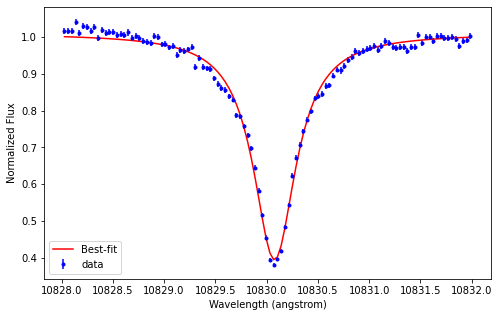

[1.01036349e+00 4.97161005e-01 1.08300784e+04 8.59049028e-05
 2.64228825e-01]


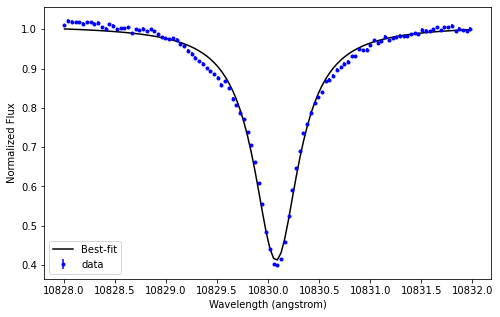

[1.00979947e+00 4.97511427e-01 1.08300753e+04 5.53998408e-05
 2.64527445e-01]


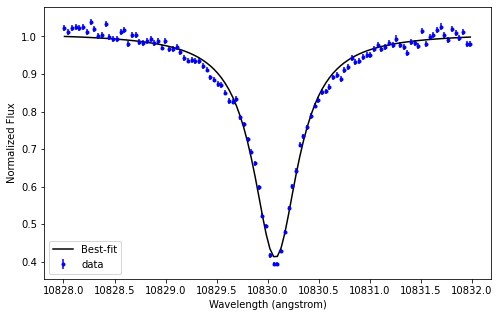

[1.01513847e+00 5.03943778e-01 1.08300790e+04 8.68485968e-06
 2.63610585e-01]


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


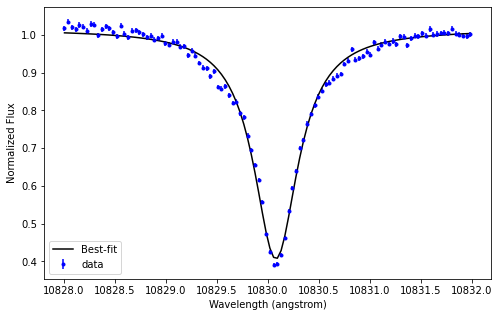

[1.01397787e+00 4.94319311e-01 1.08300797e+04 3.67148944e-05
 2.58385475e-01]


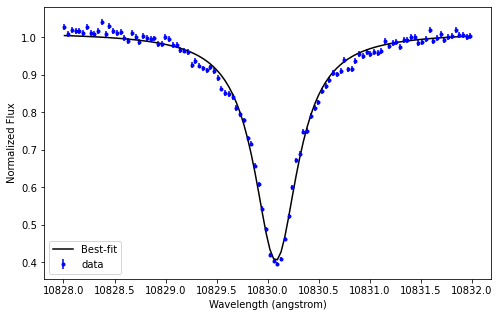

[1.01125498e+00 4.99246357e-01 1.08300788e+04 6.49705338e-04
 2.65735570e-01]


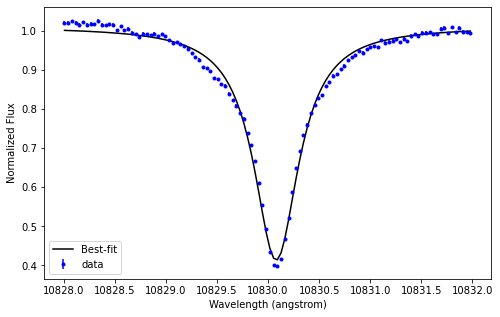

[1.01725506e+00 5.08519423e-01 1.08300785e+04 7.61811555e-04
 2.69065383e-01]


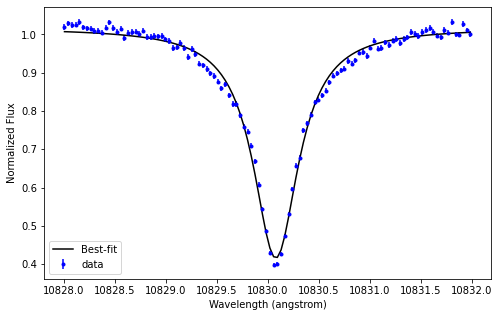

[1.01628559e+00 5.05158989e-01 1.08300799e+04 2.38022966e-04
 2.66323202e-01]


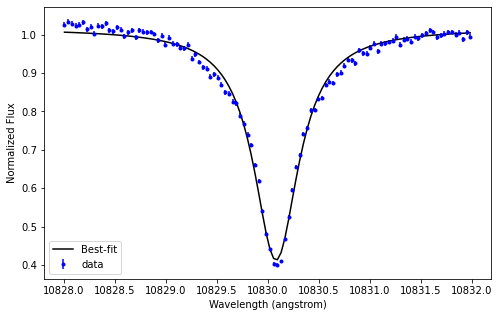

[1.00969198e+00 4.95734909e-01 1.08300762e+04 1.46233298e-05
 2.64130658e-01]


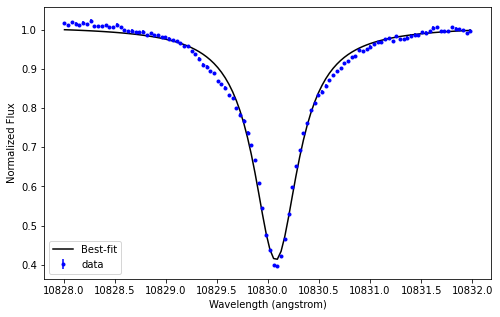

[1.01316813e+00 5.01490509e-01 1.08300781e+04 7.10490919e-04
 2.63808177e-01]


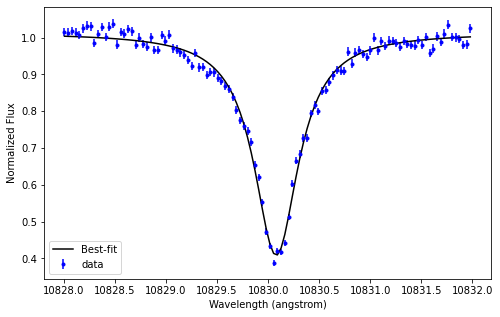

[1.01372149e+00 5.00263417e-01 1.08300786e+04 4.01423443e-05
 2.64053774e-01]


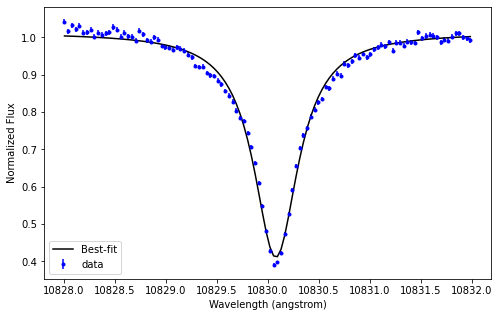

[1.01428548e+00 4.98789332e-01 1.08300764e+04 6.50937944e-04
 2.64338996e-01]


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


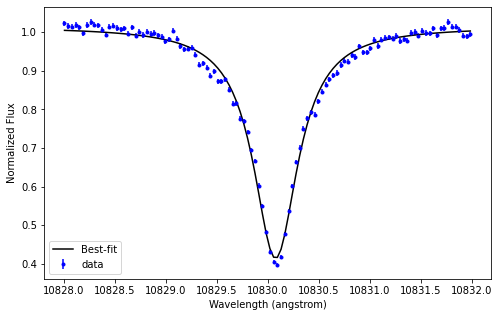

[1.01316348e+00 4.98097488e-01 1.08300785e+04 1.14436852e-04
 2.64951504e-01]


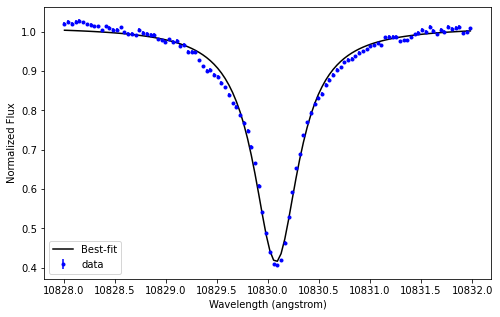

[1.00946799e+00 4.95545232e-01 1.08300770e+04 1.55417025e-04
 2.62624031e-01]


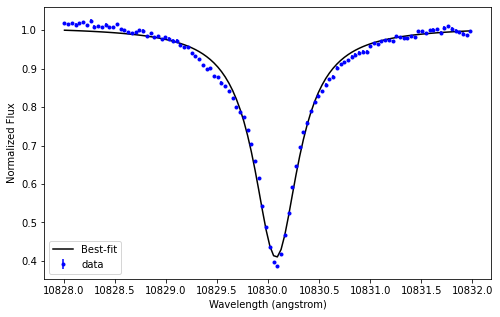

[1.01089440e+00 4.94641532e-01 1.08300765e+04 2.02105844e-04
 2.61739916e-01]


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


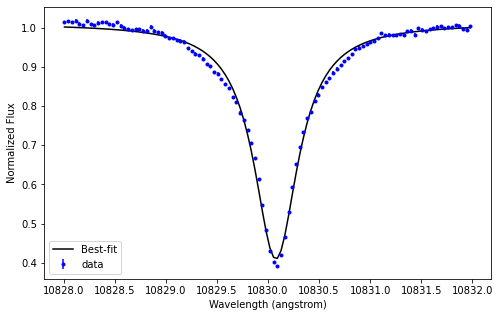

[1.00985007e+00 5.00390089e-01 1.08300782e+04 4.90114632e-04
 2.65803289e-01]


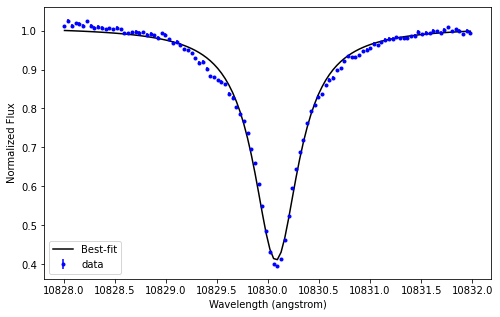

[1.02053830e+00 5.10366466e-01 1.08300818e+04 3.95838363e-05
 2.64574872e-01]


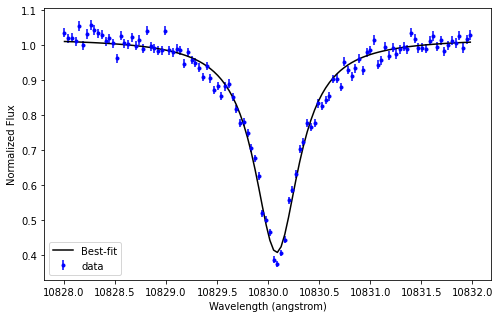

[1.01659389e+00 5.05926412e-01 1.08300782e+04 2.40196452e-04
 2.67027526e-01]


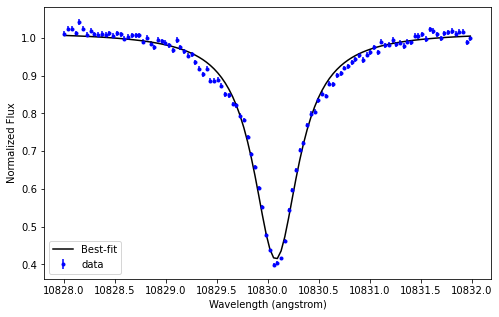

[1.01255967e+00 4.86561294e-01 1.08300780e+04 5.47990990e-04
 2.53812864e-01]


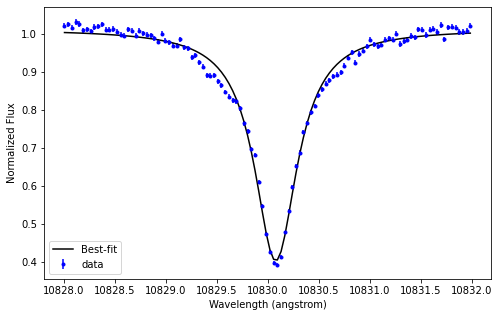

[1.01232482e+00 5.03045955e-01 1.08300777e+04 3.04238288e-04
 2.67058787e-01]


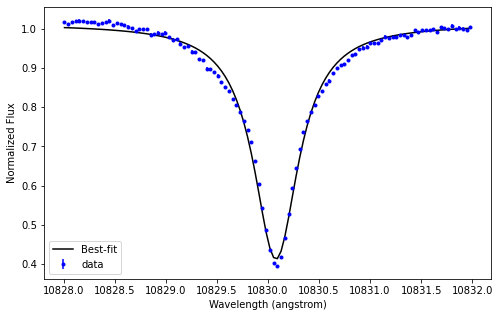

[1.02152988e+00 5.14714323e-01 1.08300798e+04 1.04650034e-03
 2.78688295e-01]


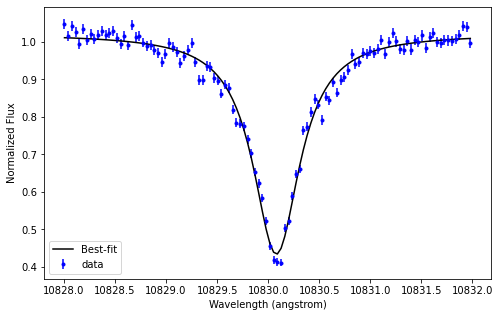

[1.00940788e+00 4.90633850e-01 1.08300772e+04 5.17408089e-05
 2.61301264e-01]


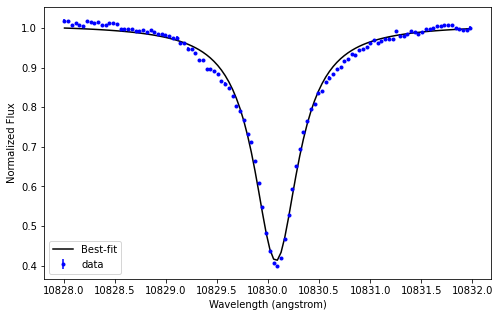

[1.01531811e+00 5.02194518e-01 1.08300764e+04 8.19641576e-06
 2.66139791e-01]


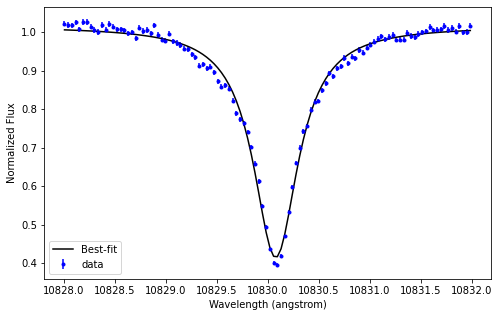

[1.01308322e+00 4.93979856e-01 1.08300784e+04 6.79770147e-04
 2.58309553e-01]


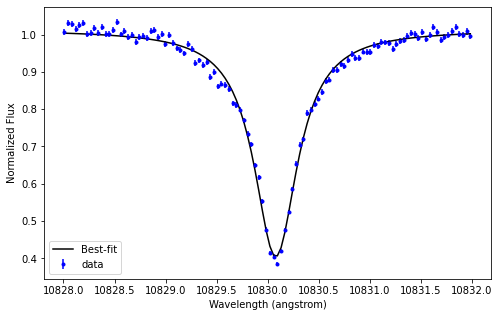

[1.01159428e+00 5.04599482e-01 1.08300786e+04 4.86977692e-04
 2.66912314e-01]


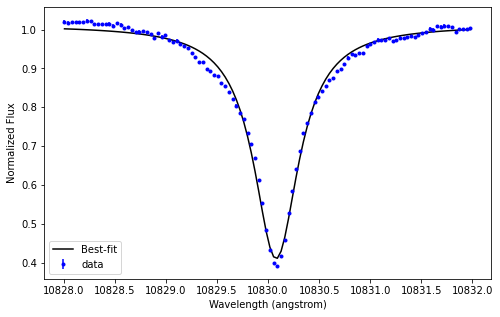

[1.01350595e+00 4.96447975e-01 1.08300823e+04 5.16211068e-04
 2.63423517e-01]


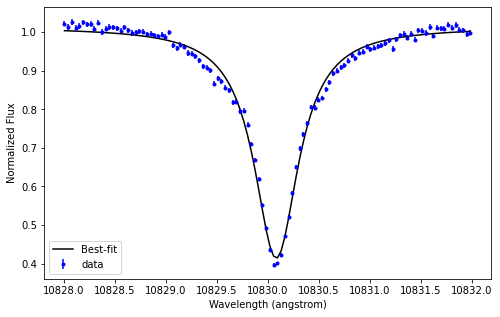

[ 1.01854000e+00 -5.09523890e-01  1.08300735e+04 -1.08206376e-03
 -2.71193616e-01]


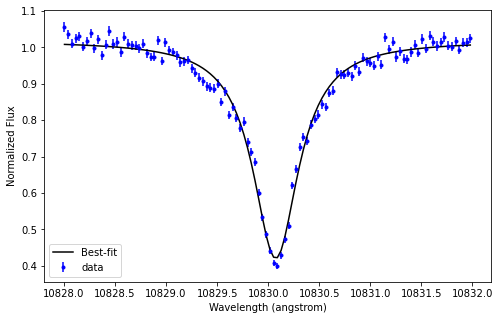

[1.01555152e+00 4.99922235e-01 1.08300828e+04 7.82927851e-05
 2.64047948e-01]


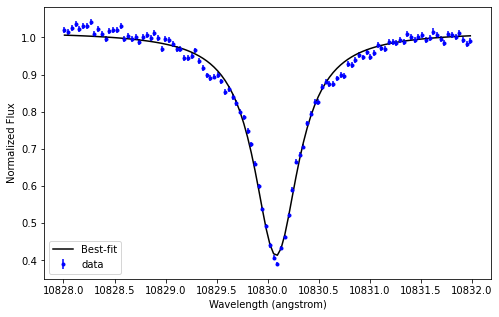

[1.00872329e+00 4.94295745e-01 1.08300781e+04 1.30490084e-04
 2.62261295e-01]


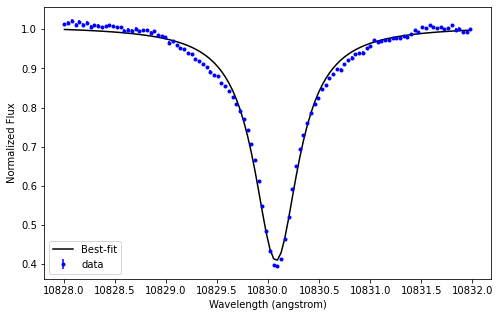

[1.01860529e+00 5.03408048e-01 1.08300793e+04 5.05318681e-04
 2.65732712e-01]


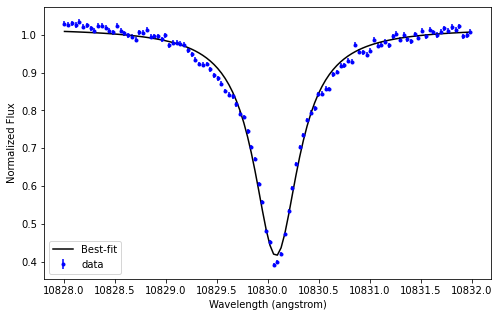

[1.01259458e+00 4.90635630e-01 1.08300740e+04 7.75167281e-04
 2.59897209e-01]


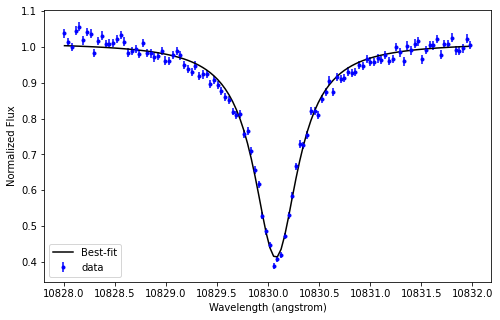

[1.00928455e+00 4.93339698e-01 1.08300787e+04 6.33470908e-04
 2.61208747e-01]


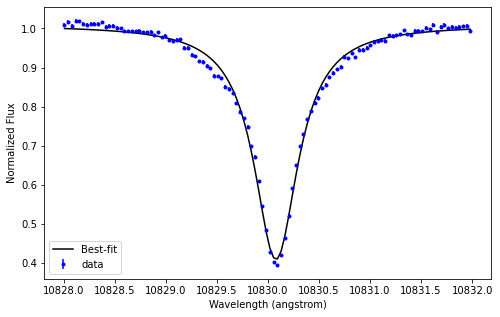

[1.00967907e+00 4.92598117e-01 1.08300788e+04 2.88900262e-04
 2.61637788e-01]


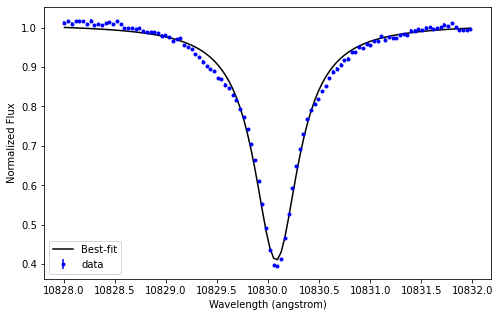

[1.00866072e+00 4.93510835e-01 1.08300770e+04 1.46432985e-04
 2.62612501e-01]


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


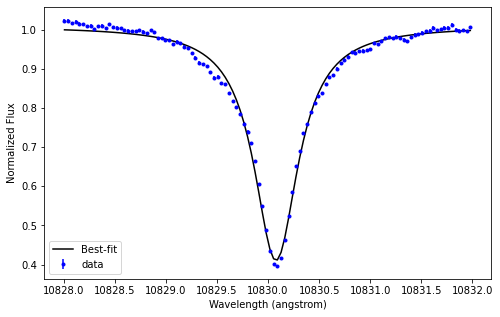

[ 9.59560012e-01  2.61934962e-01  1.08300716e+04 -3.59047013e-02
  1.11103722e-01]


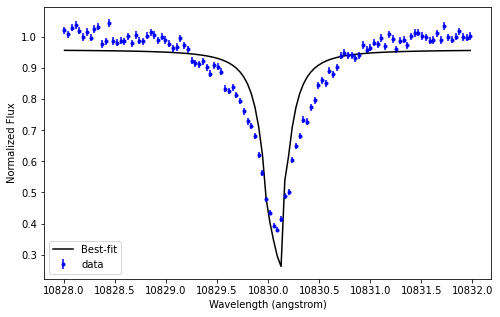

[1.00969430e+00 4.93655293e-01 1.08300785e+04 1.11321710e-04
 2.62328644e-01]


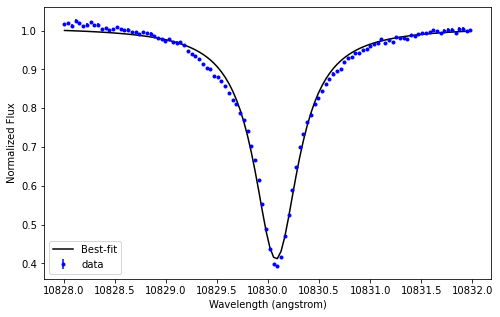

[1.00887455e+00 4.91871871e-01 1.08300788e+04 4.64269848e-04
 2.61864373e-01]


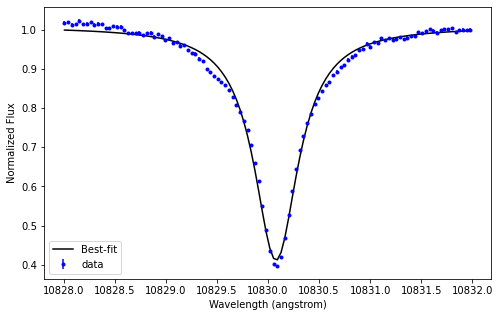

[1.00919716e+00 5.01507014e-01 1.08300739e+04 2.01466664e-05
 2.65635905e-01]


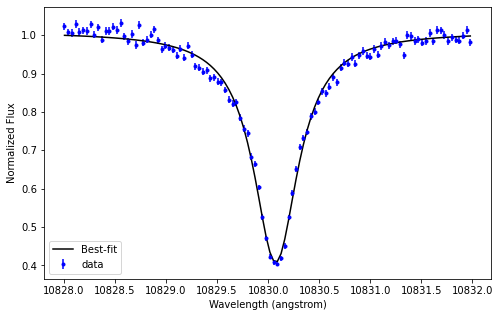

[1.01548343e+00 5.02180170e-01 1.08300788e+04 1.83096332e-06
 2.63867070e-01]


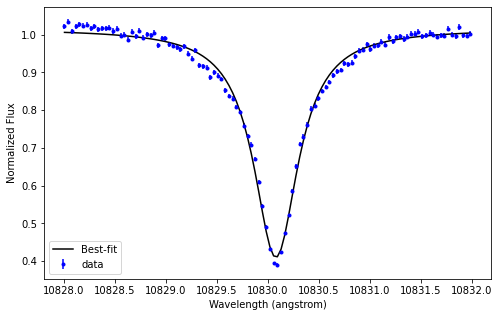

[1.01060619e+00 4.98597041e-01 1.08300762e+04 1.43703667e-04
 2.63797419e-01]


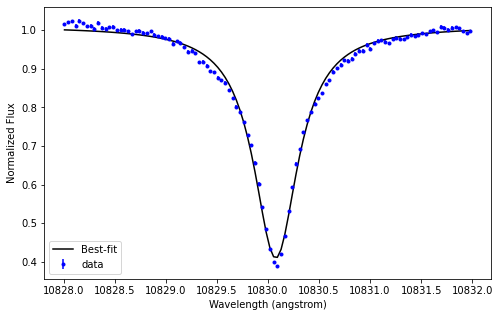

[1.01438479e+00 5.03286320e-01 1.08300774e+04 5.04770948e-04
 2.68586839e-01]


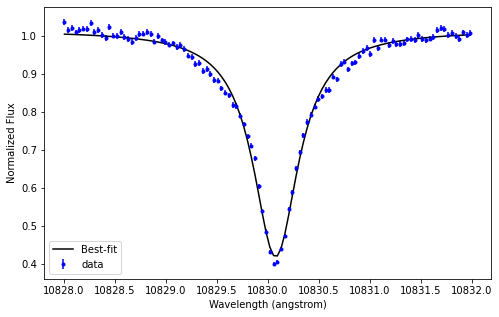

[1.01593236e+00 5.01211791e-01 1.08300761e+04 1.15923153e-04
 2.63769155e-01]


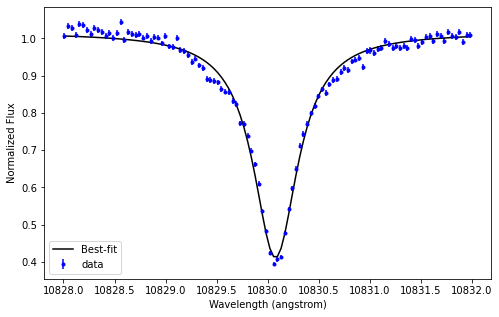

[1.01317598e+00 4.98364716e-01 1.08300769e+04 2.15128456e-04
 2.62476412e-01]


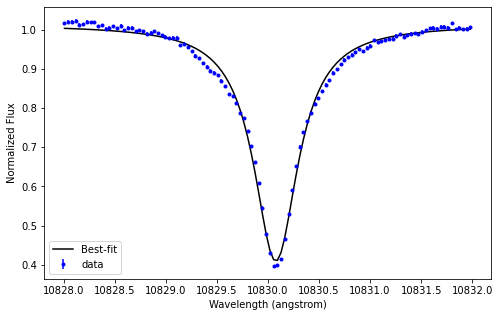

[1.01295289e+00 5.03371446e-01 1.08300740e+04 1.26156838e-04
 2.66668797e-01]


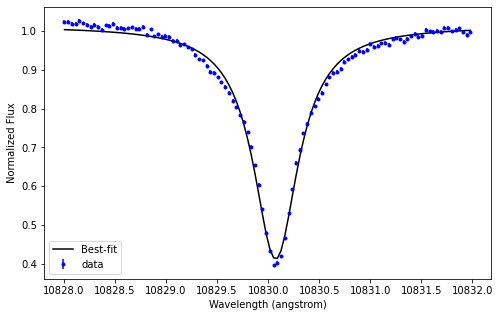

[1.00917882e+00 4.94933739e-01 1.08300783e+04 6.82655029e-04
 2.62354288e-01]


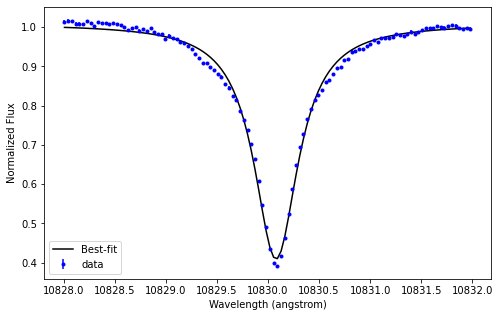

[1.00907665e+00 4.87936683e-01 1.08300777e+04 4.62394822e-04
 2.58269197e-01]


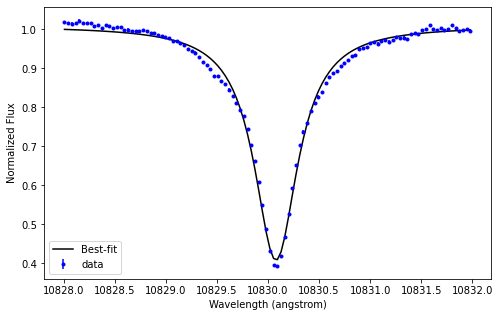

[1.01205118e+00 4.98929298e-01 1.08300785e+04 2.74546883e-04
 2.64120431e-01]


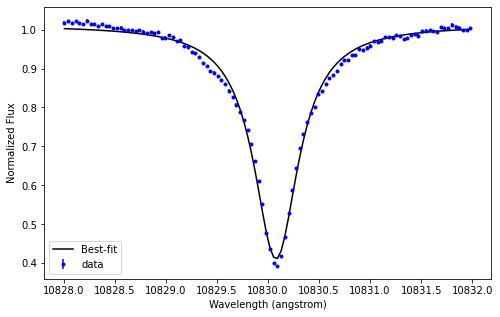

[1.01198362e+00 5.00862730e-01 1.08300771e+04 8.62539720e-06
 2.64148220e-01]


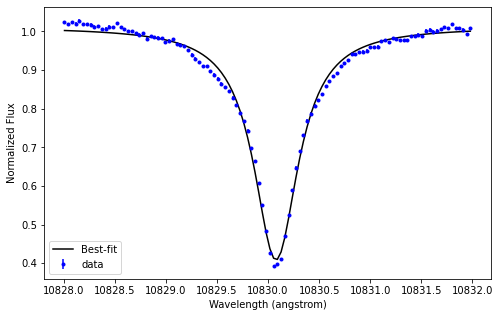

[1.01265574e+00 5.01798920e-01 1.08300736e+04 1.02157549e-03
 2.63635387e-01]


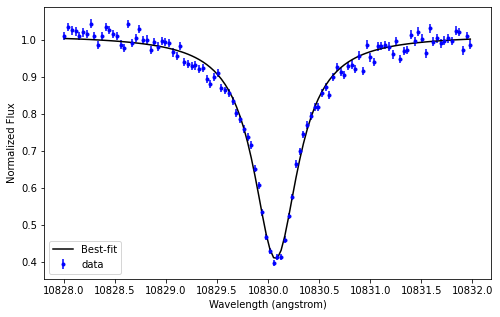

[1.00902310e+00 4.94445106e-01 1.08300779e+04 6.62906307e-05
 2.62974461e-01]


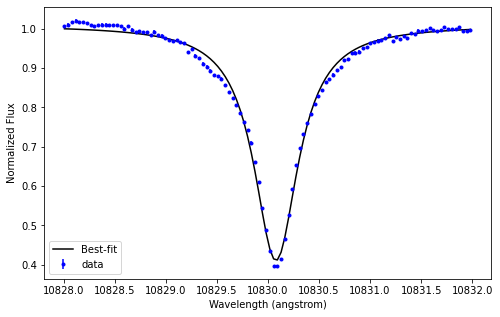

[1.01374584e+00 4.94510883e-01 1.08300785e+04 4.00716493e-05
 2.59393574e-01]


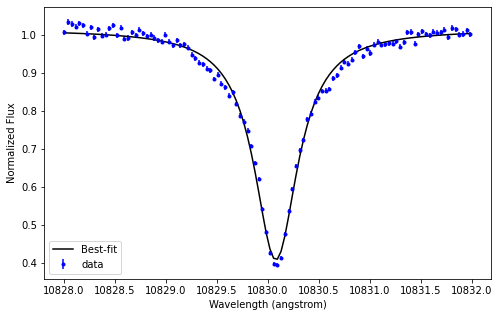

[1.01325911e+00 4.98134774e-01 1.08300795e+04 4.63252227e-04
 2.64160910e-01]


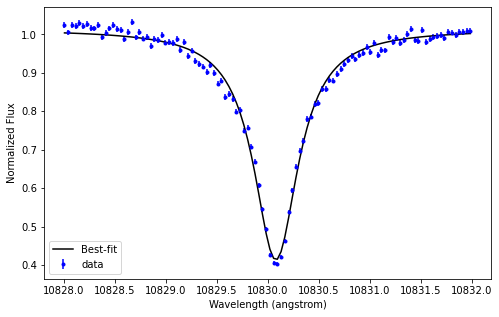

[1.01016261e+00 4.97224603e-01 1.08300765e+04 1.52810774e-04
 2.62706558e-01]


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


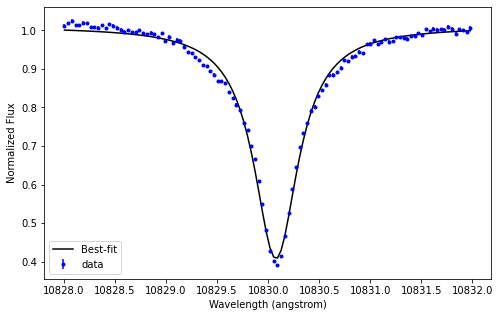

[1.01126473e+00 4.97011433e-01 1.08300785e+04 3.90621761e-04
 2.62922176e-01]


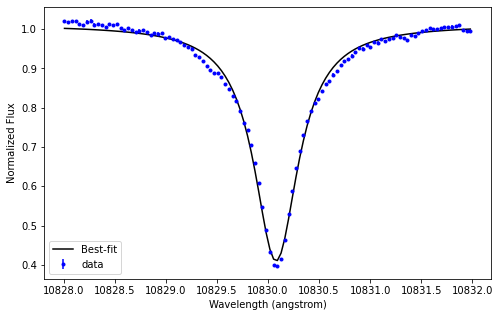

[1.01547434e+00 5.09590587e-01 1.08300766e+04 4.41155203e-04
 2.66774909e-01]


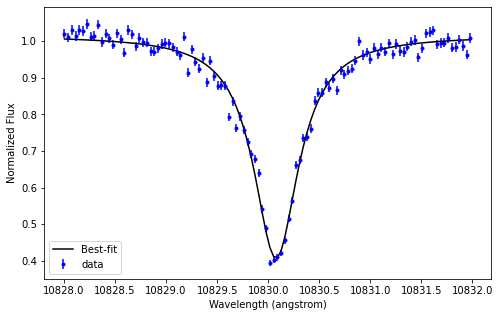

[1.01024346e+00 4.93037913e-01 1.08300768e+04 6.16833541e-04
 2.60820317e-01]


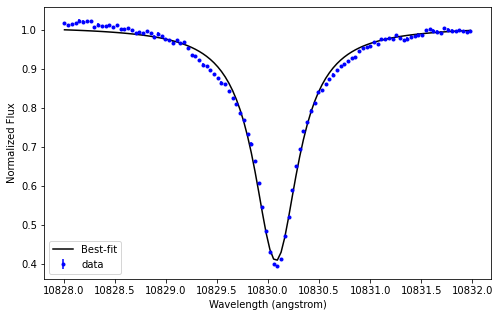

[1.01027366e+00 4.98225387e-01 1.08300776e+04 1.51896160e-04
 2.64672243e-01]


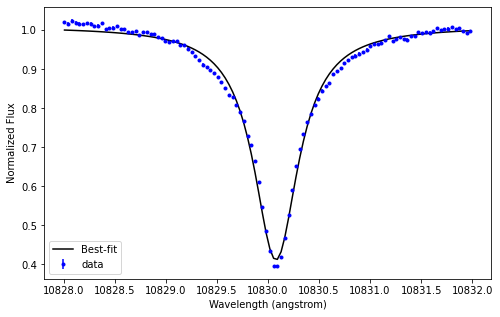

[1.01466559e+00 5.01612542e-01 1.08300812e+04 2.54312007e-04
 2.63721891e-01]


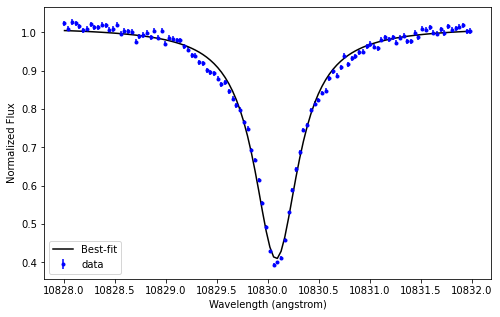

[1.01407933e+00 5.00195253e-01 1.08300768e+04 2.09741840e-04
 2.63886976e-01]


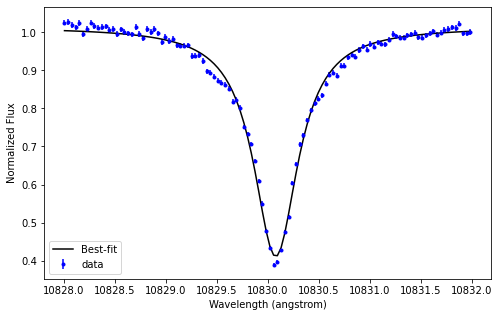

[1.01020827e+00 4.95905948e-01 1.08300652e+04 1.37028886e-04
 2.61282352e-01]


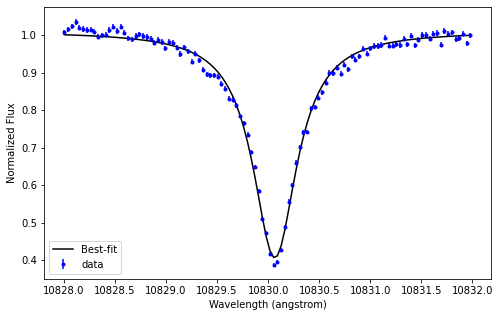

[1.01564290e+00 5.05354101e-01 1.08300801e+04 1.36392891e-05
 2.69257983e-01]


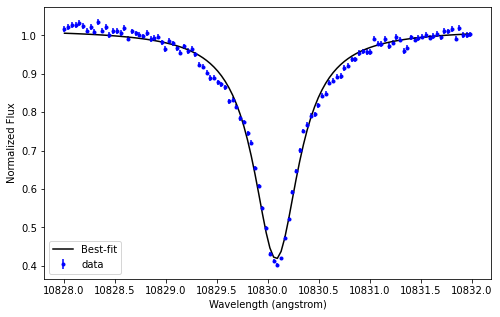

[1.00484298e+00 4.75199104e-01 1.08300744e+04 1.16638798e-04
 2.48355984e-01]


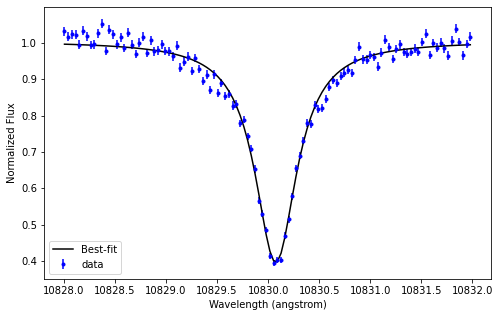

[1.01003988e+00 4.97513581e-01 1.08300773e+04 2.74462535e-04
 2.64173506e-01]


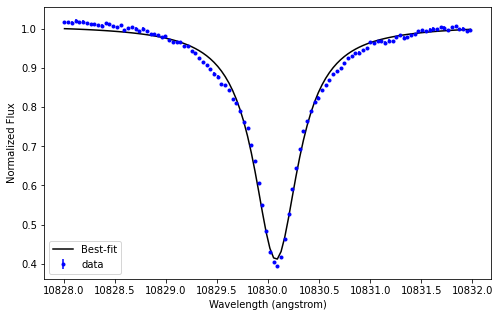

[1.01632125e+00 5.09243028e-01 1.08300763e+04 5.43489493e-04
 2.70389623e-01]


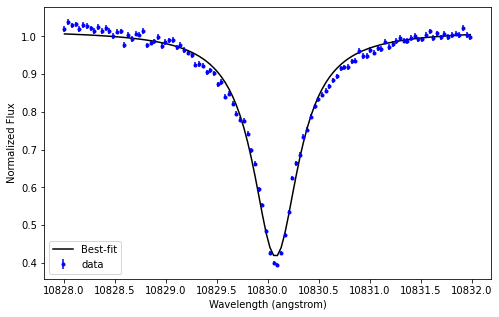

[1.01723870e+00 5.14262124e-01 1.08300742e+04 1.81775666e-03
 2.74129149e-01]


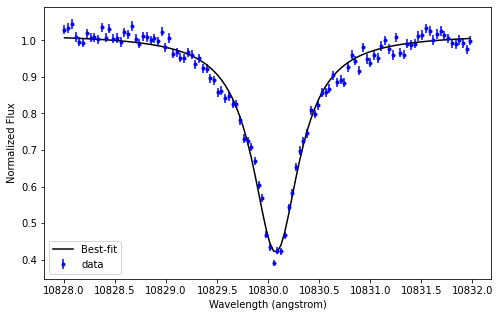

[7.30392607e-01 4.91615628e-02 1.08300872e+04 7.23510115e-04
 8.53600197e-03]


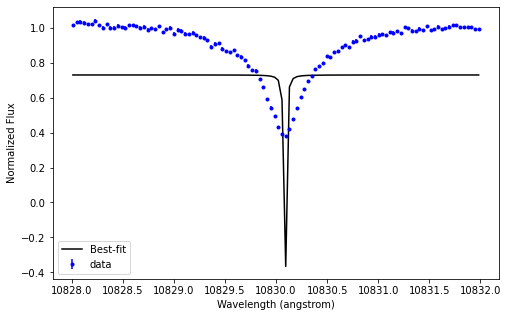

[1.00909255e+00 4.93853016e-01 1.08300789e+04 8.10580274e-04
 2.62005162e-01]


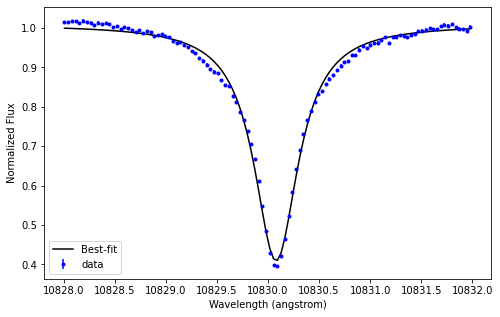

[1.00934311e+00 4.91469138e-01 1.08300767e+04 7.13739783e-04
 2.60845339e-01]


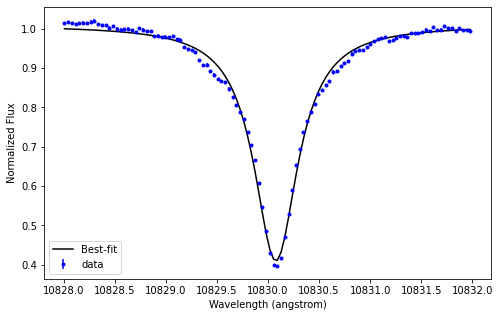

[ 9.15116759e-01  5.36723643e-22  1.08300773e+04 -5.60188741e-02
  5.40281083e-01]


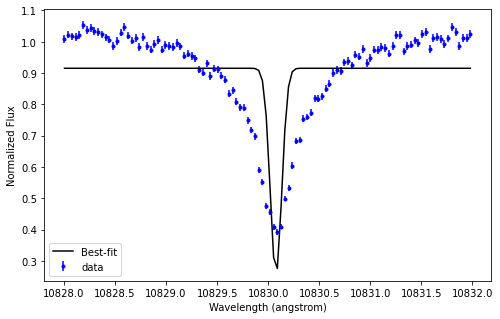

[1.01057533e+00 4.93448352e-01 1.08300780e+04 3.95749598e-05
 2.62711964e-01]


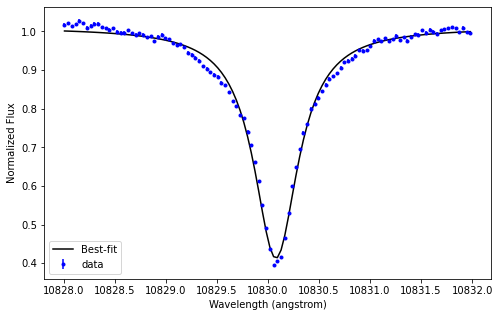

[1.00968446e+00 4.91901313e-01 1.08300775e+04 4.15132774e-04
 2.61639745e-01]


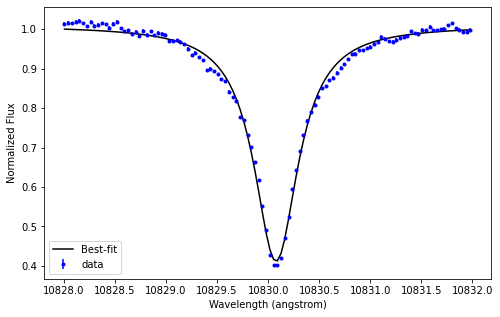

[1.01469672e+00 4.94079146e-01 1.08300797e+04 1.86348572e-04
 2.61159639e-01]


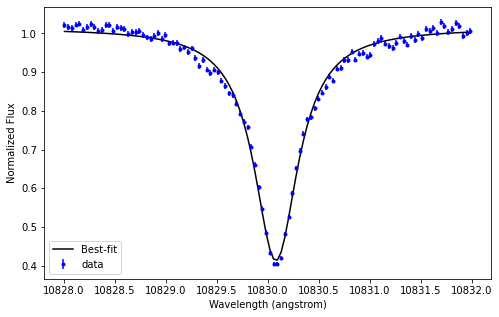

[1.01016122e+00 4.93074251e-01 1.08300776e+04 2.49021880e-04
 2.62352597e-01]


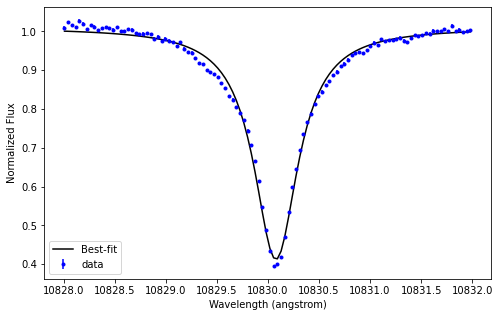

[1.01453391e+00 4.95198489e-01 1.08300803e+04 5.06600912e-05
 2.63462948e-01]


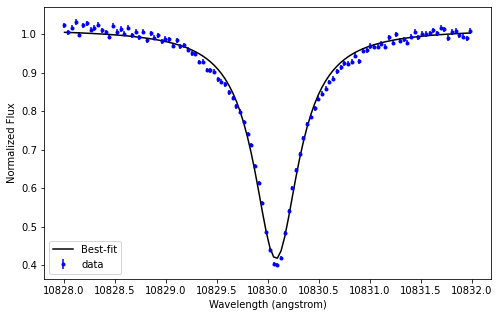

[1.01032135e+00 4.99676165e-01 1.08300766e+04 2.41575251e-04
 2.65510051e-01]


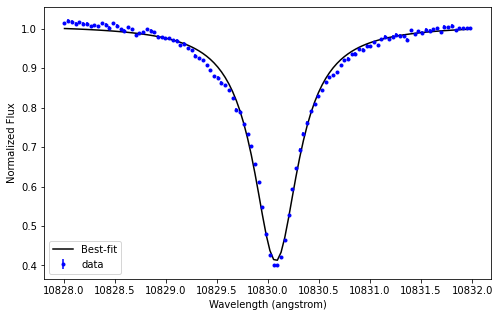

[1.02017335e+00 5.10098858e-01 1.08300785e+04 1.12917107e-04
 2.68178276e-01]


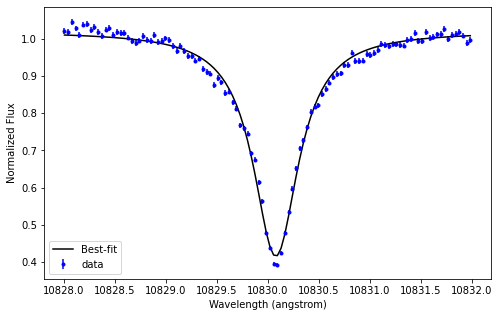

[1.00999992e+00 4.95295891e-01 1.08300788e+04 6.78934357e-06
 2.62680340e-01]


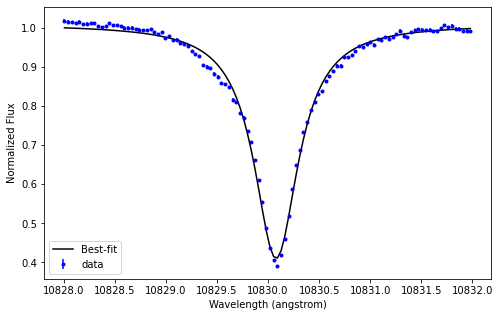

[1.01641850e+00 5.02360582e-01 1.08300748e+04 1.90677056e-04
 2.65976782e-01]


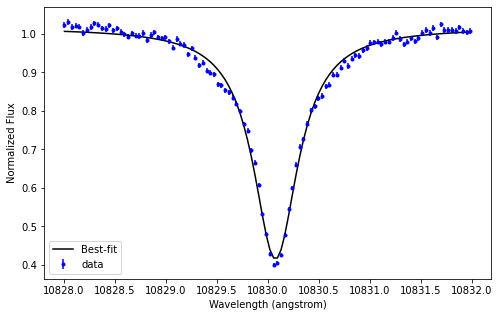

[1.01292578e+00 5.02646132e-01 1.08300787e+04 5.94552481e-04
 2.66009733e-01]


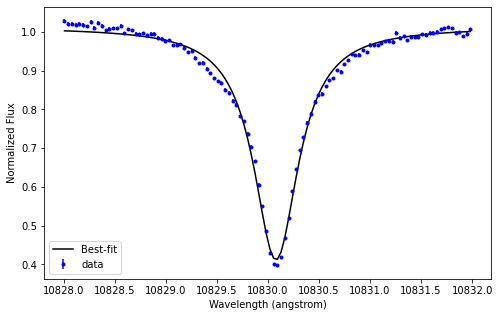

[1.00945336e+00 4.93744657e-01 1.08300769e+04 5.34377010e-05
 2.62655977e-01]


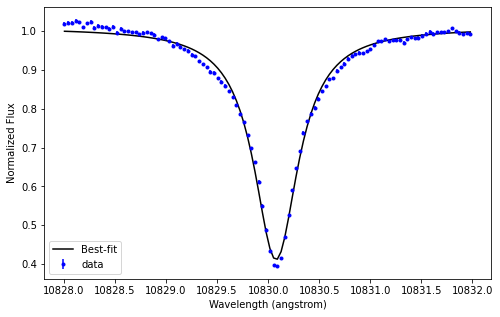

[1.01051422e+00 4.94147946e-01 1.08300781e+04 1.82966134e-04
 2.60903859e-01]


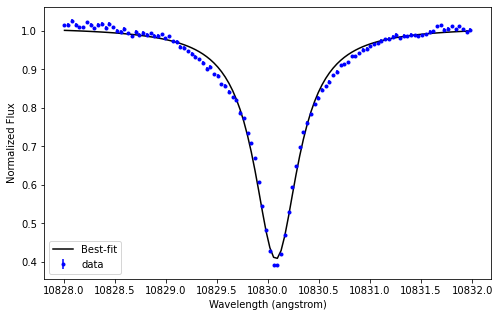

[1.00930422e+00 4.96287724e-01 1.08300776e+04 1.45827471e-04
 2.64652461e-01]


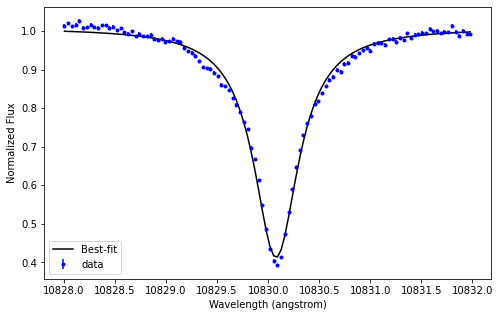

[1.01116926e+00 4.88138656e-01 1.08300780e+04 5.43368351e-05
 2.60709006e-01]


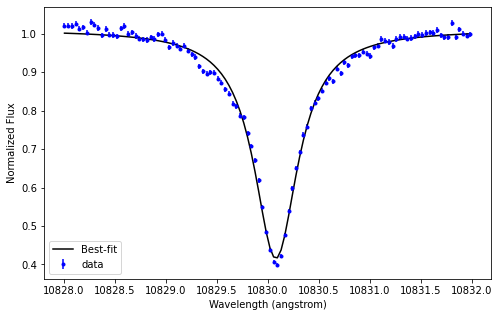

[1.01153865e+00 4.98783154e-01 1.08300781e+04 3.17192361e-04
 2.64392444e-01]


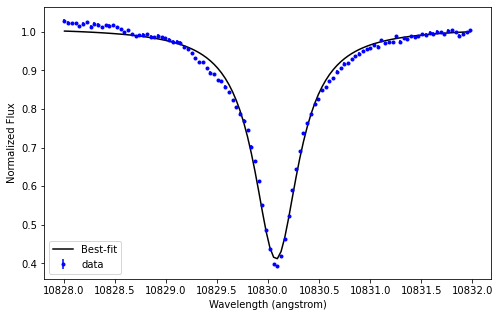

[1.01235809e+00 4.95393903e-01 1.08300807e+04 4.74003775e-04
 2.61729608e-01]


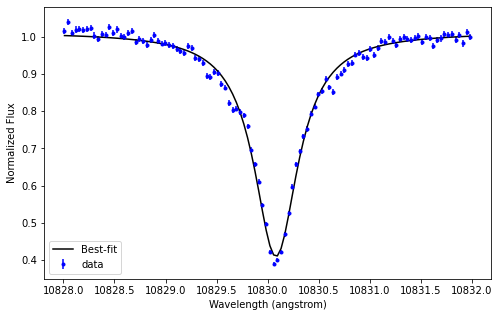

In [30]:
lower_l = 10828
upper_l = 10832

guess_para = [0.3, 1/8, 10830, 0.1, 0.2]
bound = ((-np.inf, -np.inf, -np.inf, -np.inf, -np.inf), (np.inf, np.inf, np.inf, np.inf, np.inf))

#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    theta_Si_HA, err_theta_Si_HA = AF.fit_spctr_line(AF.Voigt, AF.eval_Voigt, lower_l, upper_l, guess_para, bound, 
                  total_lamda_HA, total_norm_spctr_HA, total_norm_err_HA, 'r')
    
    theta_Si_HE, err_theta_Si_HE = AF.fit_spctr_line(AF.Voigt, AF.eval_Voigt, lower_l, upper_l, guess_para, bound, 
                  total_lamda_HE, total_norm_spctr_HE, total_norm_err_HE, 'k')

#If there is one mode of observation
else:
    
    theta_Si, err_theta_Si = AF.fit_spctr_line(AF.Voigt, AF.eval_Voigt, lower_l, upper_l, guess_para, bound, 
                  total_lamda, total_norm_spctr, total_norm_err, 'r')

## Plotting the positions, depths and widths of the fitted Gaussian lines for Si

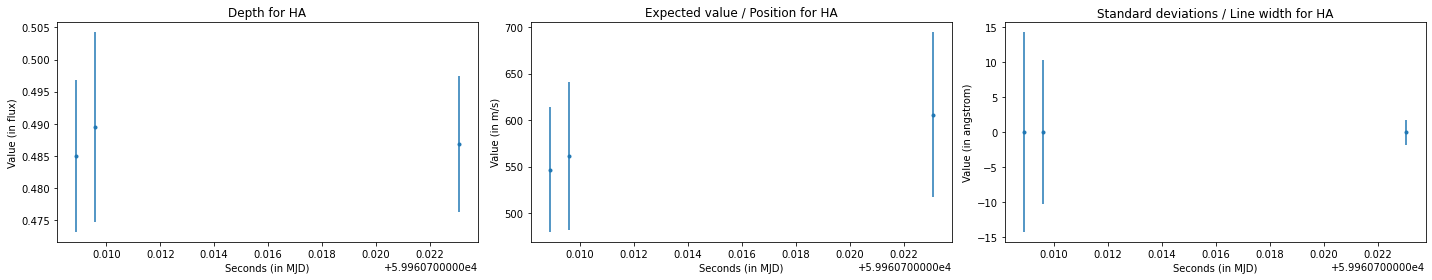

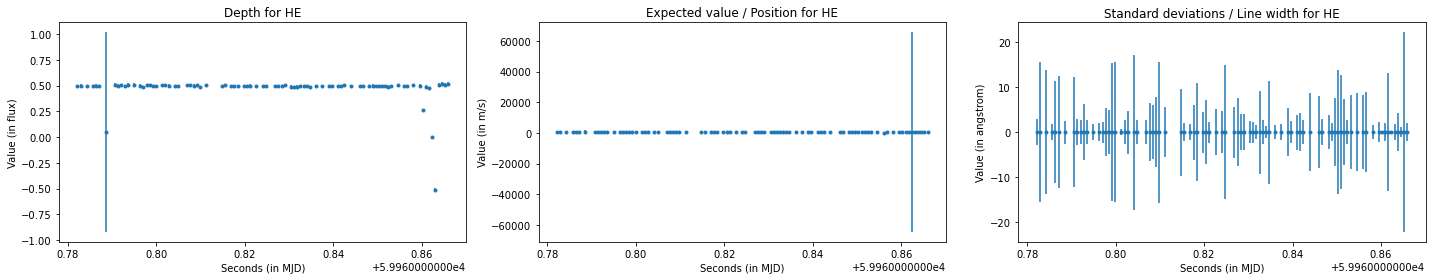

In [31]:
reload(AF)
#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[20, 4])

    ref_Si = AF.air2vac(10827.091)

    ax1.errorbar(date_HA, theta_Si_HA[:, 1], yerr=err_theta_Si_HA[:, 1], fmt='.')
    ax2.errorbar(date_HA, (theta_Si_HA[:, 2]-ref_Si)*3e8/ref_Si, yerr=err_theta_Si_HA[:, 2]*3e8/ref_Si, fmt='.')
    ax3.errorbar(date_HA, np.abs(theta_Si_HA[:, 3]), yerr=err_theta_Si_HA[:, 3], fmt='.')
    ax1.set_xlabel('Seconds (in MJD)')
    ax2.set_xlabel('Seconds (in MJD)')
    ax3.set_xlabel('Seconds (in MJD)')
    ax1.set_ylabel('Value (in flux)')
    ax2.set_ylabel('Value (in m/s)')
    ax3.set_ylabel('Value (in angstrom)')
    ax1.set_title('Depth for HA')
    ax2.set_title('Expected value / Position for HA')
    ax3.set_title('Standard deviations / Line width for HA')

    fig.tight_layout()
    plt.show()

    fig, (ax4, ax5, ax6) = plt.subplots (1, 3, figsize=[20, 4])

    ax4.errorbar(date_HE, theta_Si_HE[:, 1], yerr=err_theta_Si_HE[:, 1], fmt='.')
    ax5.errorbar(date_HE, (theta_Si_HE[:, 2]-ref_Si)*3e8/ref_Si, yerr=err_theta_Si_HE[:, 2]*3e8/ref_Si, fmt='.')
    ax6.errorbar(date_HE, np.abs(theta_Si_HE[:, 3]), yerr=err_theta_Si_HE[:, 3], fmt='.')
    ax4.set_xlabel('Seconds (in MJD)')
    ax5.set_xlabel('Seconds (in MJD)')
    ax6.set_xlabel('Seconds (in MJD)')
    ax4.set_ylabel('Value (in flux)')
    ax5.set_ylabel('Value (in m/s)')
    ax6.set_ylabel('Value (in angstrom)')
    ax4.set_title('Depth for HE')
    ax5.set_title('Expected value / Position for HE')
    ax6.set_title('Standard deviations / Line width for HE')

    fig.tight_layout()
    plt.show()
    
#If there is one mode of observation
else:
    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[20, 4])

    ref_Si = AF.air2vac(10827.091)

    ax1.errorbar(date, theta_Si[:, 1], yerr=err_theta_Si[:, 1], fmt='.')
    ax2.errorbar(date, (theta_Si[:, 2]-ref_Si)*3e8/ref_Si, yerr=err_theta_Si[:, 2]*3e8/ref_Si, fmt='.')
    ax3.errorbar(date, np.abs(theta_Si[:, 3]), yerr=err_theta_Si[:, 3], fmt='.')
    ax1.set_xlabel('Seconds (in MJD)')
    ax2.set_xlabel('Seconds (in MJD)')
    ax3.set_xlabel('Seconds (in MJD)')
    ax1.set_ylabel('Value (in flux)')
    ax2.set_ylabel('Value (in m/s)')
    ax3.set_ylabel('Value (in angstrom)')
    ax1.set_title('Depth for HA')
    ax2.set_title('Expected value / Position for HA')
    ax3.set_title('Standard deviations / Line width for HA')

    fig.tight_layout()
    plt.show()


## Periodogram for the position, depth and width of the Si line

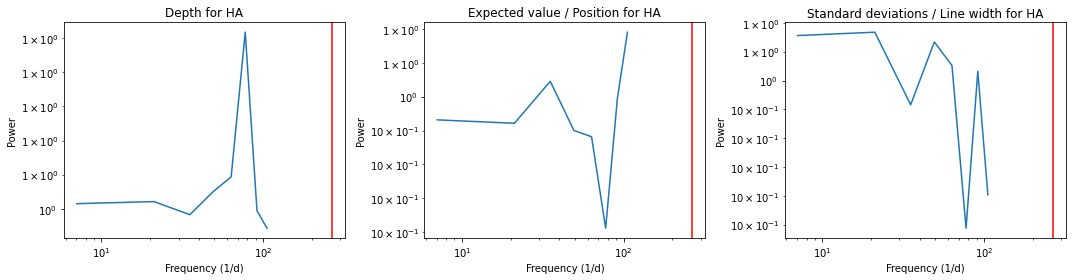

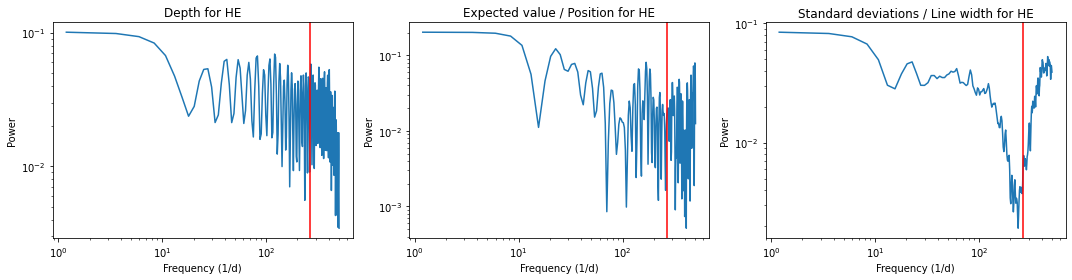

In [32]:
reload(AF)
#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[15, 4])

    LS_depth_Si_HA = LombScargle(date_HA, theta_Si_HA[:, 1]).autopower(nyquist_factor=1)
    LS_position_Si_HA = LombScargle(date_HA, theta_Si_HA[:, 2]).autopower(nyquist_factor=1)
    LS_width_Si_HA = LombScargle(date_HA, theta_Si_HA[:, 3]).autopower(nyquist_factor=1)

    ax1.loglog(LS_depth_Si_HA[0], LS_depth_Si_HA[1])
    ax2.loglog(LS_position_Si_HA[0], LS_position_Si_HA[1])
    ax3.loglog(LS_width_Si_HA[0], LS_width_Si_HA[1])
    ax1.set_xlabel('Frequency (1/d)')
    ax2.set_xlabel('Frequency (1/d)')
    ax3.set_xlabel('Frequency (1/d)')
    ax1.set_ylabel('Power')
    ax2.set_ylabel('Power')
    ax3.set_ylabel('Power')
    ax1.set_title('Depth for HA')
    ax2.set_title('Expected value / Position for HA')
    ax3.set_title('Standard deviations / Line width for HA')
    ax1.axvline(oscillation_freq, color='r')
    ax2.axvline(oscillation_freq, color='r')
    ax3.axvline(oscillation_freq, color='r')
    fig.tight_layout()
    plt.show()

    fig, (ax4, ax5, ax6) = plt.subplots (1, 3, figsize=[15, 4])

    LS_depth_Si_HE = LombScargle(date_HE, theta_Si_HE[:, 1]).autopower(nyquist_factor=1)
    LS_position_Si_HE = LombScargle(date_HE, theta_Si_HE[:, 2]).autopower(nyquist_factor=1)
    LS_width_Si_HE = LombScargle(date_HE, theta_Si_HE[:, 3]).autopower(nyquist_factor=1)

    ax4.loglog(LS_depth_Si_HE[0], LS_depth_Si_HE[1])
    ax5.loglog(LS_position_Si_HE[0], LS_position_Si_HE[1])
    ax6.loglog(LS_width_Si_HE[0], LS_width_Si_HE[1])
    ax4.set_xlabel('Frequency (1/d)')
    ax5.set_xlabel('Frequency (1/d)')
    ax6.set_xlabel('Frequency (1/d)')
    ax4.set_ylabel('Power')
    ax5.set_ylabel('Power')
    ax6.set_ylabel('Power')
    ax4.set_title('Depth for HE')
    ax5.set_title('Expected value / Position for HE')
    ax6.set_title('Standard deviations / Line width for HE')
    ax4.axvline(oscillation_freq, color='r')
    ax5.axvline(oscillation_freq, color='r')
    ax6.axvline(oscillation_freq, color='r')
    fig.tight_layout()
    plt.show()
    
#If there is one mode of observation
else:
    
    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[15, 4])

    LS_depth_Si = LombScargle(date, theta_Si[:, 1]).autopower(nyquist_factor=1)
    LS_position_Si = LombScargle(date, theta_Si[:, 2]).autopower(nyquist_factor=1)
    LS_width_Si = LombScargle(date, theta_Si[:, 3]).autopower(nyquist_factor=1)

    ax1.loglog(LS_depth_Si[0], LS_depth_Si[1])
    ax2.loglog(LS_position_Si[0], LS_position_Si[1])
    ax3.loglog(LS_width_Si[0], LS_width_Si[1])
    ax1.set_xlabel('Frequency (1/d)')
    ax2.set_xlabel('Frequency (1/d)')
    ax3.set_xlabel('Frequency (1/d)')
    ax1.set_ylabel('Power')
    ax2.set_ylabel('Power')
    ax3.set_ylabel('Power')
    ax1.set_title('Depth for HA')
    ax2.set_title('Expected value / Position for HA')
    ax3.set_title('Standard deviations / Line width for HA')
    ax1.axvline(oscillation_freq, color='r')
    ax2.axvline(oscillation_freq, color='r')
    ax3.axvline(oscillation_freq, color='r')
    fig.tight_layout()
    plt.show()


## Checking the impact of tellurics

In [33]:
tot_spctr_NC = np.zeros((len(os.listdir(dir_name)), 4084))
tot_norm_spctr_NC = np.zeros((len(os.listdir(dir_name)), 4084))
tot_err_NC = np.zeros((len(os.listdir(dir_name)), 4084))
tot_norm_err_NC = np.zeros((len(os.listdir(dir_name)), 4084))
tot_telluric = np.zeros((len(os.listdir(dir_name)), 4084))

In [34]:
reload(AF) 

order_ES = 14

#Defining the Sun's BB for later.
Sun_BB = models.BlackBody(temperature = 5778*u.K)
    
for i in range(len(os.listdir(dir_name))):
    file = pf.open(dir_name+'/'+os.listdir(dir_name)[i])
    file_lamda = file[4].data[order_ES]
    file_spctr = file[1].data[order_ES]
    file_err = file[2].data[order_ES]
    file_telluric = file[11].data[order_ES]
    file_DLL = file[6].data[order_ES]

    #Getting the telluric spectra
    tot_telluric[i] = file_telluric
         
    #Getting the wavelength and error on the flux
    tot_err_NC[i] = file_err
    
    #Distinguish two cases depending on the number of modes of observation
    #If there are two modes of observation
    if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

        #Performing Blaze correction
        for j in range(len(os.listdir(blaze_dir))):
            file_blaze = pf.open(blaze_dir+'/'+os.listdir(blaze_dir)[j])
            if file_blaze[0].header['HIERARCH ESO INS MODE'][1] == 'A':
                blaze_HA = file_blaze
            else:
                blaze_HE = file_blaze

        #Getting the Blaze spectra for each mode of observation.
        blaze_HA_spctr = blaze_HA[1].data[order_ES]
        blaze_HE_spctr = blaze_HE[1].data[order_ES]

        if file[0].header['HIERARCH ESO INS MODE'] == 'HA':
            A = file_spctr/blaze_HA_spctr
            A_err = file_err/blaze_HA_spctr
        else: 
            A = file_spctr/blaze_HE_spctr
            A_err = file_err/blaze_HE_spctr

        #Removing the trend of the spectrum's continuum using DLL and the Sun's Black Body spectrum.
        B = A/file_DLL
        B_err = A_err/file_DLL

        tot_spctr_NC[i] = B / Sun_BB(file_lamda*u.AA).value
        tot_err_NC[i] = B_err / Sun_BB(file_lamda*u.AA).value
    
        #Making the normalized spectra and error bars.
        tot_norm_spctr_NC[i] = tot_spctr_NC[i]/np.mean(tot_spctr_NC[i])
        tot_norm_err_NC[i] = tot_err_NC[i]/np.mean(tot_spctr_NC[i])
        
    #If there is one mode of observation
    else:
        #Performing the Blaze correction.
        file_blaze = pf.open(blaze_dir+'/'+os.listdir(blaze_dir)[0])
        
        blaze_spctr = file_blaze[1].data[order_ES]
        
        A = file_spctr / blaze_spctr
        A_err = file_err / blaze_spctr
        
        #Removing the trend of the spectrum's continuum using DLL and the Sun's Black Body spectrum.
        B = A/file_DLL
        B_err = A_err/file_DLL
        
        tot_spctr_NC[i] = B / Sun_BB(file_lamda*u.AA).value
        tot_err_NC[i] = B_err / Sun_BB(file_lamda*u.AA).value
        
        #Making the normalized spectra and error bars.
        tot_norm_spctr_NC[i] = tot_spctr_NC[i]/np.mean(tot_spctr_NC[i])
        tot_norm_err_NC[i] = tot_err_NC[i]/np.mean(tot_spctr_NC[i])

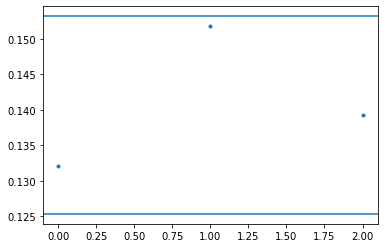

[]


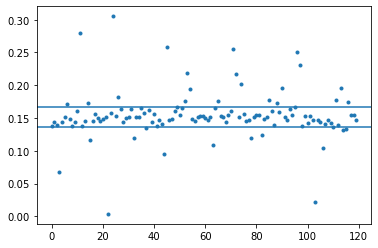

[3, 6, 11, 14, 15, 22, 24, 26, 32, 37, 44, 45, 52, 53, 54, 63, 65, 71, 72, 74, 78, 82, 85, 88, 90, 95, 96, 97, 103, 106, 110, 111, 113, 114, 115, 116]


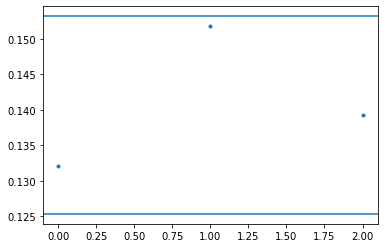

[]


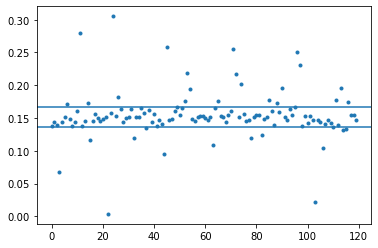

[3, 6, 11, 14, 15, 22, 24, 26, 32, 37, 44, 45, 52, 53, 54, 63, 65, 71, 72, 74, 78, 82, 85, 88, 90, 95, 96, 97, 103, 106, 110, 111, 113, 114, 115, 116]


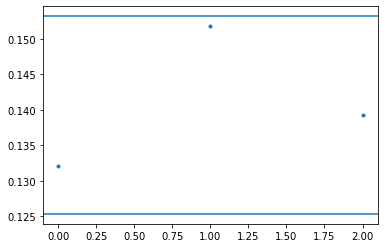

[]


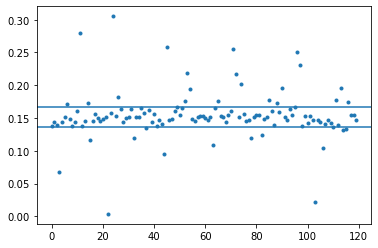

[3, 6, 11, 14, 15, 22, 24, 26, 32, 37, 44, 45, 52, 53, 54, 63, 65, 71, 72, 74, 78, 82, 85, 88, 90, 95, 96, 97, 103, 106, 110, 111, 113, 114, 115, 116]


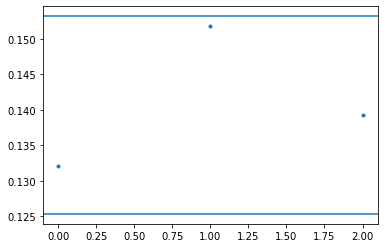

[]


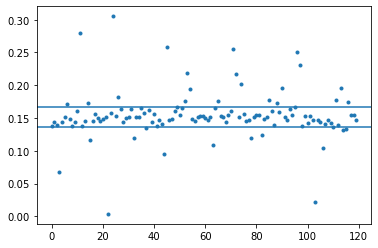

[3, 6, 11, 14, 15, 22, 24, 26, 32, 37, 44, 45, 52, 53, 54, 63, 65, 71, 72, 74, 78, 82, 85, 88, 90, 95, 96, 97, 103, 106, 110, 111, 113, 114, 115, 116]


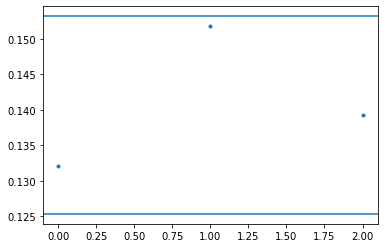

[]


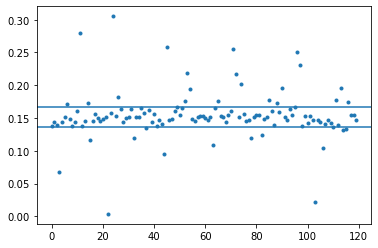

[3, 6, 11, 14, 15, 22, 24, 26, 32, 37, 44, 45, 52, 53, 54, 63, 65, 71, 72, 74, 78, 82, 85, 88, 90, 95, 96, 97, 103, 106, 110, 111, 113, 114, 115, 116]


In [35]:
reload(AF)
cut = 75
threshold = 0.1
#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    
    total_spctr_NC_HA, total_spctr_NC_HE = AF.segment_and_reduce(mode, tot_SNR, tot_spctr_NC, tot_RV, cut, threshold)

    total_norm_spctr_NC_HA, total_norm_spctr_NC_HE = AF.segment_and_reduce(mode, tot_SNR, tot_norm_spctr_NC, tot_RV, cut, threshold)

    total_err_NC_HA, total_err_NC_HE = AF.segment_and_reduce(mode, tot_SNR, tot_err_NC, tot_RV, cut, threshold)

    total_norm_err_NC_HA, total_norm_err_NC_HE = AF.segment_and_reduce(mode, tot_SNR, tot_norm_err_NC, tot_RV, cut, threshold)

    total_telluric_HA, total_telluric_HE = AF.segment_and_reduce(mode, tot_SNR, tot_telluric, tot_RV, cut, threshold)

#If there is one mode of observation
else:
    
    total_spctr_NC = AF.segment_and_reduce(mode, tot_SNR, tot_spctr_NC, tot_RV, cut, threshold)

    total_norm_spctr_NC = AF.segment_and_reduce(mode, tot_SNR, tot_norm_spctr_NC, tot_RV, cut, threshold)

    total_err_NC = AF.segment_and_reduce(mode, tot_SNR, tot_err_NC, tot_RV, cut, threshold)

    total_norm_err_NC = AF.segment_and_reduce(mode, tot_SNR, tot_norm_err_NC, tot_RV, cut, threshold)

    total_telluric = AF.segment_and_reduce(mode, tot_SNR, tot_telluric, tot_RV, cut, threshold)


## PLotting the telluric spectra and the diff between the TC and not TC spectra

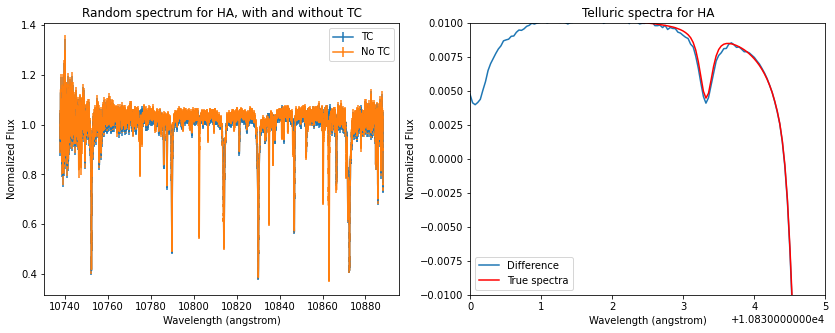

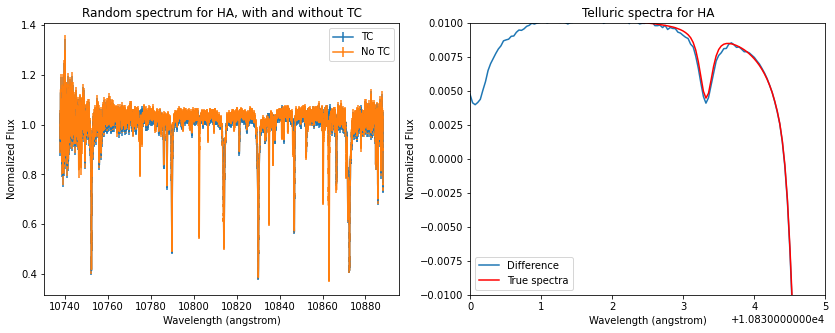

In [37]:
reload(AF)
#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
idx=2
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[14, 5])
    ax1.errorbar(total_lamda_HA[idx], total_norm_spctr_HA[idx], yerr=total_norm_err_HA[idx], label='TC')
    ax1.errorbar(total_lamda_HA[idx], total_norm_spctr_NC_HA[idx], yerr=total_norm_err_NC_HA[idx], label='No TC')
    ax1.set_xlabel('Wavelength (angstrom)')
    ax1.set_ylabel('Normalized Flux')
    ax1.set_title('Random spectrum for HA, with and without TC')
    ax1.legend()

    diff = total_norm_spctr_NC_HA[idx] - total_norm_spctr_HA[idx]
    ax2.plot(total_lamda_HA[idx], diff, label='Difference')
    ax2.plot(total_lamda_HA[idx], total_telluric_HA[idx]-np.mean(total_telluric_HA[idx]), 'r', label='True spectra')
    ax2.set_xlabel('Wavelength (angstrom)')
    ax2.set_ylabel('Normalized Flux')
    ax2.set_title('Telluric spectra for HA')
    ax2.legend()
    ax2.set_xlim([10830, 10835])
    ax2.set_ylim([-0.01, 0.01])
    plt.show()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[14, 5])
    ax1.errorbar(total_lamda_HA[idx], total_norm_spctr_HA[idx], yerr=total_norm_err_HA[idx], label='TC')
    ax1.errorbar(total_lamda_HA[idx], total_norm_spctr_NC_HA[idx], yerr=total_norm_err_NC_HA[idx], label='No TC')
    ax1.set_xlabel('Wavelength (angstrom)')
    ax1.set_ylabel('Normalized Flux')
    ax1.set_title('Random spectrum for HA, with and without TC')
    ax1.legend()

    diff = total_norm_spctr_NC_HA[idx] - total_norm_spctr_HA[idx]
    ax2.plot(total_lamda_HA[idx], diff, label='Difference')
    ax2.plot(total_lamda_HA[idx], total_telluric_HA[idx]-np.mean(total_telluric_HA[idx]), 'r', label='True spectra')
    ax2.set_xlabel('Wavelength (angstrom)')
    ax2.set_ylabel('Normalized Flux')
    ax2.set_title('Telluric spectra for HA')
    ax2.legend()
    ax2.set_xlim([10830, 10835])
    ax2.set_ylim([-0.01, 0.01])
    plt.show()

#If there is one mode of observation
else:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[14, 5])
    ax1.errorbar(total_lamda[idx], total_norm_spctr[idx], yerr=total_norm_err[idx], label='TC')
    ax1.errorbar(total_lamda[idx], total_norm_spctr_NC[idx], yerr=total_norm_err_NC[idx], label='No TC')
    ax1.set_xlabel('Wavelength (angstrom)')
    ax1.set_ylabel('Normalized Flux')
    ax1.set_title('Random spectrum with and without TC')
    ax1.legend()

    diff = total_norm_spctr_NC[idx] - total_norm_spctr[idx]
    ax2.plot(total_lamda[idx], diff, label='Difference')
    ax2.plot(total_lamda[idx], total_telluric[idx]-np.mean(total_telluric[idx]), 'r', label='True spectra')
    ax2.set_xlabel('Wavelength (angstrom)')
    ax2.set_ylabel('Normalized Flux')
    ax2.set_title('Telluric spectra')
    ax2.legend()
    ax2.set_xlim([10830, 10835])
    ax2.set_ylim([-0.01, 0.01])
    plt.show()


## Fitting the line in the telluric spectra around the He triplet

[-4.20099237e-03  1.20000000e+01  1.08333202e+04  8.43619550e-02
 -1.01554513e-03]


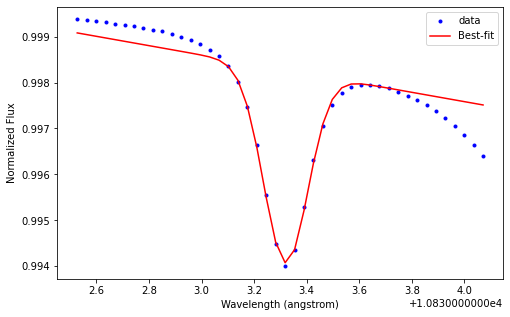

[-4.56355860e-03  1.19999999e+01  1.08333194e+04  8.45968779e-02
 -1.01556252e-03]


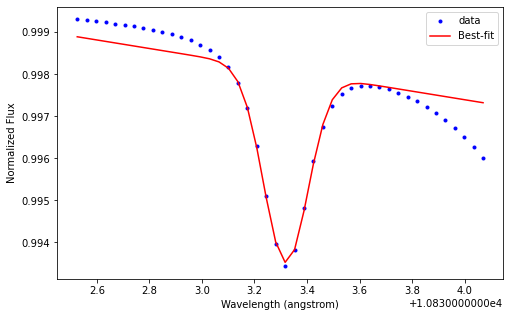

[-4.27961695e-03  1.20000000e+01  1.08333206e+04  8.47434288e-02
 -1.01555175e-03]


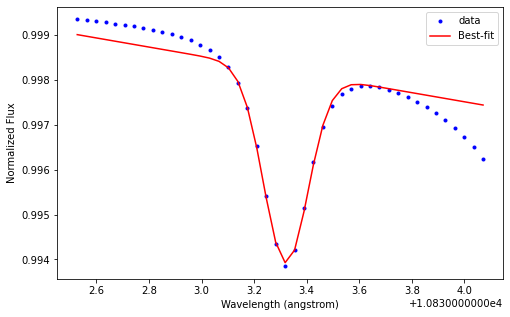

[-7.84868087e-03  1.20000000e+01  1.08333147e+04  9.11941629e-02
 -1.01572197e-03]


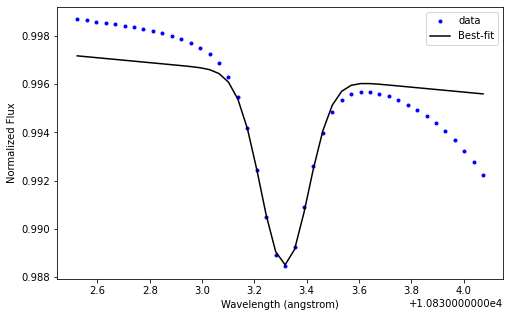

[-4.64814152e-03  1.19999999e+01  1.08333165e+04  9.01947898e-02
 -1.01558459e-03]


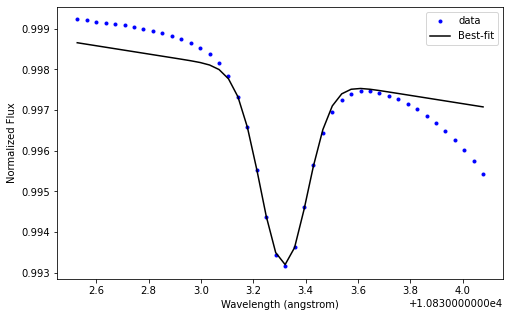

[-5.15200583e-03  1.19999986e+01  1.08333159e+04  9.04357639e-02
 -1.01560034e-03]


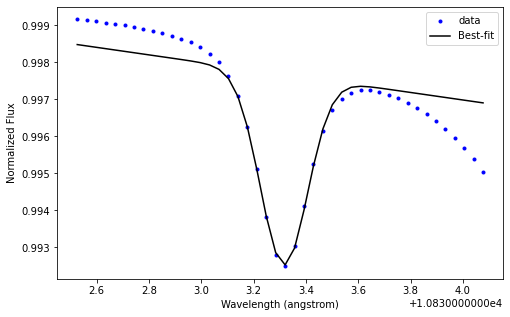

[-5.43183959e-03  1.19999977e+01  1.08333172e+04  9.06452776e-02
 -1.01561449e-03]


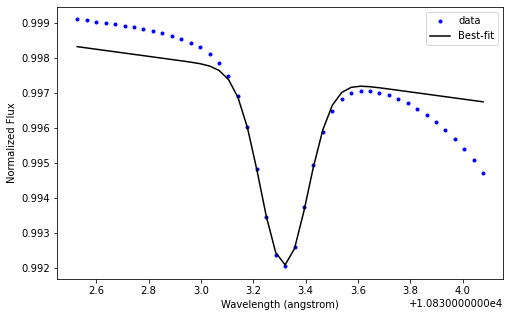

[-7.36275570e-03  1.20000000e+01  1.08333145e+04  9.10484000e-02
 -1.01569921e-03]


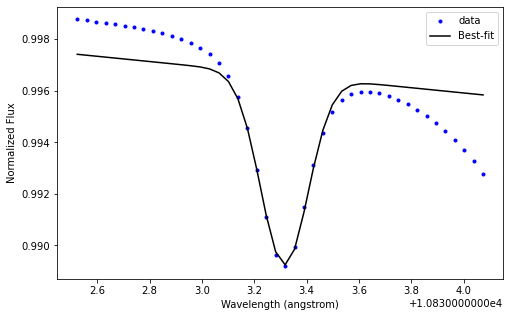

[-5.17650072e-03  1.19999985e+01  1.08333163e+04  9.05810226e-02
 -1.01560351e-03]


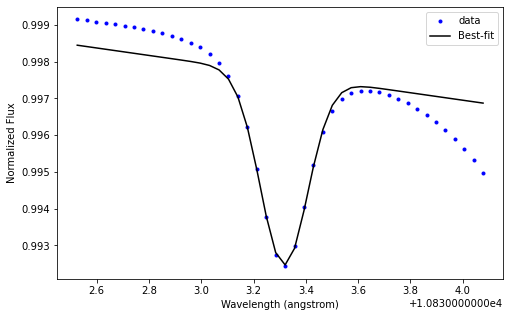

[-5.59792602e-03  1.19999973e+01  1.08333158e+04  9.09064111e-02
 -1.01562557e-03]


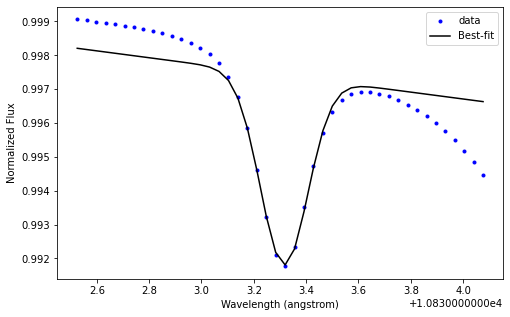

[-5.49910315e-03  1.19999978e+01  1.08333142e+04  9.02954547e-02
 -1.01561174e-03]


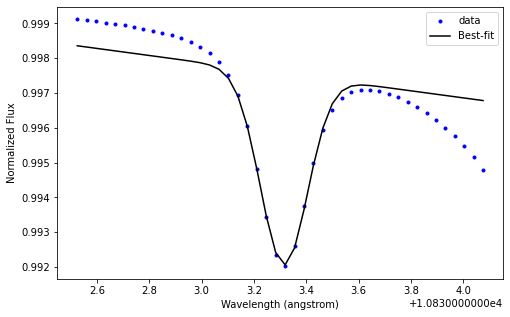

[-7.89262273e-03  1.20000000e+01  1.08333140e+04  9.09241674e-02
 -1.01571761e-03]


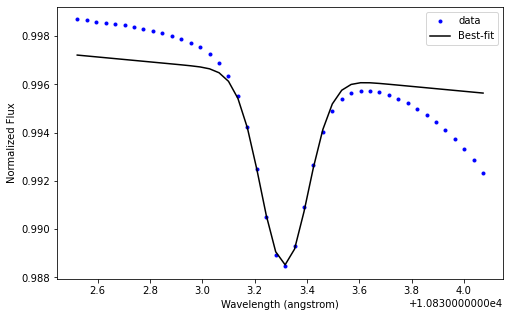

[-5.21632804e-03  1.19999983e+01  1.08333158e+04  9.03435435e-02
 -1.01560141e-03]


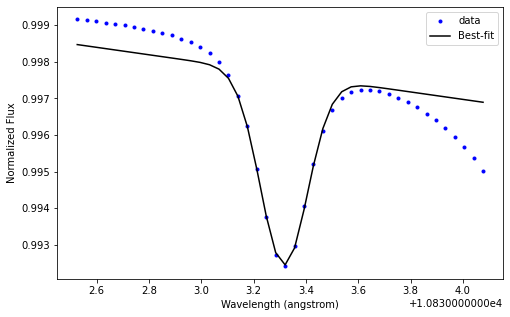

[-5.45492524e-03  1.19999977e+01  1.08333165e+04  9.06169418e-02
 -1.01561501e-03]


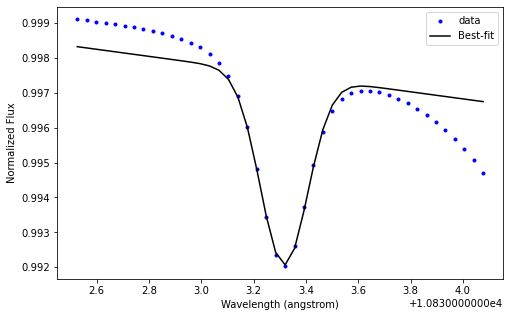

[-5.58986784e-03  1.19999974e+01  1.08333154e+04  9.07601489e-02
 -1.01562281e-03]


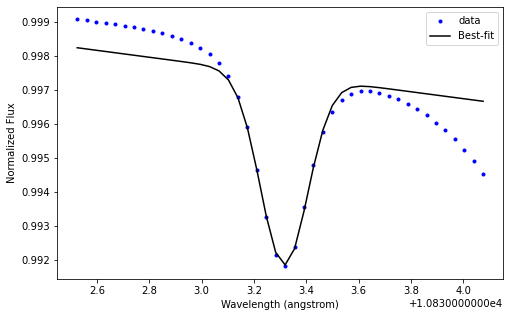

[-7.45205923e-03  1.20000000e+01  1.08333146e+04  9.11117777e-02
 -1.01570417e-03]


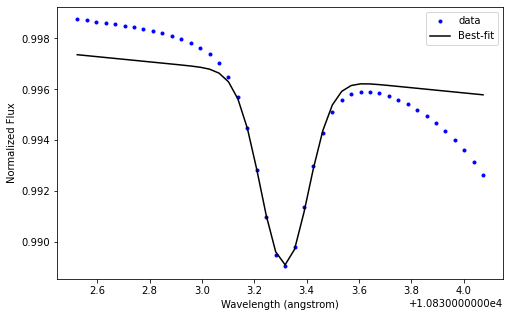

[-6.69241813e-03  1.19999946e+01  1.08333147e+04  9.09208231e-02
 -1.01566937e-03]


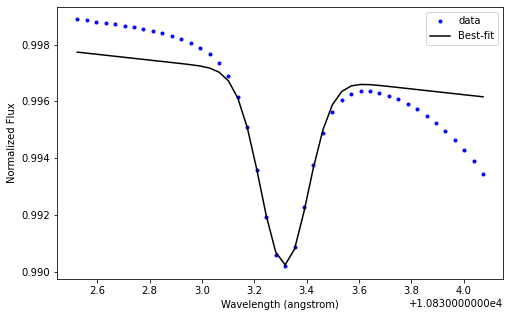

[-5.24304950e-03  1.19999982e+01  1.08333144e+04  9.03428888e-02
 -1.01560257e-03]


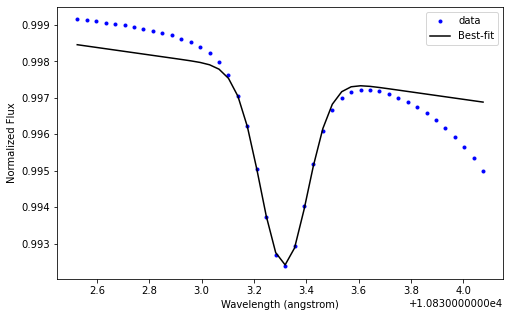

[-8.40158894e-03  1.20000000e+01  1.08333142e+04  9.12601915e-02
 -1.01574587e-03]


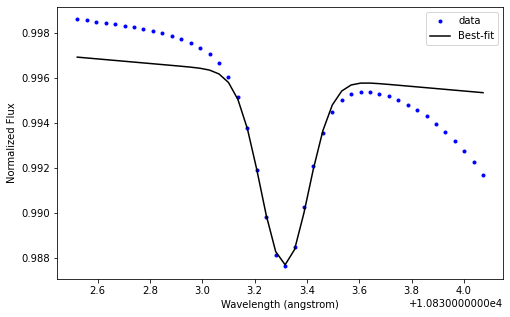

[-4.67831389e-03  1.19999985e+01  1.08333159e+04  9.12254128e-02
 -1.01559035e-03]


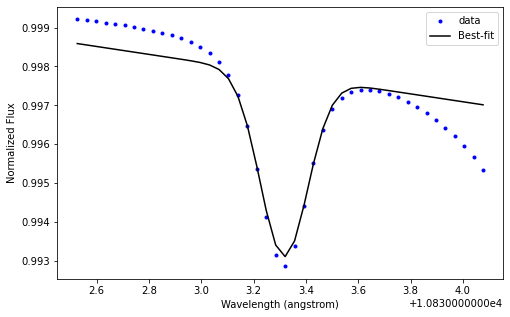

[-5.22798073e-03  1.19999983e+01  1.08333162e+04  9.05665072e-02
 -1.01560531e-03]


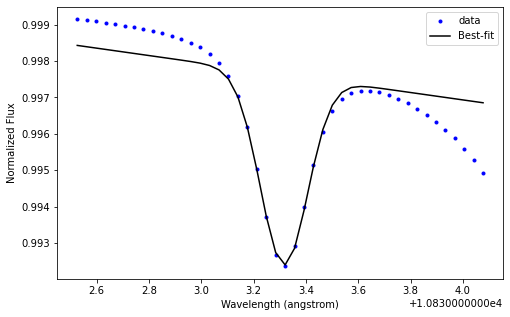

[-5.90069359e-03  1.19999983e+01  1.08333146e+04  9.06728806e-02
 -1.01563377e-03]


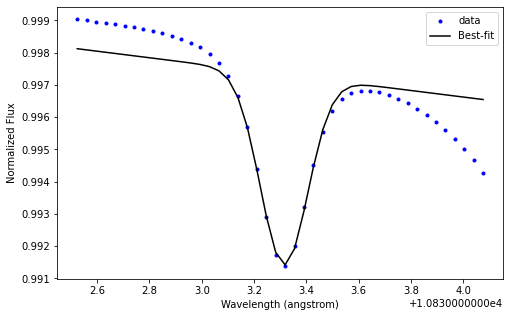

[-8.86027752e-03  1.20000000e+01  1.08333137e+04  9.06098776e-02
 -1.01574811e-03]


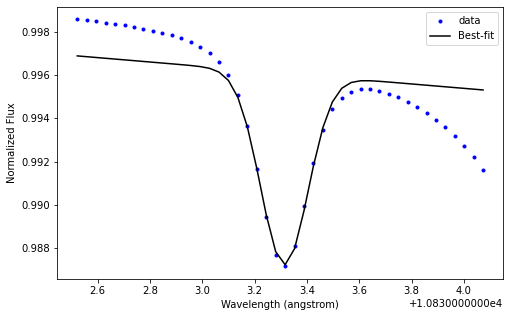

[-6.11358503e-03  1.19999996e+01  1.08333142e+04  9.05130236e-02
 -1.01563944e-03]


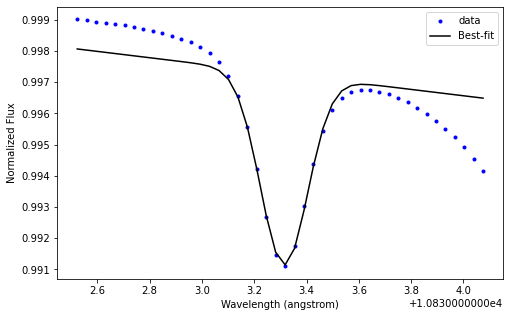

[-5.67932935e-03  1.19999971e+01  1.08333164e+04  9.11236574e-02
 -1.01563254e-03]


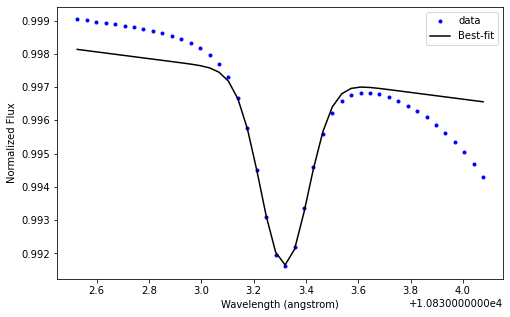

[-4.83057713e-03  1.19999991e+01  1.08333167e+04  9.03996452e-02
 -1.01558947e-03]


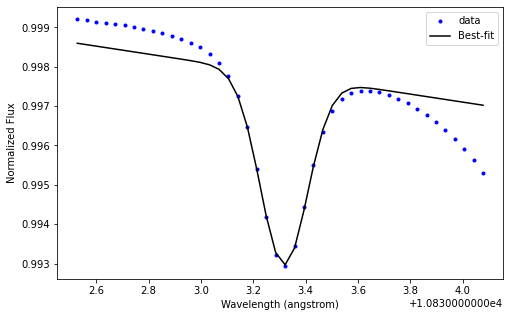

[-7.15101303e-03  1.20000000e+01  1.08333148e+04  9.10859210e-02
 -1.01569150e-03]


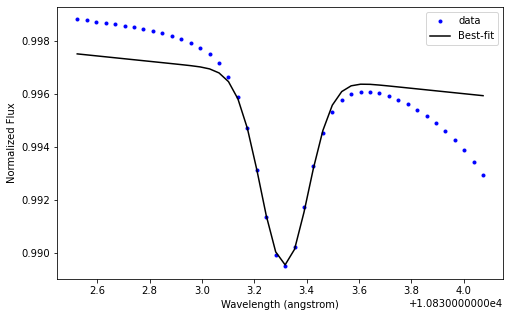

[-5.47682555e-03  1.19999976e+01  1.08333159e+04  9.06758803e-02
 -1.01561688e-03]


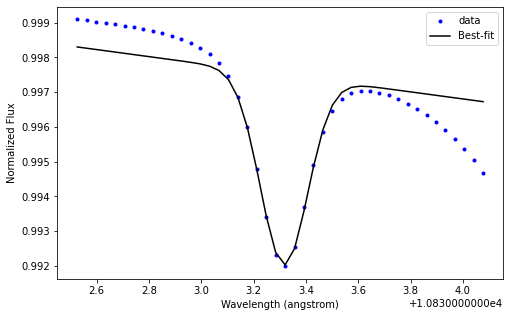

[-8.12961463e-03  1.20000000e+01  1.08333143e+04  9.13419373e-02
 -1.01573685e-03]


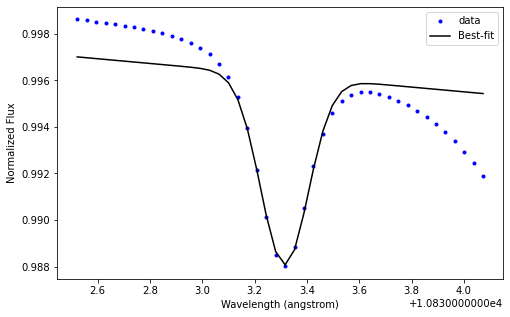

[-4.39890574e-03  1.20000000e+01  1.08333162e+04  9.02714124e-02
 -1.01557010e-03]


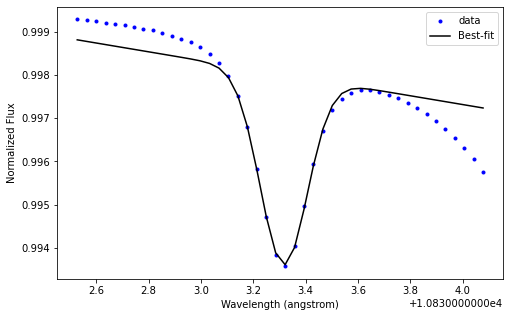

[-7.23515303e-03  1.20000000e+01  1.08333148e+04  9.11249852e-02
 -1.01569571e-03]


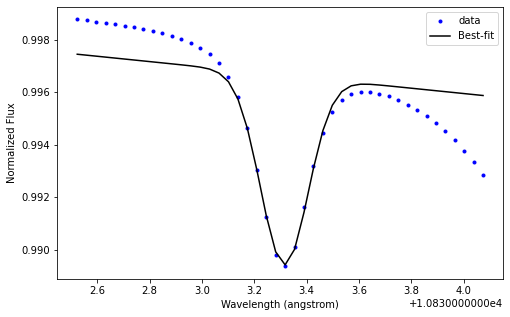

[-5.40868561e-03  1.19999979e+01  1.08333158e+04  9.03411386e-02
 -1.01560882e-03]


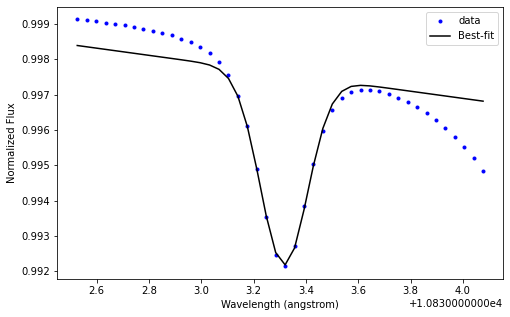

[-7.68227611e-03  1.20000000e+01  1.08333145e+04  9.15295280e-02
 -1.01572295e-03]


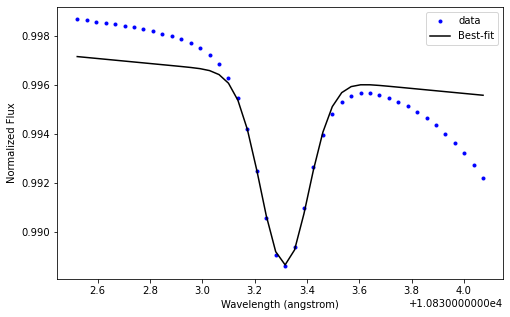

[-5.39105590e-03  1.19999977e+01  1.08333151e+04  9.06984297e-02
 -1.01561393e-03]


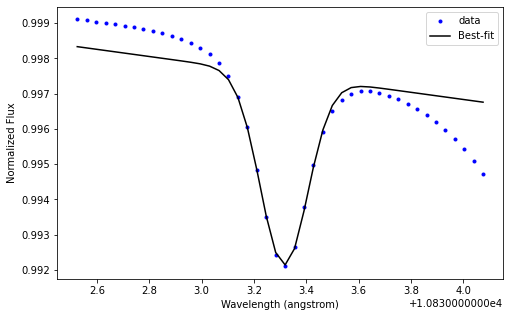

[-6.88655401e-03  1.20000000e+01  1.08333147e+04  9.09652059e-02
 -1.01567844e-03]


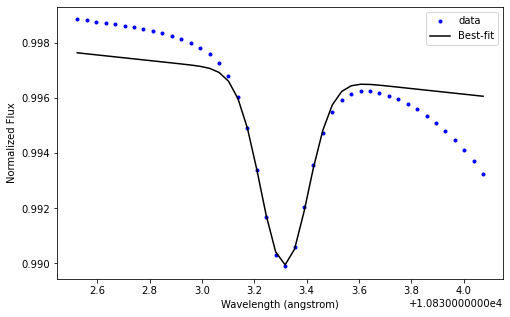

[-7.52455027e-03  1.20000000e+01  1.08333146e+04  9.09758140e-02
 -1.01570408e-03]


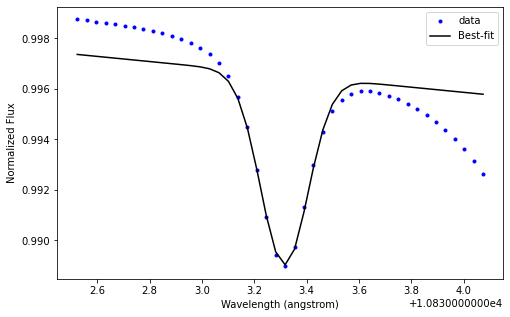

[-7.98251253e-03  1.20000000e+01  1.08333138e+04  9.06650027e-02
 -1.01571530e-03]


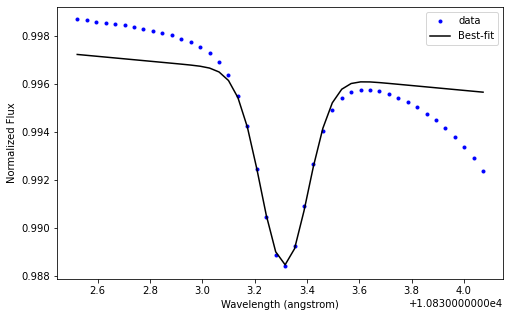

[-5.68679888e-03  1.19999976e+01  1.08333142e+04  9.05741387e-02
 -1.01562364e-03]


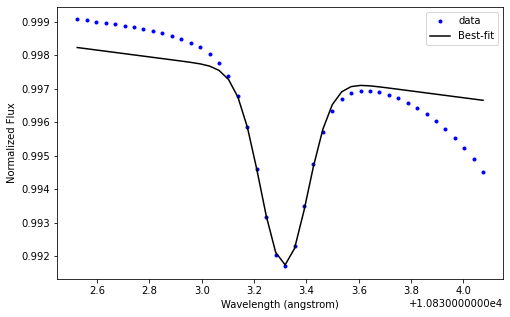

[-5.63466192e-03  1.19999976e+01  1.08333142e+04  9.05151372e-02
 -1.01562060e-03]


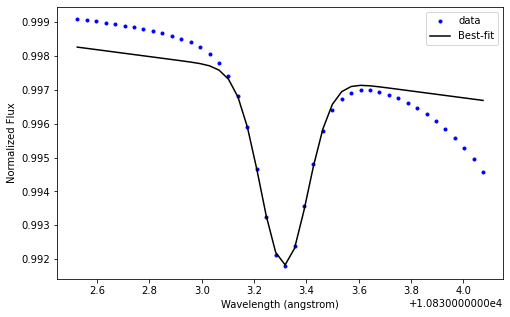

[-7.43972601e-03  1.20000000e+01  1.08333140e+04  9.09267476e-02
 -1.01569970e-03]


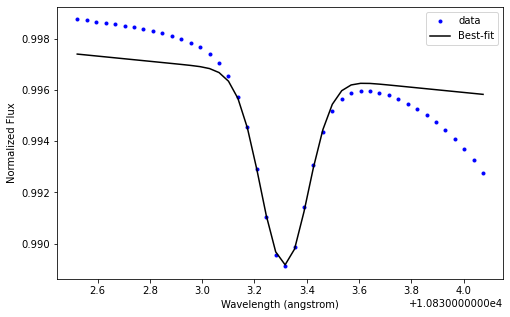

[-5.24931574e-03  1.19999982e+01  1.08333159e+04  9.05095366e-02
 -1.01560528e-03]


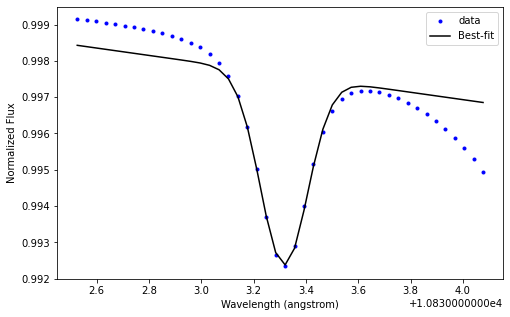

[-5.20819940e-03  1.19999983e+01  1.08333146e+04  9.05036908e-02
 -1.01560371e-03]


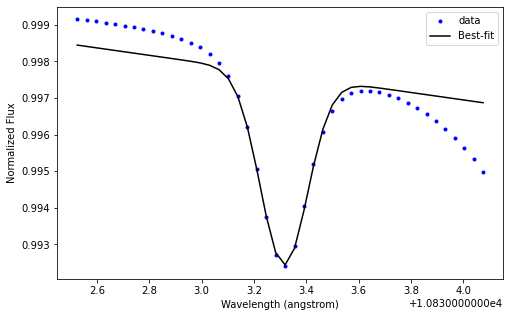

[-5.27368190e-03  1.19999981e+01  1.08333166e+04  9.05293471e-02
 -1.01560648e-03]


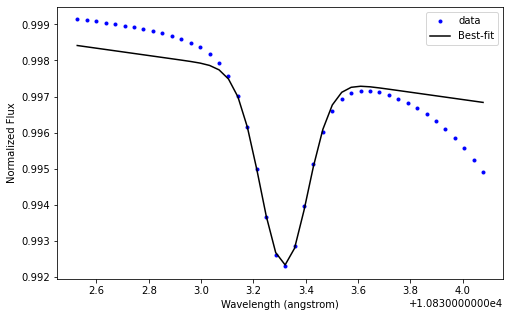

[-5.55270313e-03  1.19999976e+01  1.08333173e+04  9.06998142e-02
 -1.01562015e-03]


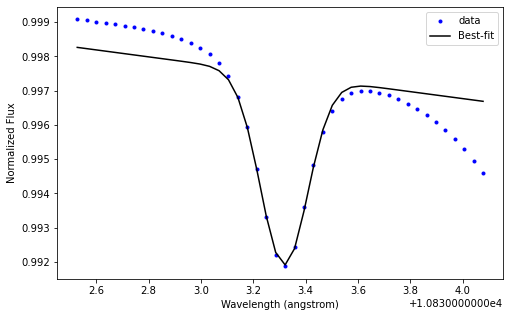

[-5.60797925e-03  1.19999975e+01  1.08333148e+04  9.06232242e-02
 -1.01562129e-03]


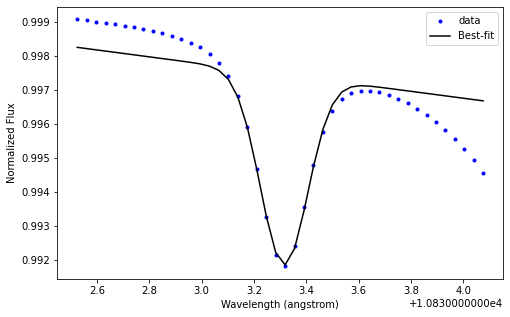

[-7.16884963e-03  1.20000000e+01  1.08333141e+04  9.09632946e-02
 -1.01568970e-03]


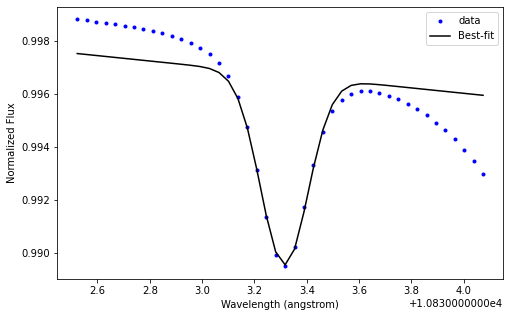

[-6.27316419e-03  1.19999996e+01  1.08333142e+04  9.04968722e-02
 -1.01564537e-03]


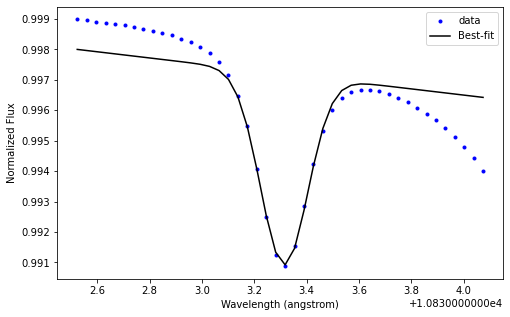

[-5.55316928e-03  1.19999976e+01  1.08333141e+04  9.04373239e-02
 -1.01561614e-03]


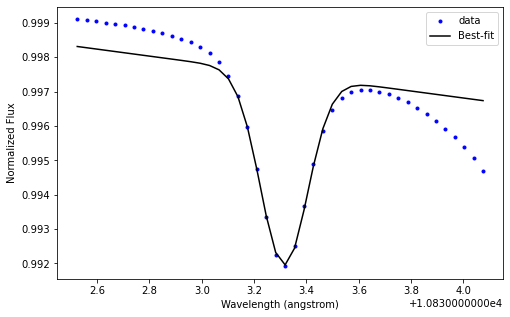

[-5.83818981e-03  1.19999983e+01  1.08333145e+04  9.05350062e-02
 -1.01562893e-03]


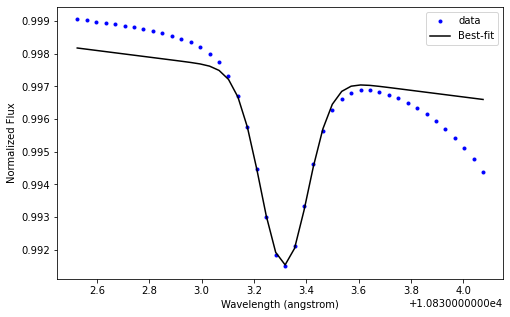

[-7.38430687e-03  1.20000000e+01  1.08333146e+04  9.10540519e-02
 -1.01570019e-03]


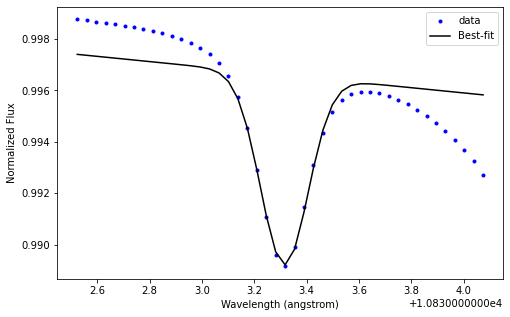

[-7.76767900e-03  1.20000000e+01  1.08333141e+04  9.09294782e-02
 -1.01571277e-03]


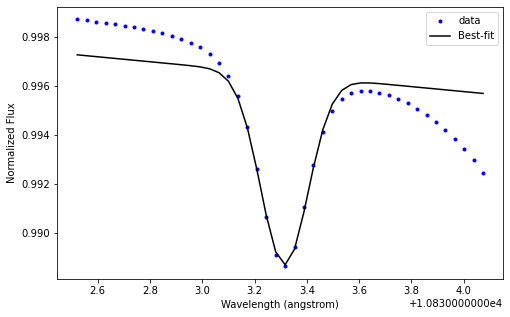

[-5.50358134e-03  1.19999976e+01  1.08333145e+04  9.04885407e-02
 -1.01561500e-03]


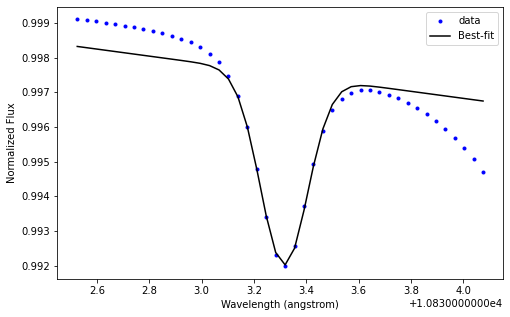

[-5.62961237e-03  1.19999974e+01  1.08333162e+04  9.08356931e-02
 -1.01562560e-03]


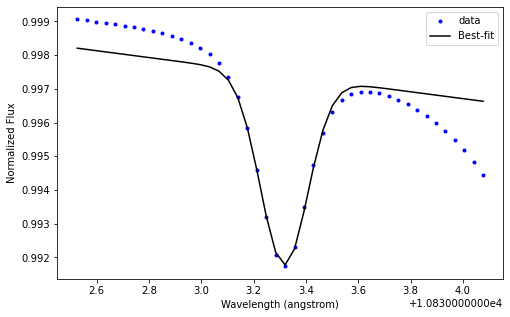

[-5.09555435e-03  1.19999988e+01  1.08333166e+04  9.06244334e-02
 -1.01560098e-03]


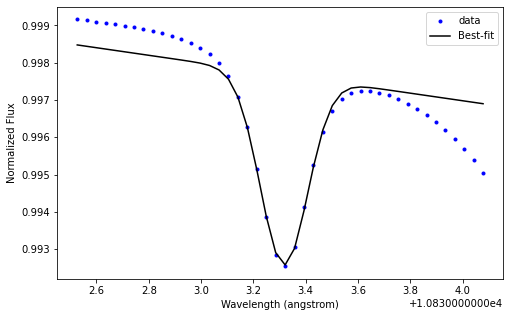

[-7.77161884e-03  1.20000000e+01  1.08333146e+04  9.11731930e-02
 -1.01571839e-03]


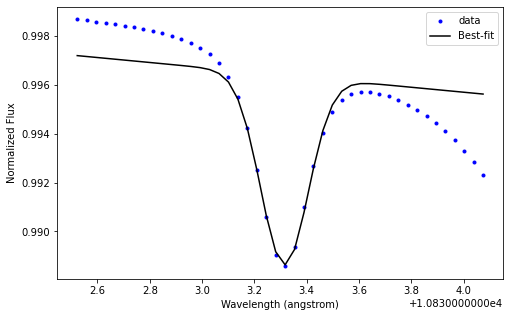

[-5.73324908e-03  1.19999979e+01  1.08333141e+04  9.04990407e-02
 -1.01562422e-03]


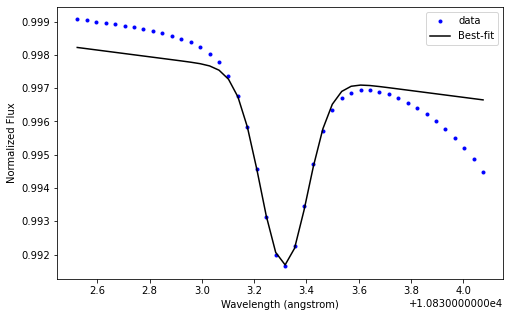

[-8.36012683e-03  1.20000000e+01  1.08333143e+04  9.12703201e-02
 -1.01574444e-03]


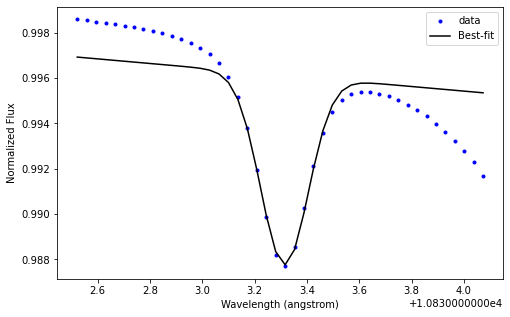

[-6.58264250e-03  1.19999971e+01  1.08333147e+04  9.09546765e-02
 -1.01566588e-03]


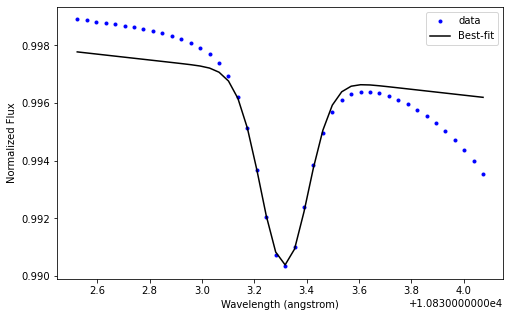

[-5.46115086e-03  1.19999978e+01  1.08333141e+04  9.03369290e-02
 -1.01561093e-03]


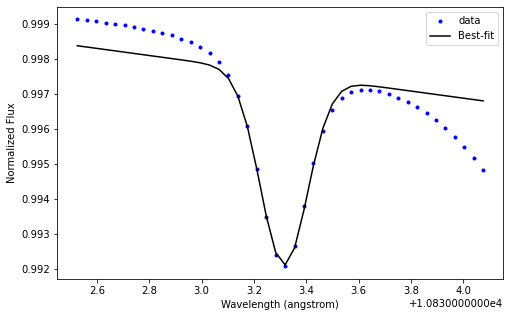

[-5.55742862e-03  1.19999977e+01  1.08333160e+04  9.05379718e-02
 -1.01561779e-03]


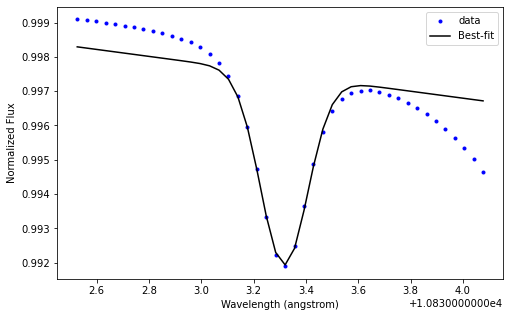

[-5.67041570e-03  1.19999973e+01  1.08333161e+04  9.09578940e-02
 -1.01562934e-03]


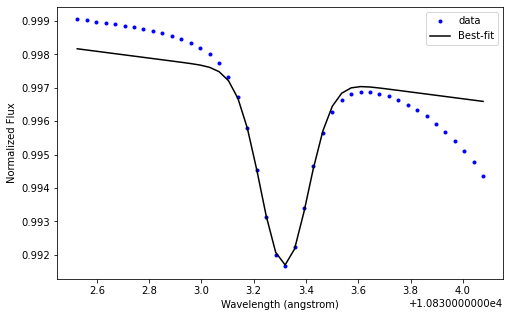

[-7.49193429e-03  1.20000000e+01  1.08333143e+04  9.11259264e-02
 -1.01570611e-03]


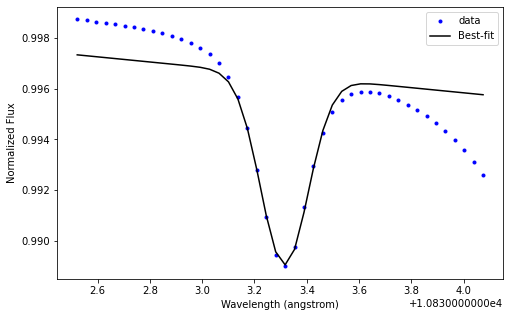

[-5.64925384e-03  1.19999977e+01  1.08333157e+04  9.06479128e-02
 -1.01562326e-03]


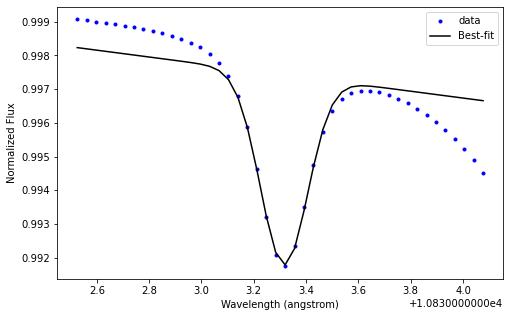

[-8.00818967e-03  1.20000000e+01  1.08333143e+04  9.12661846e-02
 -1.01573013e-03]


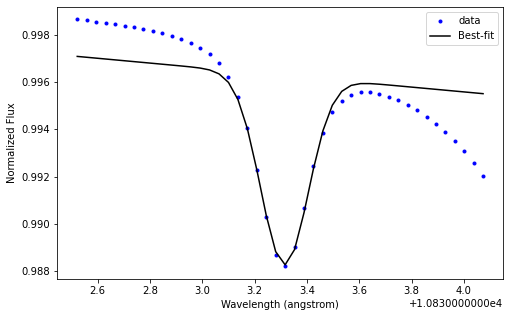

[-6.98438666e-03  1.20000000e+01  1.08333148e+04  9.10937571e-02
 -1.01568497e-03]


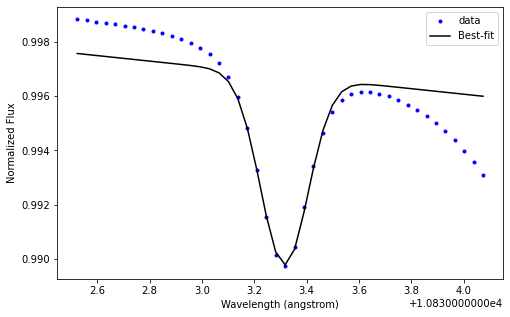

[-5.11351117e-03  1.19999987e+01  1.08333165e+04  9.06752204e-02
 -1.01560248e-03]


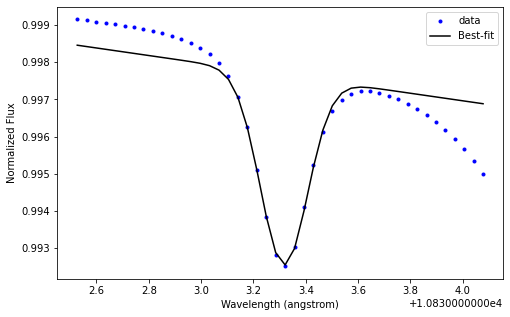

[-8.35801137e-03  1.20000000e+01  1.08333144e+04  9.14061542e-02
 -1.01574767e-03]


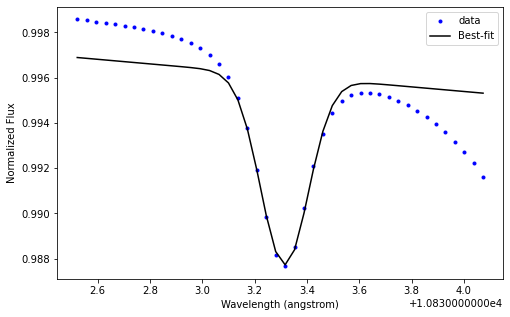

[-4.79528652e-03  1.19999984e+01  1.08333164e+04  9.02947353e-02
 -1.01558859e-03]


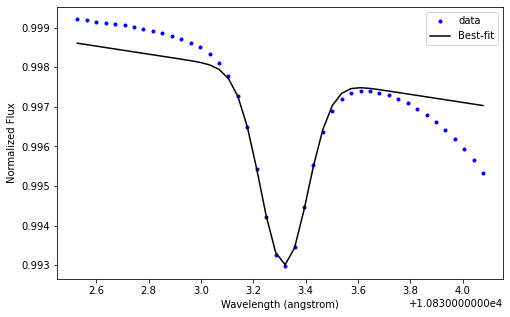

[-5.71725092e-03  1.19999977e+01  1.08333141e+04  9.05824833e-02
 -1.01562498e-03]


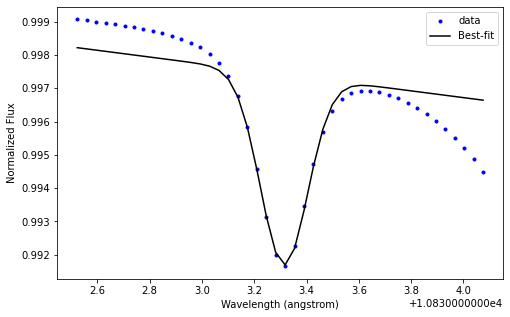

[-5.59582909e-03  1.19999977e+01  1.08333140e+04  9.04164402e-02
 -1.01561747e-03]


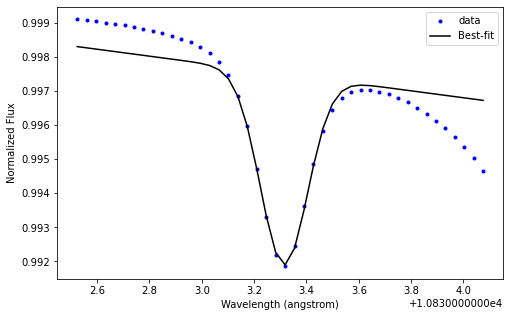

[-8.31275720e-03  1.20000000e+01  1.08333137e+04  9.06147633e-02
 -1.01572697e-03]


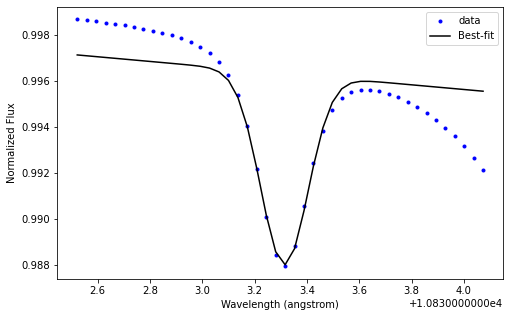

[-5.18289429e-03  1.19999984e+01  1.08333147e+04  9.05514027e-02
 -1.01560344e-03]


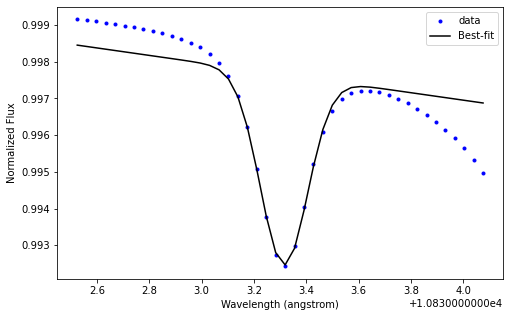

[-7.62898644e-03  1.20000000e+01  1.08333144e+04  9.10721166e-02
 -1.01571040e-03]


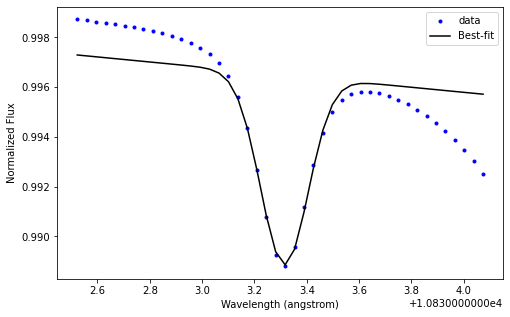

[-5.30508308e-03  1.19999980e+01  1.08333167e+04  9.07113359e-02
 -1.01561060e-03]


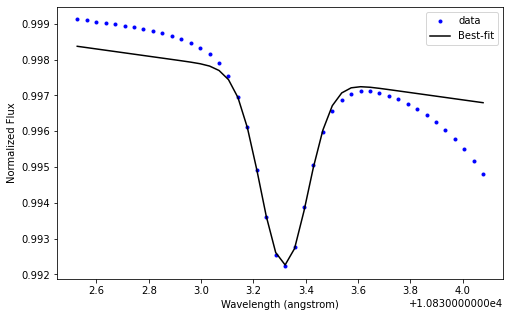

[-5.79603777e-03  1.19999978e+01  1.08333149e+04  9.07373498e-02
 -1.01563069e-03]


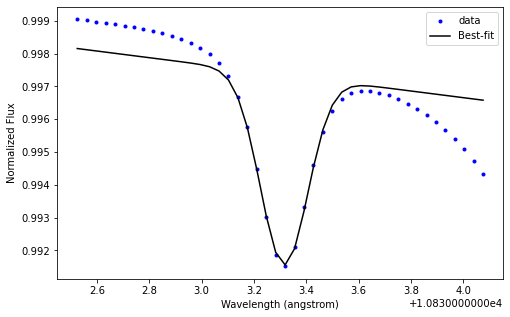

[-5.05942266e-03  1.19999988e+01  1.08333156e+04  9.03181616e-02
 -1.01559497e-03]


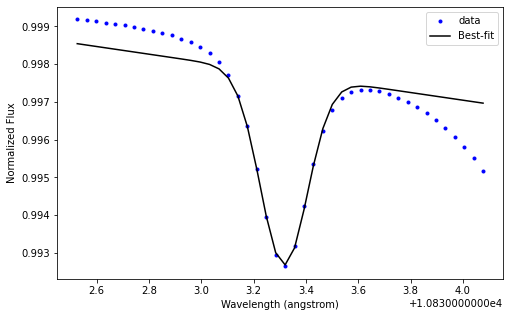

[-5.13854336e-03  1.19999986e+01  1.08333144e+04  9.03908501e-02
 -1.01559926e-03]


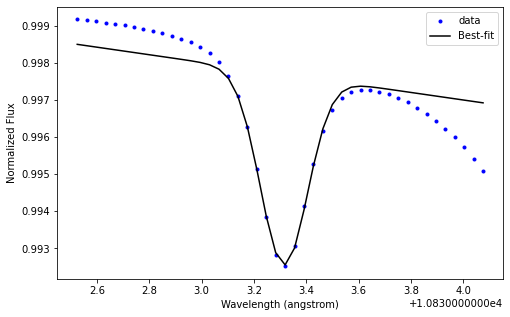

[-5.19271944e-03  1.19999984e+01  1.08333169e+04  9.07704269e-02
 -1.01560708e-03]


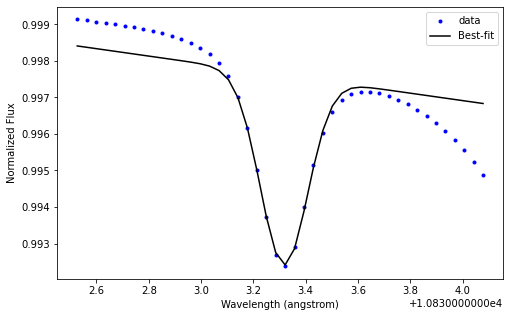

[-6.71274137e-03  1.19999948e+01  1.08333148e+04  9.10504398e-02
 -1.01567276e-03]


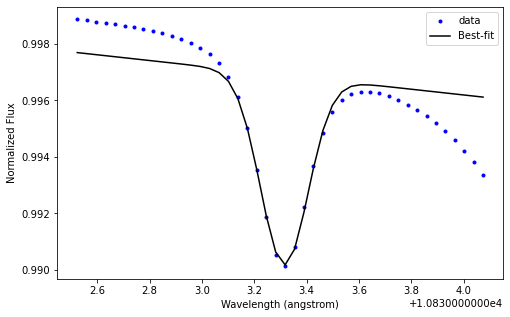

[-5.59519070e-03  1.19999974e+01  1.08333159e+04  9.07843961e-02
 -1.01562338e-03]


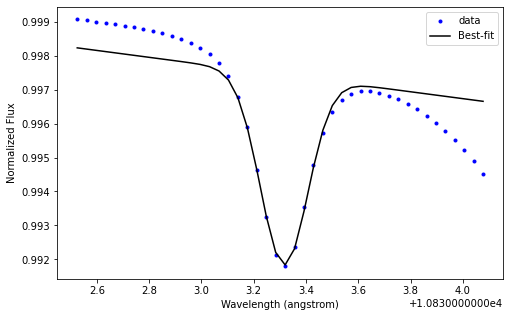

[-5.63853546e-03  1.19999971e+01  1.08333157e+04  9.10133687e-02
 -1.01562904e-03]


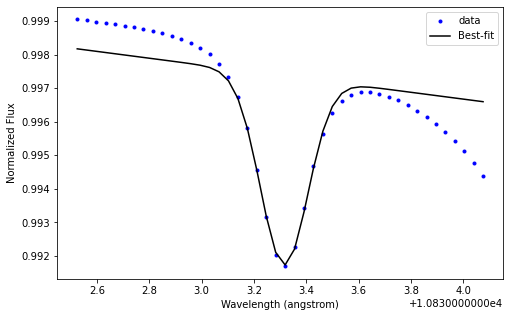

[-7.64852273e-03  1.20000000e+01  1.08333146e+04  9.11220233e-02
 -1.01571228e-03]


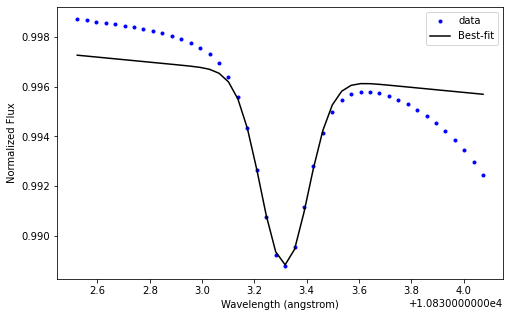

[-5.38462901e-03  1.19999978e+01  1.08333148e+04  9.04495681e-02
 -1.01560970e-03]


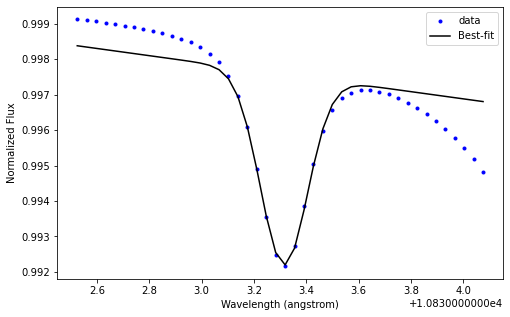

[-7.58902195e-03  1.20000000e+01  1.08333143e+04  9.09849282e-02
 -1.01570688e-03]


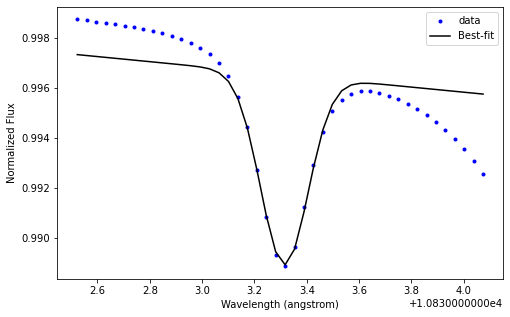

[-5.55479184e-03  1.19999974e+01  1.08333158e+04  9.07865239e-02
 -1.01562182e-03]


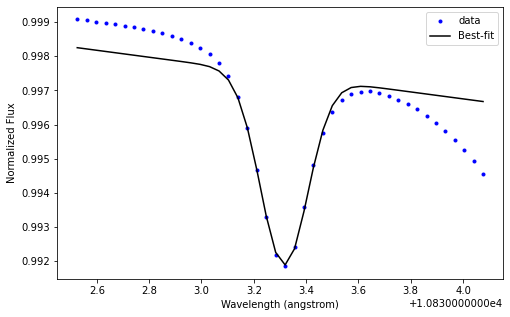

[-7.05620052e-03  1.20000000e+01  1.08333144e+04  9.09807155e-02
 -1.01568555e-03]


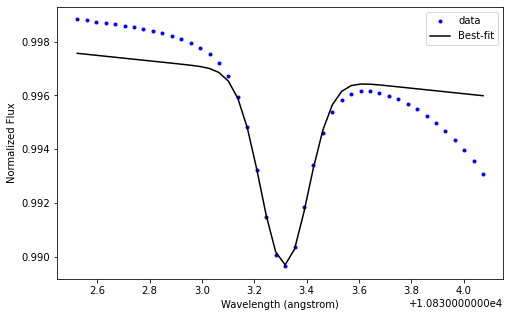

[-4.53620798e-03  1.19999999e+01  1.08333166e+04  9.03085968e-02
 -1.01557866e-03]


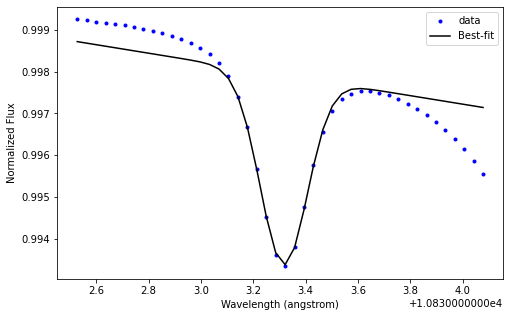

In [46]:
reload(AF)

lower_lim_T = 10832.5
upper_lim_T = 10834.1

guess_params_T = [-0.004, 10, 10833.3, 0.1, -0.005]
bounds_param_T = ((-np.inf, -np.inf, -np.inf, -np.inf, -np.inf),(1, 12, np.inf, np.inf, np.inf)) 

#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    theta_T_HA, err_theta_T_HA = AF.fit_spctr_line(AF.gaussian_L, AF.eval_gaussian_L, lower_lim_T, upper_lim_T, guess_params_T, 
                                               bounds_param_T, total_lamda_HA, total_telluric_HA,[], 'r', False)

    theta_T_HE, err_theta_T_HE = AF.fit_spctr_line(AF.gaussian_L, AF.eval_gaussian_L, lower_lim_T, upper_lim_T, guess_params_T, 
                                               bounds_param_T, total_lamda_HE, total_telluric_HE,[], 'k', False)
#If there is one mode of observation
else:
    theta_T, err_theta_T = AF.fit_spctr_line(AF.gaussian_L, AF.eval_gaussian_L, lower_lim_T, upper_lim_T, guess_params_T, 
                                               bounds_param_T, total_lamda, total_norm_spctr, [], 'r', False)


## Plotting the time series of the position, width and depth of this line

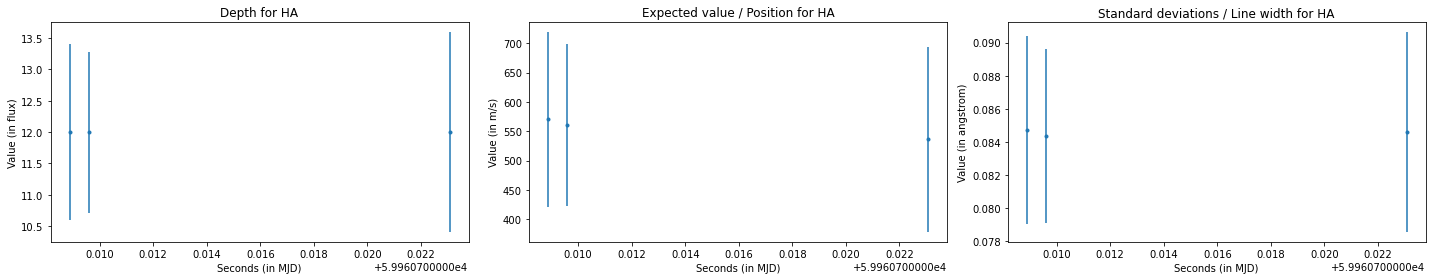

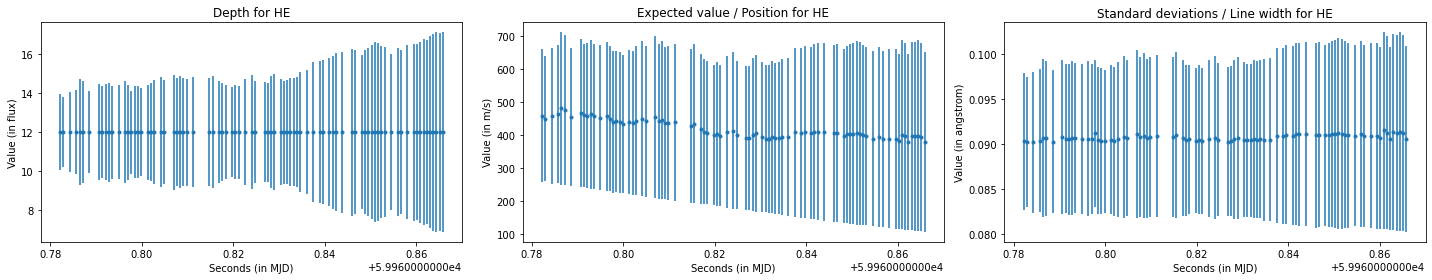

In [47]:
reload(AF)
#Distinguish two cases depending on the number of modes of observation
#If there are two modes of observation
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[20, 4])

    ax1.errorbar(date_HA, np.abs(theta_T_HA[:, 1]), yerr=err_theta_T_HA[:, 1], fmt='.')
    ax2.errorbar(date_HA, (theta_T_HA[:, 2]-ref_He)*3e8/ref_He, yerr=err_theta_T_HA[:, 2]*3e8/ref_He, fmt='.')
    ax3.errorbar(date_HA, np.abs(theta_T_HA[:, 3]), yerr=err_theta_T_HA[:, 3], fmt='.')
    ax1.set_xlabel('Seconds (in MJD)')
    ax2.set_xlabel('Seconds (in MJD)')
    ax3.set_xlabel('Seconds (in MJD)')
    ax1.set_ylabel('Value (in flux)')
    ax2.set_ylabel('Value (in m/s)')
    ax3.set_ylabel('Value (in angstrom)')
    ax1.set_title('Depth for HA')
    ax2.set_title('Expected value / Position for HA')
    ax3.set_title('Standard deviations / Line width for HA')
    fig.tight_layout()
    plt.show()

    fig, (ax4, ax5, ax6) = plt.subplots (1, 3, figsize=[20, 4])

    ax4.errorbar(date_HE, np.abs(theta_T_HE[:, 1]), yerr=err_theta_T_HE[:, 1], fmt='.')
    ax5.errorbar(date_HE, (theta_T_HE[:, 2]-ref_He)*3e8/ref_He, yerr=err_theta_T_HE[:, 2]*3e8/ref_He, fmt='.')
    ax6.errorbar(date_HE, np.abs(theta_T_HE[:, 3]), yerr=err_theta_T_HE[:, 3], fmt='.')
    ax4.set_xlabel('Seconds (in MJD)')
    ax5.set_xlabel('Seconds (in MJD)')
    ax6.set_xlabel('Seconds (in MJD)')
    ax4.set_ylabel('Value (in flux)')
    ax5.set_ylabel('Value (in m/s)')
    ax6.set_ylabel('Value (in angstrom)')
    ax4.set_title('Depth for HE')
    ax5.set_title('Expected value / Position for HE')
    ax6.set_title('Standard deviations / Line width for HE')
    fig.tight_layout()
    plt.show()

#If there is one mode of observation
else:
    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[20, 4])

    ax1.errorbar(date, np.abs(theta_T[:, 1]), yerr=err_theta_T[:, 1], fmt='.')
    ax2.errorbar(date, (theta_T[:, 2]-ref_He)*3e8/ref_He, yerr=err_theta_T[:, 2]*3e8/ref_He, fmt='.')
    ax3.errorbar(date, np.abs(theta_T[:, 3]), yerr=err_theta_T[:, 3], fmt='.')
    ax1.set_xlabel('Seconds (in MJD)')
    ax2.set_xlabel('Seconds (in MJD)')
    ax3.set_xlabel('Seconds (in MJD)')
    ax1.set_ylabel('Value (in flux)')
    ax2.set_ylabel('Value (in m/s)')
    ax3.set_ylabel('Value (in angstrom)')
    ax1.set_title('Depth for')
    ax2.set_title('Expected value / Position')
    ax3.set_title('Standard deviations / Line width')
    fig.tight_layout()
    plt.show()


## Plotting the time series of the air mass and fitting a poynomial

/var/folders/zb/dzv8y8kn1dl5qhcybvz_4nv00000gn/T/ipykernel_63479/757104696.py:5: RankWarning: Polyfit may be poorly conditioned
  AF.plot_TS_Periodo(date_HA, total_AIRM_HA, [], 'Air Mass', 'Air Mass ', ' for HA', fit=True, order=4)


          4             3         2
1.38e-09 x - 4.389e-05 x - 4.695 x - 1.538e+05 x + 1.772e+10


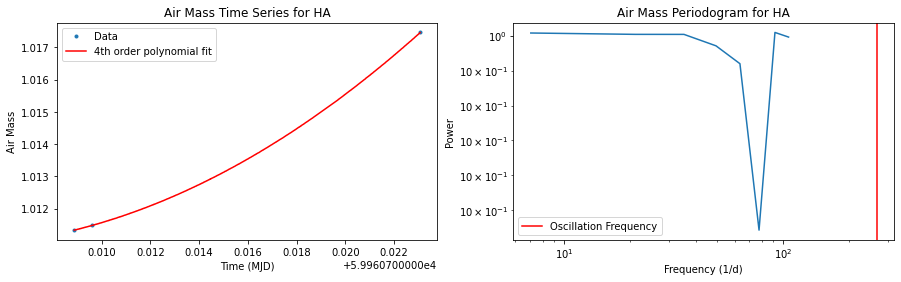

/var/folders/zb/dzv8y8kn1dl5qhcybvz_4nv00000gn/T/ipykernel_63479/757104696.py:7: RankWarning: Polyfit may be poorly conditioned
  AF.plot_TS_Periodo(date_HE, total_AIRM_HE, [], 'Air Mass', 'Air Mass ', ' for HE', fit=True, order=4)


           4             3         2
4.083e-09 x - 0.0001224 x - 14.68 x - 4.401e+05 x + 5.277e+10


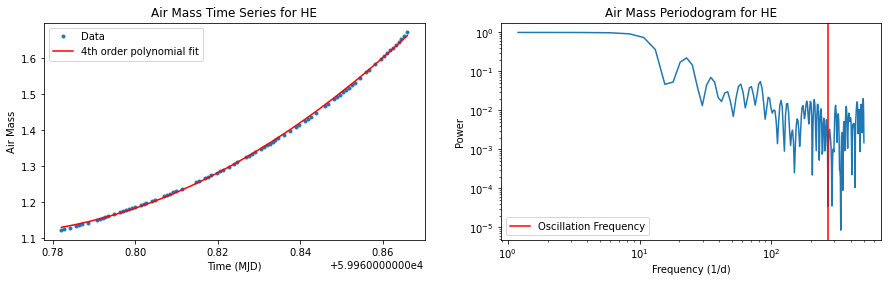

In [48]:
reload(AF)
#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    AF.plot_TS_Periodo(date_HA, total_AIRM_HA, [], 'Air Mass', 'Air Mass ', ' for HA', fit=True, order=4)
    
    AF.plot_TS_Periodo(date_HE, total_AIRM_HE, [], 'Air Mass', 'Air Mass ', ' for HE', fit=True, order=4)
#If there is one mode of observation.
else:
    AF.plot_TS_Periodo(date, total_AIRM, [], 'Air Mass', 'Air Mass ', '', fit=True, order=4)

## Detrending the air mass from the CO2 IWV

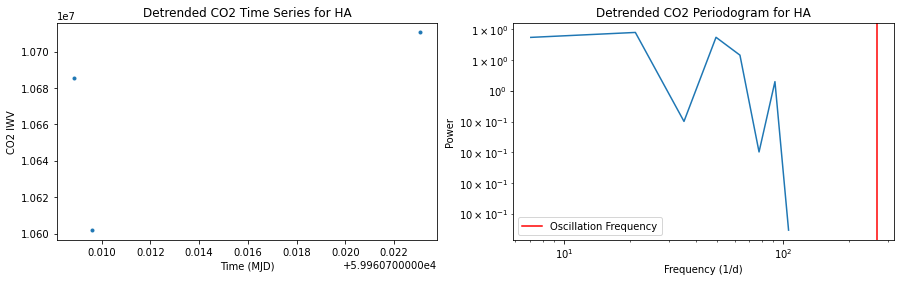

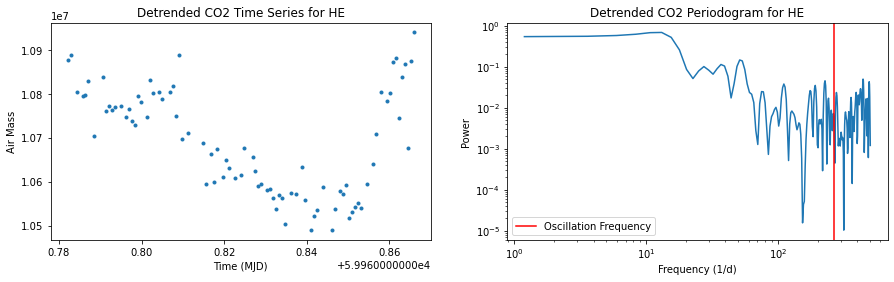

In [49]:
reload(AF)
#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    AF.plot_TS_Periodo(date_HA, total_CO2_HA/total_AIRM_HA, [], 'CO2 IWV', 'Detrended CO2 ', ' for HA')
    
    AF.plot_TS_Periodo(date_HE, total_CO2_HE/total_AIRM_HE, [], 'Air Mass', 'Detrended CO2 ', ' for HE')
#If there is one mode of observation.
else:
    AF.plot_TS_Periodo(date, total_CO2/total_AIRM, [], 'CO2 IWV', 'Detrended CO2 ', '')

## Detrending the air mass from the H2O IWV

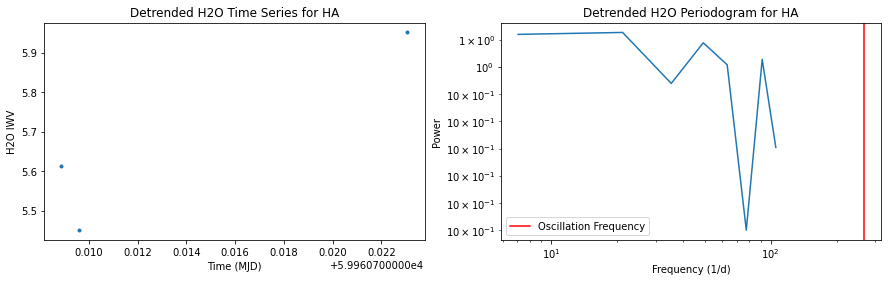

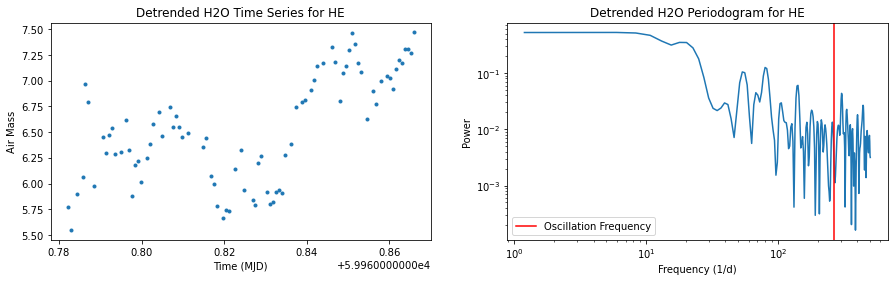

In [50]:
reload(AF)
#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):
    AF.plot_TS_Periodo(date_HA, total_H2O_HA/total_AIRM_HA, [], 'H2O IWV', 'Detrended H2O ', ' for HA')
    
    AF.plot_TS_Periodo(date_HE, total_H2O_HE/total_AIRM_HE, [], 'Air Mass', 'Detrended H2O ', ' for HE')
#If there is one mode of observation.
else:
    AF.plot_TS_Periodo(date, total_H2O/total_AIRM, [], 'H2O IWV', 'Detrended H2O ', '')

## Plotting the correlation between H2O IWV and the position, depth and width of the He triplet (not the one fit from the telluric spectra but the one fit from the spectra where TC was applied)

In [51]:
#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    depth_A = np.abs(theta_HA[:,1])[np.argsort(date_HA)]
    pos_A = theta_HA[:,2][np.argsort(date_HA)]
    width_A = theta_HA[:,3][np.argsort(date_HA)]

    H2O_IWVA = total_H2O_HA/total_AIRM_HA
    H2O_IWVA = H2O_IWVA[np.argsort(date_HA)]

    depth_E = np.abs(theta_HE[:,1])[np.argsort(date_HE)]
    pos_E = theta_HE[:,2][np.argsort(date_HE)]
    width_E = theta_HE[:,3][np.argsort(date_HE)]

    H2O_IWVE = total_H2O_HE/total_AIRM_HE
    H2O_IWVE = H2O_IWVE[np.argsort(date_HE)]

#If there is one mode of observation.
else:
    depth = np.abs(theta[:,1])[np.argsort(date)]
    pos = theta[:,2][np.argsort(date)]
    width = theta[:,3][np.argsort(date)]

    H2O_IWV = total_H2O/total_AIRM
    H2O_IWV = H2O_IWV[np.argsort(date)]


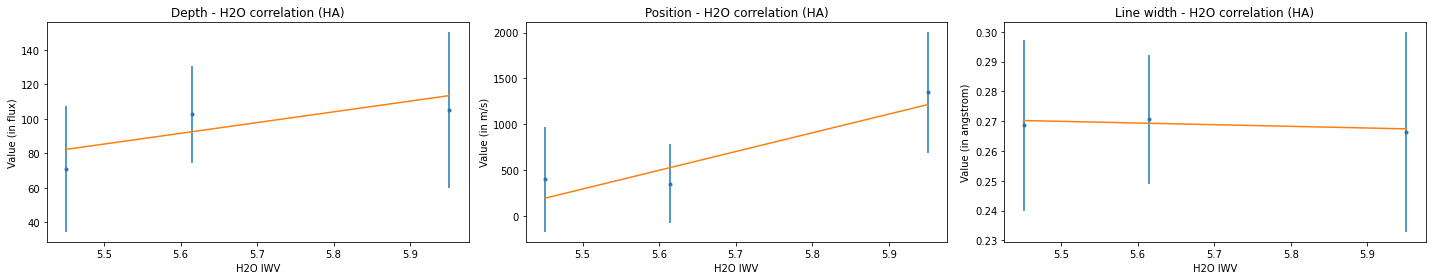

Depth polynomial:  
62.31 x - 257.3 
 Position polynomial:  
2037 x - 1.091e+04 
 Width polynomial:  
-0.005584 x + 0.3007
Depth correlation: 0.7912869378063213
Position correlation: 0.9324034787141308
Width correlation -0.6738155764544358


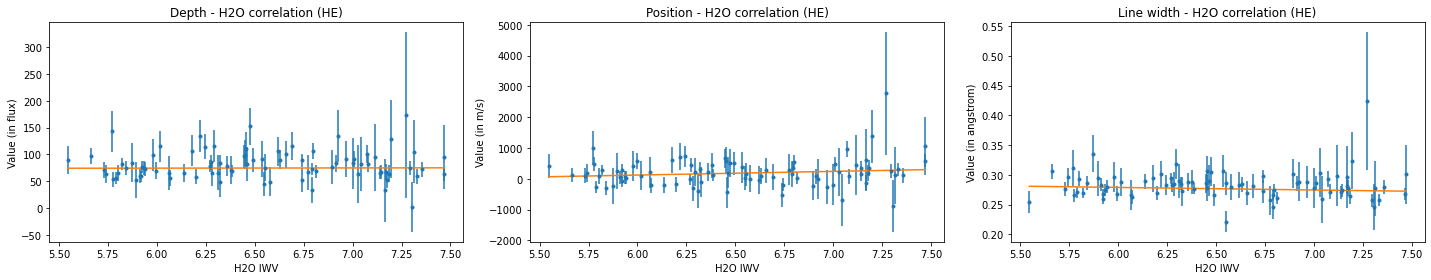

Depth polynomial:  
0.405 x + 71.99 
 Position polynomial:  
119.7 x - 598.9 
 Width polynomial:  
-0.004296 x + 0.3046
Depth correlation: 0.005250828980174822
Position correlation: 0.14482827609943713
Width correlation 0.007203157437342691


In [52]:
reload(AF)
#Distinguish two cases depending on the number of modes of observation.
#If there are two modes of observation.
if np.sum(mode=='A') != len(mode) and np.sum(mode=='E')!= len(mode):

    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[20, 4])

    x_H2OA = np.linspace(min(H2O_IWVA), max(H2O_IWVA), 1000)

    m_depthA = np.poly1d(np.polyfit(H2O_IWVA, depth_A, 1, w = 1/err_theta_HA[:,1][np.argsort(date_HA)]))
    m_posA = np.poly1d(np.polyfit(H2O_IWVA, (pos_A-ref_He)*3e8/ref_He, 1, w = 1/(err_theta_HA[:,2][np.argsort(date_HA)]*3e8/ref_He)))
    m_widthA = np.poly1d(np.polyfit(H2O_IWVA, width_A, 1, w = 1/err_theta_HA[:,3][np.argsort(date_HA)]))

    ax1.errorbar(H2O_IWVA, depth_A, yerr = err_theta_HA[:,1][np.argsort(date_HA)], fmt='.')
    ax1.plot(x_H2OA, m_depthA(x_H2OA))
    ax2.errorbar(H2O_IWVA, (pos_A-ref_He)*3e8/ref_He, yerr = err_theta_HA[:,2][np.argsort(date_HA)]*3e8/ref_He, fmt='.')
    ax2.plot(x_H2OA, m_posA(x_H2OA))
    ax3.errorbar(H2O_IWVA, width_A, yerr = err_theta_HA[:,3][np.argsort(date_HA)], fmt='.')
    ax3.plot(x_H2OA, m_widthA(x_H2OA))
    ax1.set_xlabel('H2O IWV')
    ax2.set_xlabel('H2O IWV')
    ax3.set_xlabel('H2O IWV')
    ax2.set_ylabel('Value (in m/s)')
    ax3.set_ylabel('Value (in angstrom)')
    ax1.set_ylabel('Value (in flux)')
    ax1.set_title('Depth - H2O correlation (HA)')
    ax2.set_title('Position - H2O correlation (HA)')
    ax3.set_title('Line width - H2O correlation (HA)')
    
    fig.tight_layout()
    plt.show()

    print('Depth polynomial:',m_depthA,'\n','Position polynomial:',m_posA,'\n','Width polynomial:',m_widthA)
    print('Depth correlation:', np.corrcoef(H2O_IWVA, depth_A)[0][1])
    print('Position correlation:', np.corrcoef(H2O_IWVA, (pos_A-ref_He)*3e8/ref_He)[0][1])
    print('Width correlation', np.corrcoef(H2O_IWVA, width_A)[0][1])

    
    fig, (ax4, ax5, ax6) = plt.subplots (1, 3, figsize=[20, 4])

    x_H2OE = np.linspace(min(H2O_IWVE), max(H2O_IWVE), 1000)

    m_depthE = np.poly1d(np.polyfit(H2O_IWVE, depth_E, 1, w = 1/err_theta_HE[:,1][np.argsort(date_HE)]))
    m_posE = np.poly1d(np.polyfit(H2O_IWVE, (pos_E-ref_He)*3e8/ref_He, 1, w = 1/(err_theta_HE[:,2][np.argsort(date_HE)]*3e8/ref_He)))
    m_widthE = np.poly1d(np.polyfit(H2O_IWVE, width_E, 1, w = 1/err_theta_HE[:,3][np.argsort(date_HE)]))

    ax4.errorbar(H2O_IWVE, depth_E, yerr=err_theta_HE[:, 1][np.argsort(date_HE)], fmt='.')
    ax4.plot(x_H2OE, m_depthE(x_H2OE))
    ax5.errorbar(H2O_IWVE, (pos_E-ref_He)*3e8/ref_He, yerr=err_theta_HE[:, 2][np.argsort(date_HE)]*3e8/ref_He, fmt='.')
    ax5.plot(x_H2OE, m_posE(x_H2OE))
    ax6.errorbar(H2O_IWVE, width_E, yerr=err_theta_HE[:, 3][np.argsort(date_HE)], fmt='.')
    ax6.plot(x_H2OE, m_widthE(x_H2OE))
    ax4.set_xlabel('H2O IWV')
    ax5.set_xlabel('H2O IWV')
    ax6.set_xlabel('H2O IWV')
    ax5.set_ylabel('Value (in m/s)')
    ax6.set_ylabel('Value (in angstrom)')
    ax4.set_ylabel('Value (in flux)')
    ax4.set_title('Depth - H2O correlation (HE)')
    ax5.set_title('Position - H2O correlation (HE)')
    ax6.set_title('Line width - H2O correlation (HE)')

    fig.tight_layout()
    plt.show()

    print('Depth polynomial:',m_depthE,'\n','Position polynomial:',m_posE,'\n','Width polynomial:',m_widthE)
    print('Depth correlation:', np.corrcoef(H2O_IWVE, depth_E)[0][1])
    print('Position correlation:', np.corrcoef(H2O_IWVE, (pos_E-ref_He)*3e8/ref_He)[0][1])
    print('Width correlation', np.corrcoef(H2O_IWVE, width_E)[0][1])

#If there is one mode of observation
else:

    fig, (ax1, ax2, ax3) = plt.subplots (1, 3, figsize=[20, 4])

    x_H2O = np.linspace(min(H2O_IWV), max(H2O_IWV), 1000)

    m_depth = np.poly1d(np.polyfit(H2O_IWV, depth, 1, w = 1/err_theta[:,1][np.argsort(date)]))
    m_pos = np.poly1d(np.polyfit(H2O_IWV, (pos-ref_He)*3e8/ref_He, 1, w = 1/(err_theta[:,2][np.argsort(date)]*3e8/ref_He)))
    m_width = np.poly1d(np.polyfit(H2O_IWV, width, 1, w = 1/err_theta[:,3][np.argsort(date)]))

    ax1.errorbar(H2O_IWV, depth, yerr = err_theta[:,1][np.argsort(date)], fmt='.')
    ax1.plot(x_H2O, m_depth(x_H2O))
    ax2.errorbar(H2O_IWV, (pos-ref_He)*3e8/ref_He, yerr = err_theta[:,2][np.argsort(date)]*3e8/ref_He, fmt='.')
    ax2.plot(x_H2O, m_pos(x_H2O))
    ax3.errorbar(H2O_IWV, width, yerr = err_theta[:,3][np.argsort(date)], fmt='.')
    ax3.plot(x_H2O, m_width(x_H2O))
    ax1.set_xlabel('H2O IWV')
    ax2.set_xlabel('H2O IWV')
    ax3.set_xlabel('H2O IWV')
    ax2.set_ylabel('Value (in m/s)')
    ax3.set_ylabel('Value (in angstrom)')
    ax1.set_ylabel('Value (in flux)')
    ax1.set_title('Depth - H2O correlation')
    ax2.set_title('Position - H2O correlation')
    ax3.set_title('Line width - H2O correlation')
    
    fig.tight_layout()
    plt.show()
   
    print('Depth polynomial:',m_depth,'\n','Position polynomial:',m_pos,'\n','Width polynomial:',m_width)
    print('Position correlation:', np.corrcoef(H2O_IWV, (pos-ref_He)*3e8/ref_He)[0][1])
    print('Depth correlation:', np.corrcoef(H2O_IWV, depth)[0][1])
    print('Width correlation', np.corrcoef(H2O_IWV, width)[0][1])
    
